### Construct a trajectory network given a mapping and edgelist

In [2]:
import json
with open('../data/master_map_2.json','r') as f:
    master_map = json.load(f)

In [3]:
import pandas as pd
tdf_all = pd.read_csv('../data/edgelists/tdf_all_specialties_cleaned.csv')
tdf_all = tdf_all.dropna()
tdf_all['time_elapsed'] = tdf_all['timestamp'] - tdf_all['timestamp'].min()
tdf_all = tdf_all[tdf_all['specialty'] != 'endocrinology']
tdf_all

node_u  \
0                           National Capital Consortium   
1                           National Capital Consortium   
2                                 Albany Medical Center   
3                                   University of Texas   
4                                   University of Texas   
...                                                 ...   
560430  McGaw Medical Center of Northwestern University   
560431                                  Rush University   
560432                       Westchester Medical Center   
560433                       Westchester Medical Center   
560434                          Stanley Medical College   

                                                 node_v  timestamp  doctor_id  \
0                           National Capital Consortium     1972.0     3721.0   
1                           National Capital Consortium     1968.0     3721.0   
2                           National Capital Consortium     1967.0     3721.0   
3                              University of Washington     2003.0     2833.0   
4                                   University of Texas     1999.0     2833.0   
...                                                 ...        ...        ...   
560430  McGaw Medical Center of Northwestern University     2000.0      182.0   
560431  McGaw Medical Center of Northwestern University     1997.0      182.0   
560432                              Stanford University     2018.0      478.0   
560433                       Westchester Medical Center     2015.0      478.0   
560434                       Westchester Medical Center     2011.0      478.0   

                   transition     specialty    weight  time_elapsed  
0         residency-residency  neurosurgery  0.000061          43.0  
1        internship-residency  neurosurgery  0.000061          39.0  
2               md-internship  neurosurgery  0.000061          38.0  
3         residency-residency  neurosurgery  0.000061          74.0  
4        internship-residency  neurosurgery  0.000061          70.0  
...                       ...           ...       ...           ...  
560430   residency-fellowship    hematology  0.000203          71.0  
560431           md-residency    hematology  0.000203          68.0  
560432  fellowship-fellowship    hematology  0.000203          89.0  
560433   residency-fellowship    hematology  0.000203          86.0  
560434           md-residency    hematology  0.000203          82.0  

[560368 rows x 8 columns]

Add any institutions that aren't in the map

In [ ]:
unique_institutions = pd.concat([tdf_all['node_v'], tdf_all['node_u']]).unique()
len(unique_institutions)

unique_inst_stripped = []  
for s in unique_institutions:
    unique_inst_stripped.append(s.strip().lower().replace("'", "").replace("  ", " ").replace("   ", " ").replace(".", "").replace(",", "").replace("(", "").replace(")", "").replace("-", " ").replace(":", "").replace("/", " ").replace("’", "").replace("—", " ").replace("–", " "))
unique_inst_stripped = list(set(unique_inst_stripped))
len(unique_inst_stripped)

b_institutions = []
for i in unique_inst_stripped:
    b_institutions.append(i.replace('  ', ' ').replace('  ', ' '))

b_institutions = list(set(b_institutions))
b_institutions.sort()
len(b_institutions)

In [ ]:
b_list = []
for u,v in master_map.items():
    b_list.append(u)
    for item in v:
        b_list.append(item)

not_in_b_list = []
for i in b_institutions:
    if i not in b_list:
        not_in_b_list.append(i)
not_in_b_list
len(not_in_b_list)

In [ ]:
from tqdm import tqdm
from rapidfuzz import fuzz


matches = 0
non_matches = 0
all_keys = list(master_map.keys())
threshold = 75

for i in tqdm(not_in_b_list):
    best_match = None
    best_score = 0
    for key in all_keys:
        avg_ratio = sum(fuzz.ratio(i, val) for val in master_map[key]) / len(master_map[key])
        if avg_ratio > best_score:
            best_score = avg_ratio
            best_match = key
    if best_score > threshold:
        master_map[best_match].append(i)
        print(master_map[best_match], i)
        matches += 1
    else:
        master_map[i] = [i]
        non_matches += 1

Perform the name remapping

In [4]:
node_u_list = []
node_u = tdf_all['node_u'].to_list()
for u in node_u:
    name = u.strip().lower().replace("'", "").replace("  ", " ").replace("   ", " ").replace(".", "").replace(",", "").replace("(", "").replace(")", "").replace("-", " ").replace(":", "").replace("/", " ").replace("’", "").replace("—", " ").replace("–", " ")
    name = name.replace('  ', ' ').replace('  ', ' ')
    node_u_list.append(name)

from tqdm import tqdm
non_matches = 0
node_u_list_mapped = []
for u in tqdm(node_u_list):
    matched = False
    for k, l in master_map.items():
        if u in l:
            node_u_list_mapped.append(k)
            matched = True
            break
    if not matched:
        node_u_list_mapped.append(u)
        non_matches += 1

100%|██████████| 560368/560368 [03:10<00:00, 2938.05it/s]


In [5]:
node_v_list = []
node_v = tdf_all['node_v'].to_list()
for v in node_v:
    name = v.strip().lower().replace("'", "").replace("  ", " ").replace("   ", " ").replace(".", "").replace(",", "").replace("(", "").replace(")", "").replace("-", " ").replace(":", "").replace("/", " ").replace("’", "").replace("—", " ").replace("–", " ")
    name = name.replace('  ', ' ').replace('  ', ' ')
    node_v_list.append(name)

from tqdm import tqdm
non_matches = 0
node_v_list_mapped = []
for v in tqdm(node_v_list):
    matched = False
    for k, l in master_map.items():
        if v in l:
            node_v_list_mapped.append(k)
            matched = True
            break
    if not matched:
        node_v_list_mapped.append(u)
        non_matches += 1

100%|██████████| 560368/560368 [03:03<00:00, 3059.48it/s]


In [6]:
tdf_all['node_u'] = node_u_list_mapped
tdf_all['node_v'] = node_v_list_mapped
tdf_all

node_u  \
0                           National Capital Consortium   
1                           National Capital Consortium   
2                                 Albany Medical Center   
3                                   University of Texas   
4                                   University of Texas   
...                                                 ...   
560430  McGaw Medical Center of Northwestern University   
560431                                  Rush University   
560432                       Westchester Medical Center   
560433                       Westchester Medical Center   
560434                          Stanley Medical College   

                                                 node_v  timestamp  doctor_id  \
0                           National Capital Consortium     1972.0     3721.0   
1                           National Capital Consortium     1968.0     3721.0   
2                           National Capital Consortium     1967.0     3721.0   
3                              University of Washington     2003.0     2833.0   
4                                   University of Texas     1999.0     2833.0   
...                                                 ...        ...        ...   
560430  McGaw Medical Center of Northwestern University     2000.0      182.0   
560431  McGaw Medical Center of Northwestern University     1997.0      182.0   
560432                              Stanford University     2018.0      478.0   
560433                       Westchester Medical Center     2015.0      478.0   
560434                       Westchester Medical Center     2011.0      478.0   

                   transition     specialty    weight  time_elapsed  
0         residency-residency  neurosurgery  0.000061          43.0  
1        internship-residency  neurosurgery  0.000061          39.0  
2               md-internship  neurosurgery  0.000061          38.0  
3         residency-residency  neurosurgery  0.000061          74.0  
4        internship-residency  neurosurgery  0.000061          70.0  
...                       ...           ...       ...           ...  
560430   residency-fellowship    hematology  0.000203          71.0  
560431           md-residency    hematology  0.000203          68.0  
560432  fellowship-fellowship    hematology  0.000203          89.0  
560433   residency-fellowship    hematology  0.000203          86.0  
560434           md-residency    hematology  0.000203          82.0  

[560368 rows x 8 columns]

### Construct networkx graph from edgelist

In [7]:
def temporal_network_from_data(
    data,
    aggregation="all",
    interval_size=1,
    time_window=None,
    custom_slices=None,
    directed=False,
    multigraph=False,
    column_names=None
):
    """
    Convert temporal edge data into NetworkX graph objects with flexible temporal aggregation.

    This function processes temporal edge data (provided as a DataFrame, CSV file, or NumPy array)
    to create NetworkX graphs. It supports various temporal aggregation methods, including grouping
    by fixed intervals, custom time slices, or a single aggregated graph for all data.

    Parameters:
    ----------
    data : pd.DataFrame, str, or np.ndarray
        Input temporal edge data. Can be:
        - A Pandas DataFrame with required columns: 'node_i', 'node_j', 'timestamp'.
        - A file path to a CSV file (requires `column_names` to be specified).
        - A NumPy array with columns matching the required structure (requires `column_names`).

    aggregation : str, optional
        Temporal aggregation method. Options are:
        - 'interval': Group data into fixed time intervals (specified by `interval_size`).
        - 'custom': Group data based on custom time slices (specified by `custom_slices`).
        - 'all': Aggregate all data into a single graph.
        Default is 'all'.

    interval_size : int, optional
        Size of the time intervals (in seconds) for 'interval' aggregation. Default is 1.

    time_window : tuple, optional
        A tuple `(start, stop)` to filter timestamps within a specific range (in seconds).
        Default is None, which includes all timestamps.

    custom_slices : list, optional
        List of custom slice sizes (in seconds) for 'custom' aggregation. For example, [3600, 7200]
        would create two time bins of 1 hour and 2 hours, respectively. Default is None.

    directed : bool, optional
        If True, creates directed graphs (DiGraph or MultiDiGraph). Default is False.

    multigraph : bool, optional
        If True, creates MultiGraphs or MultiDiGraphs to allow parallel edges. If False,
        standard Graph or DiGraph objects are created, and weights are aggregated. Default is False.

    column_names : list, optional
        Required when `data` is a CSV file or NumPy array. Specifies the column names as:
        ['node_i', 'node_j', 'timestamp', (optional) 'weight'].

    Returns:
    -------
    dict or networkx.Graph
        - If data is aggregated into multiple time bins (e.g., 'interval' or 'custom'), returns a
          dictionary where keys are time bins and values are NetworkX graph objects.
        - If data is aggregated into a single graph (e.g., 'all'), returns a single NetworkX graph.

    Raises:
    ------
    ValueError
        - If required columns ('node_i', 'node_j', 'timestamp') are missing.
        - If `custom_slices` is not provided for 'custom' aggregation.
        - If `column_names` is not provided when input data is a CSV file or NumPy array.

    TypeError
        - If input data is not a Pandas DataFrame, a CSV file path, or a NumPy array.

    Examples:
    --------
    1. Aggregating into a single graph:
        >>> G_agg = temporal_network_from_data(data, aggregation="all")

    2. Aggregating into 1-hour intervals:
        >>> G_interval = temporal_network_from_data(data, aggregation="interval", interval_size=3600)

    3. Using custom time slices:
        >>> G_custom = temporal_network_from_data(data, aggregation="custom", custom_slices=[3600, 7200])

    4. Handling a CSV file:
        >>> G_csv = temporal_network_from_data("edges.csv",
                                               column_names=["node_i","node_j","timestamp","weight"])

    Notes:
    -----
    - The 'weight' column, if present, is aggregated for standard graphs (not MultiGraphs).
    - The timestamp column must be numeric and represents time in seconds.
    """

    # Handle data input
    if isinstance(data, pd.DataFrame):
        df = data
    elif isinstance(data, str):  # CSV file path
        if column_names is None:
            raise ValueError("Column names must be provided when reading from a CSV file.")
        df = pd.read_csv(data, names=column_names)
    elif isinstance(data, np.ndarray):  # NumPy array
        if column_names is None:
            raise ValueError("Column names must be provided for a NumPy array.")
        df = pd.DataFrame(data, columns=column_names)
    else:
        raise TypeError("Input data must be a Pandas DataFrame, a CSV file path, or a NumPy array.")
    
    # Check required columns
    required_columns = {"node_u", "node_v", "time_elapsed"}
    if not required_columns.issubset(df.columns):
        raise ValueError(f"Input data must contain {required_columns} columns.")
    
    # Filter by time window
    if time_window:
        start, stop = time_window
        df = df[(df["time_elapsed"] >= start) & (df["time_elapsed"] <= stop)]
    
    # Determine time bins
    if aggregation == "interval":
        df["time_bin"] = (df["time_elapsed"] // interval_size) * interval_size
    elif aggregation == "custom":
        if not custom_slices:
            raise ValueError("Custom slices must be provided for 'custom' aggregation.")
        time_bins = []
        current_start = df["time_elapsed"].min()
        for slice_size in custom_slices:
            current_end = current_start + slice_size
            time_bins.append((current_start, current_end))
            current_start = current_end
        
        # Assign rows to custom time bins
        def assign_to_custom_bin(ts):
            for i, (start, end) in enumerate(time_bins):
                if start <= ts < end:
                    return i
            return None  # Outside custom slices
        
        df["time_bin"] = df["time_elapsed"].apply(assign_to_custom_bin)
        df = df[df["time_bin"].notnull()]  # Remove rows outside custom slices
    elif aggregation == "all":
        df["time_bin"] = "all"  # Single graph for all data
    else:
        raise ValueError(f"Unsupported aggregation type: {aggregation}")
    
    # Group by time bins and create graphs
    graphs = {}
    for time_bin, group in df.groupby("time_bin"):
        # Determine graph type
        if multigraph:
            G = nx.MultiDiGraph() if directed else nx.MultiGraph()
        else:
            G = nx.DiGraph() if directed else nx.Graph()
        
        # Aggregate weights if multigraph is False
        if not multigraph:
            edge_weights = (
                group.groupby(["node_u", "node_v"])
                .agg(weight=("weight", "sum") if "weight" in group.columns else ("time_elapsed", "size"))
                .reset_index()
            )
            for _, row in edge_weights.iterrows():
                G.add_edge(row["node_u"], row["node_v"], weight=row["weight"])
        else:  # Add edges directly without aggregation
            for _, row in group.iterrows():
                G.add_edge(
                    row["node_u"], 
                    row["node_v"], 
                    weight=row.get("weight", 1), 
                    time_elapsed=row["time_elapsed"]
                )
        
        graphs[time_bin] = G
    
    # Return a single graph if no aggregation
    if aggregation == "all" or (aggregation == "custom" and len(graphs) == 1):
        return graphs["all"]

    return graphs


In [41]:
specialty_filter = "card"
filtered_tdf_all = tdf_all[tdf_all['specialty'] == specialty_filter]
filtered_tdf_all

node_u  \
18506          Massachusssetts General Hospital   
18507              Brigham and Women's Hospital   
18508       Albert Einstein College of Medicine   
18509       Albert Einstein College of Medicine   
18510                       Wesleyan University   
...                                         ...   
104599               University of Pennsylvania   
104600  Icahn School of Medicine at Mount Sinai   
104601          Central University of Venezuela   
104602            Corewell Health East Beaumont   
104603                        Michigan Medicine   

                                         node_v  timestamp  doctor_id  \
18506                       Brandeis University     1997.0    30552.0   
18507          Massachusssetts General Hospital     1993.0    30552.0   
18508              Brigham and Women's Hospital     1991.0    30552.0   
18509       Albert Einstein College of Medicine     1991.0    30552.0   
18510       Albert Einstein College of Medicine     1982.0    30552.0   
...                                         ...        ...        ...   
104599                                    Other     2013.0     7960.0   
104600               University of Pennsylvania     2008.0     7960.0   
104601  Icahn School of Medicine at Mount Sinai     2003.0     7960.0   
104602            Corewell Health East Beaumont     1992.0    29422.0   
104603            Corewell Health East Beaumont     1989.0    29422.0   

                  transition specialty    weight  time_elapsed  
18506     fellowship-postdoc      card  0.000012          68.0  
18507   residency-fellowship      card  0.000012          64.0  
18508          phd-residency      card  0.000012          62.0  
18509                 md-phd      card  0.000012          62.0  
18510                  ba-md      card  0.000012          53.0  
...                      ...       ...       ...           ...  
104599       fellowship-2009      card  0.000012          84.0  
104600  residency-fellowship      card  0.000012          79.0  
104601          md-residency      card  0.000012          74.0  
104602  residency-fellowship      card  0.000012          63.0  
104603          md-residency      card  0.000012          60.0  

[86098 rows x 8 columns]

In [23]:
import networkx as nx

In [24]:
g_agg = temporal_network_from_data(
    data = filtered_tdf_all,
    aggregation="all",
    #interval_size=1,
    directed=True
)
g_agg

/var/folders/rg/knmgp2gj4qdc26_lxdljzmd00000gn/T/ipykernel_71270/686611906.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["time_bin"] = "all"  # Single graph for all data


In [28]:
import numpy as np

In [30]:
np.mean(list(nx.clustering(g_agg).values()))

0.2510087215440156

In [33]:
g_agg.number_of_edges()

28425

In [34]:
from tqdm import tqdm

In [40]:
random_metric

[0.01193016509128557,
 0.012055687919767185,
 0.013999921382631552,
 0.013577653509986796,
 0.015835234957680532]

array(['allergy', 'card', 'child_neurology', 'colorectal_surgery',
       'dermatology', 'endocrinology', 'gastroenterology', 'geriatrics',
       'hematology', 'int_radiology', 'medical_genetics', 'neurosurgery',
       'obgyn', 'ophthalmology', 'pediatrics', 'psychiatry'], dtype=object)

### Null models

In [89]:
specialties = np.unique(tdf_all['specialty'])
specialty_metric = []
config_metric = []
random_metric = []
for s in tqdm(specialties):
    filtered_tdf_all = tdf_all[tdf_all['specialty'] == s].copy()
    g_agg = temporal_network_from_data(
        data = filtered_tdf_all,
        aggregation="all",
        #interval_size=1,
        directed=True
    )
    specialty_metric.append(np.mean(list(nx.clustering(g_agg).values())))
    g = g_agg.copy()
    config_model = nx.directed_edge_swap(g, nswap=5*g.number_of_edges(), max_tries=500*g.number_of_edges())
    config_metric.append(np.mean(list(nx.clustering(config_model).values())))
    g = g_agg.copy()
    random_model = nx.gnm_random_graph(g_agg.number_of_nodes(), g_agg.number_of_edges())
    random_metric.append(np.mean(list(nx.clustering(random_model).values())))

metrics = pd.DataFrame({
    'specialty': specialties,
    'specialty_metric': specialty_metric,
    'config_metric': config_metric,
    'random_metric': random_metric
})

100%|██████████| 15/15 [00:59<00:00,  3.95s/it]


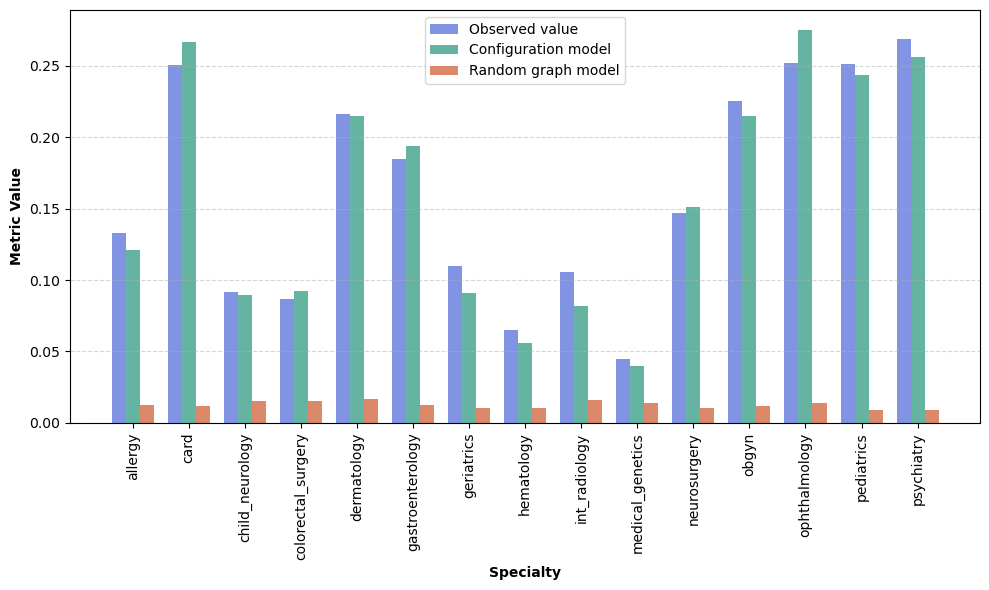

In [90]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the bar width
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = range(len(metrics['specialty']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

cols = ["#51a050", "#ab72d0", "#8f9532", "#6079dc", "#b28340", "#769ae1", "#d26a46", "#3d9fc5", "#da5676", "#3fa18a", "#cc64a8", "#72925b", "#6374b2", "#c57378", "#a97db2"]

# Create the bars
plt.bar(r1, metrics['specialty_metric'], width=bar_width, color = cols[3], alpha = 0.8, label='Observed value')
plt.bar(r2, metrics['config_metric'], width=bar_width, color = cols[9], alpha = 0.8, label='Configuration model')
plt.bar(r3, metrics['random_metric'], width=bar_width, color = cols[6], alpha = 0.8, label='Random graph model')

# Add labels
plt.xlabel('Specialty', fontweight='bold')
plt.ylabel('Metric Value', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(metrics['specialty']))], metrics['specialty'], rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.5)
# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig('../figs/avg_clustering_coefficient_specialties.png')
plt.show()

In [72]:
for s in tqdm(specialties):
    filtered_tdf_all = tdf_all[tdf_all['specialty'] == s].copy()
    g_agg = temporal_network_from_data(
        data = filtered_tdf_all,
        aggregation="all",
        #interval_size=1,
        directed=True
    )
    print(nx.density(g_agg))

  7%|▋         | 1/15 [00:00<00:03,  4.24it/s]

0.006551740202402454


 20%|██        | 3/15 [00:01<00:04,  2.77it/s]

0.006134994483361161
0.006903040426578229


 27%|██▋       | 4/15 [00:01<00:03,  3.66it/s]

0.007661964145645526


 33%|███▎      | 5/15 [00:01<00:03,  3.13it/s]

0.008148323644642713


 40%|████      | 6/15 [00:02<00:03,  2.58it/s]

0.0062228158939866395


 53%|█████▎    | 8/15 [00:02<00:02,  3.42it/s]

0.005167015820604245
0.005397750004000704


 60%|██████    | 9/15 [00:02<00:01,  3.98it/s]

0.008186414524442694
0.005772446383133406


 73%|███████▎  | 11/15 [00:03<00:00,  4.79it/s]

0.0051445678425857


 80%|████████  | 12/15 [00:03<00:01,  2.83it/s]

0.005756225247204457


 87%|████████▋ | 13/15 [00:04<00:00,  2.23it/s]

0.007064601569360641


 93%|█████████▎| 14/15 [00:05<00:00,  1.82it/s]

0.004804580669414879


100%|██████████| 15/15 [00:06<00:00,  2.28it/s]

0.004670725787848517


In [91]:
specialties = np.unique(tdf_all['specialty'])
specialty_metric = []
config_metric = []
random_metric = []
for s in tqdm(specialties):
    filtered_tdf_all = tdf_all[tdf_all['specialty'] == s].copy()
    g_agg = temporal_network_from_data(
        data = filtered_tdf_all,
        aggregation="all",
        #interval_size=1,
        directed=True
    )
    specialty_metric.append(nx.transitivity(g_agg))
    g = g_agg.copy()
    config_model = nx.directed_edge_swap(g, nswap=5*g.number_of_edges(), max_tries=500*g.number_of_edges())
    config_metric.append(nx.transitivity(config_model))
    g = g_agg.copy()
    random_model = nx.gnm_random_graph(g_agg.number_of_nodes(), g_agg.number_of_edges())
    random_metric.append(nx.transitivity(random_model))

metrics = pd.DataFrame({
    'specialty': specialties,
    'specialty_metric': specialty_metric,
    'config_metric': config_metric,
    'random_metric': random_metric
})

100%|██████████| 15/15 [00:47<00:00,  3.17s/it]


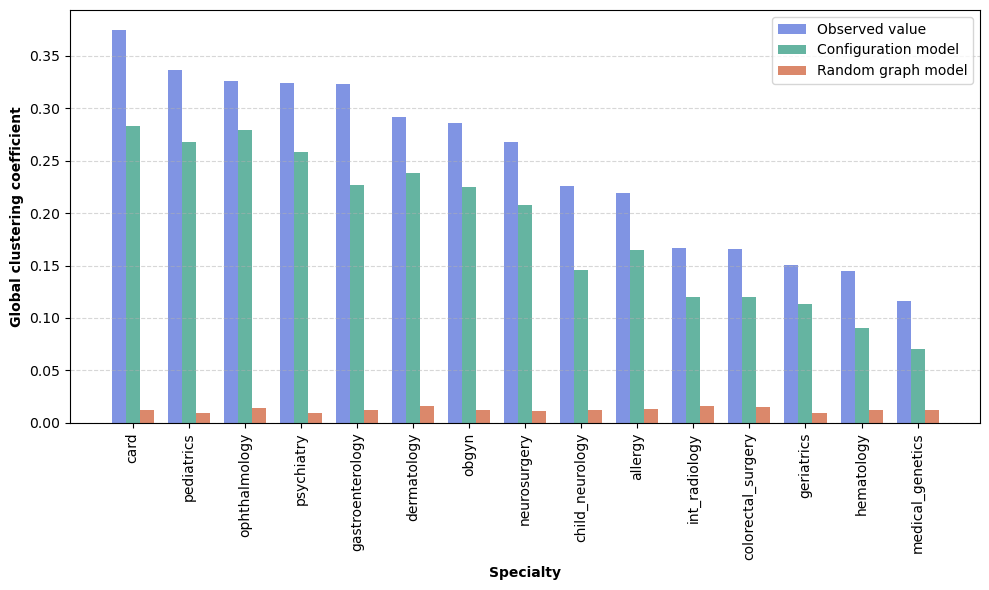

In [111]:
import matplotlib.pyplot as plt

# Sort the metrics_reciprocity DataFrame by the 'specialty_metric' column in descending order
metrics = metrics.sort_values(by='specialty_metric', ascending=False)

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the bar width
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = range(len(metrics['specialty']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

cols = ["#51a050", "#ab72d0", "#8f9532", "#6079dc", "#b28340", "#769ae1", "#d26a46", "#3d9fc5", "#da5676", "#3fa18a", "#cc64a8", "#72925b", "#6374b2", "#c57378", "#a97db2"]

# Create the bars
plt.bar(r1, metrics['specialty_metric'], width=bar_width, color = cols[3], alpha = 0.8, label='Observed value')
plt.bar(r2, metrics['config_metric'], width=bar_width, color = cols[9], alpha = 0.8, label='Configuration model')
plt.bar(r3, metrics['random_metric'], width=bar_width, color = cols[6], alpha = 0.8, label='Random graph model')

# Add labels
plt.xlabel('Specialty', fontweight='bold')
plt.ylabel('Global clustering coefficient', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(metrics['specialty']))], metrics['specialty'], rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.5)
# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig('../figs/global_clustering_specialties.png')
plt.show()

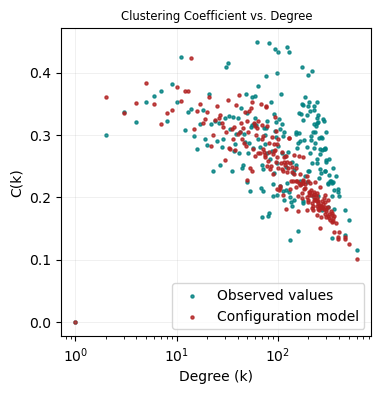

In [88]:
filtered_tdf_all = tdf_all[tdf_all['specialty'] == 'card'].copy()
g_agg = temporal_network_from_data(
    data = filtered_tdf_all,
    aggregation="all",
    #interval_size=1,
    directed=True
)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
degree_clustering = {}
for node in g_agg.nodes():
    k = g_agg.degree[node]
    clustering = nx.clustering(g_agg, node)
    if k not in degree_clustering:
        degree_clustering[k] = []
    degree_clustering[k].append(clustering)

k_values = sorted(degree_clustering.keys())
C_k = [np.mean(degree_clustering[k]) for k in k_values]
ax.scatter(k_values, C_k, marker = 'o', color='teal', alpha=0.8,  s = 5, label='Observed values')
ax.grid(linewidth=0.7, color='#999999', alpha=0.15, linestyle='-')
ax.set_xlabel('Degree (k)')
ax.set_ylabel('C(k)')
ax.set_title('Clustering Coefficient vs. Degree', fontsize='small')

g = g_agg.copy()
config_model = nx.directed_edge_swap(g, nswap=5*g.number_of_edges(), max_tries=500*g.number_of_edges())
degree_clustering = {}
for node in config_model.nodes():
    k = config_model.degree[node]
    clustering = nx.clustering(config_model, node)
    if k not in degree_clustering:
        degree_clustering[k] = []
    degree_clustering[k].append(clustering)

k_values = sorted(degree_clustering.keys())
C_k = [np.mean(degree_clustering[k]) for k in k_values]
ax.scatter(k_values, C_k, marker = 'o', color='firebrick', alpha=0.8,  s = 5, label='Configuration model')
ax.set_xscale('log')
ax.grid(linewidth=0.7, color='#999999', alpha=0.15, linestyle='-')
ax.set_xlabel('Degree (k)')
ax.set_ylabel('C(k)')
ax.set_title('Clustering Coefficient vs. Degree', fontsize='small')
plt.savefig('../figs/clustering_coefficient_vs_degree_card.png')
ax.legend()


In [95]:
specialties = np.unique(tdf_all['specialty'])
specialty_metric = []
config_metric = []
random_metric = []
for s in tqdm(specialties):
    filtered_tdf_all = tdf_all[tdf_all['specialty'] == s].copy()
    g_agg = temporal_network_from_data(
        data = filtered_tdf_all,
        aggregation="all",
        #interval_size=1,
        directed=True
    )
    scc = list(nx.strongly_connected_components(g_agg))
    largest_scc = max(scc, key=len)
    g_agg = g_agg.subgraph(largest_scc).copy()
    specialty_metric.append(nx.average_shortest_path_length(g_agg))
    g = g_agg.copy()
    config_model = nx.directed_edge_swap(g, nswap=5*g.number_of_edges(), max_tries=500*g.number_of_edges())
    config_metric.append(nx.average_shortest_path_length(config_model))
    g = g_agg.copy()
    random_model = nx.gnm_random_graph(g_agg.number_of_nodes(), g_agg.number_of_edges())
    random_metric.append(nx.average_shortest_path_length(random_model))

metrics_shortest_path = pd.DataFrame({
    'specialty': specialties,
    'specialty_metric': specialty_metric,
    'config_metric': config_metric,
    'random_metric': random_metric
})

100%|██████████| 15/15 [00:54<00:00,  3.60s/it]


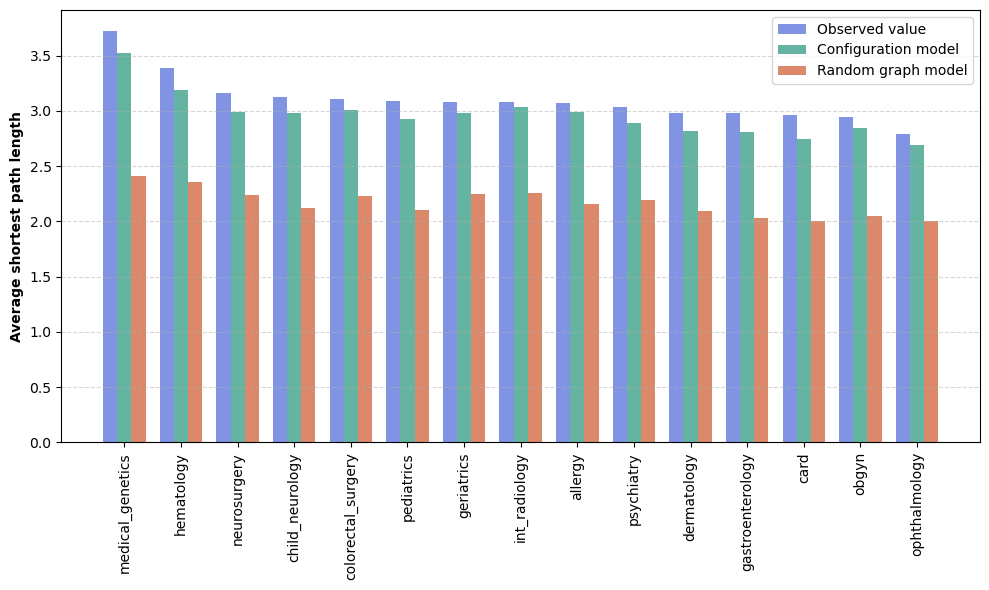

In [109]:
import matplotlib.pyplot as plt

# Sort the metrics_reciprocity DataFrame by the 'specialty_metric' column in descending order
metrics_shortest_path = metrics_shortest_path.sort_values(by='specialty_metric', ascending=False)

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the bar width
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = range(len(metrics_shortest_path['specialty']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

cols = ["#51a050", "#ab72d0", "#8f9532", "#6079dc", "#b28340", "#769ae1", "#d26a46", "#3d9fc5", "#da5676", "#3fa18a", "#cc64a8", "#72925b", "#6374b2", "#c57378", "#a97db2"]

# Create the bars
plt.bar(r1, metrics_shortest_path['specialty_metric'], width=bar_width, color = cols[3], alpha = 0.8, label='Observed value')
plt.bar(r2, metrics_shortest_path['config_metric'], width=bar_width, color = cols[9], alpha = 0.8, label='Configuration model')
plt.bar(r3, metrics_shortest_path['random_metric'], width=bar_width, color = cols[6], alpha = 0.8, label='Random graph model')

# Add labels
# plt.xlabel('Specialty', fontweight='bold')
plt.ylabel('Average shortest path length', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(metrics_shortest_path['specialty']))], metrics_shortest_path['specialty'], rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.5)
# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig('../figs/shortest_path_specialties.png')
plt.show()

In [ ]:
specialties = np.unique(tdf_all['specialty'])
specialty_metric = []
config_metric = []
random_metric = []
for s in tqdm(specialties):
    filtered_tdf_all = tdf_all[tdf_all['specialty'] == s].copy()
    g_agg = temporal_network_from_data(
        data = filtered_tdf_all,
        aggregation="all",
        #interval_size=1,
        directed=True
    )
    specialty_metric.append(nx.transitivity(g_agg))
    g = g_agg.copy()
    config_model = nx.directed_edge_swap(g, nswap=5*g.number_of_edges(), max_tries=500*g.number_of_edges())
    config_metric.append(nx.transitivity(config_model))
    g = g_agg.copy()
    random_model = nx.gnm_random_graph(g_agg.number_of_nodes(), g_agg.number_of_edges())
    random_metric.append(nx.transitivity(random_model))

metrics = pd.DataFrame({
    'specialty': specialties,
    'specialty_metric': specialty_metric,
    'config_metric': config_metric,
    'random_metric': random_metric
})

In [106]:
specialties = np.unique(tdf_all['specialty'])
specialty_metric = []
config_metric = []
random_metric = []
for s in tqdm(specialties):
    filtered_tdf_all = tdf_all[tdf_all['specialty'] == s].copy()
    g_agg = temporal_network_from_data(
        data = filtered_tdf_all,
        aggregation="all",
        #interval_size=1,
        directed=True
    )
    reciprocated_edges = [(u, v) for u, v in g_agg.edges if g_agg.has_edge(v, u)]
    num_reciprocated_edges = len(reciprocated_edges)
    specialty_metric.append(num_reciprocated_edges/(g_agg.number_of_edges()))
    g = g_agg.copy()
    config_model = nx.directed_edge_swap(g, nswap=5*g.number_of_edges(), max_tries=500*g.number_of_edges())
    reciprocated_edges = [(u, v) for u, v in config_model.edges if config_model.has_edge(v, u)]
    num_reciprocated_edges = len(reciprocated_edges)
    config_metric.append(num_reciprocated_edges/(config_model.number_of_edges()))
    g = g_agg.copy()
    random_model = nx.gnm_random_graph(g_agg.number_of_nodes(), g_agg.number_of_edges(), directed=True)
    reciprocated_edges = [(u, v) for u, v in random_model.edges if random_model.has_edge(v, u)]
    num_reciprocated_edges = len(reciprocated_edges)
    random_metric.append(num_reciprocated_edges/(random_model.number_of_edges()))

metrics_reciprocity = pd.DataFrame({
    'specialty': specialties,
    'specialty_metric': specialty_metric,
    'config_metric': config_metric,
    'random_metric': random_metric
})

100%|██████████| 15/15 [00:40<00:00,  2.70s/it]


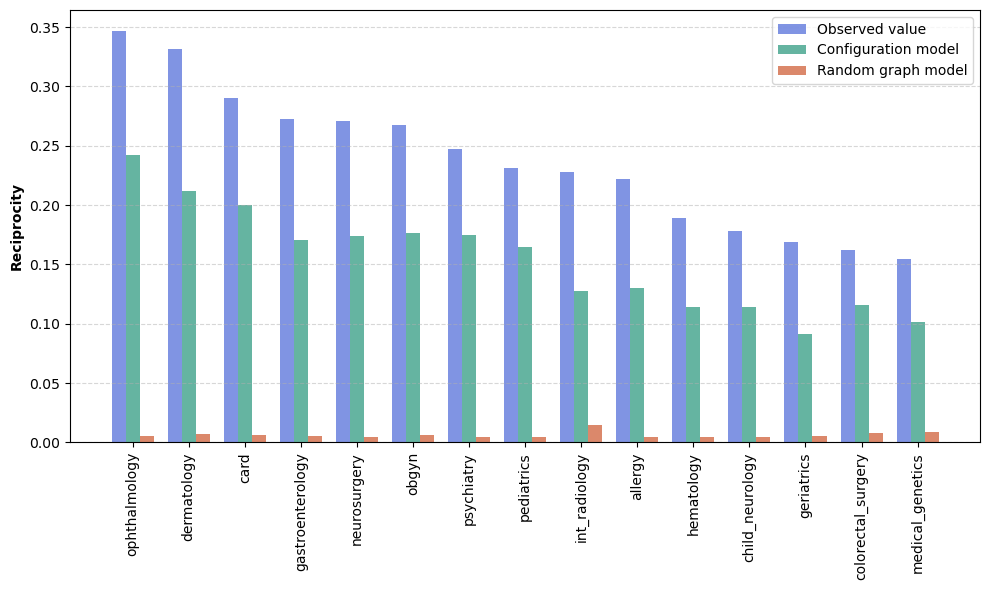

In [108]:
# Sort the metrics_reciprocity DataFrame by the 'specialty_metric' column in descending order
metrics_reciprocity_sorted = metrics_reciprocity.sort_values(by='specialty_metric', ascending=False)

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the bar width
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = range(len(metrics_reciprocity_sorted['specialty']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

cols = ["#51a050", "#ab72d0", "#8f9532", "#6079dc", "#b28340", "#769ae1", "#d26a46", "#3d9fc5", "#da5676", "#3fa18a", "#cc64a8", "#72925b", "#6374b2", "#c57378", "#a97db2"]

# Create the bars
plt.bar(r1, metrics_reciprocity_sorted['specialty_metric'], width=bar_width, color = cols[3], alpha = 0.8, label='Observed value')
plt.bar(r2, metrics_reciprocity_sorted['config_metric'], width=bar_width, color = cols[9], alpha = 0.8, label='Configuration model')
plt.bar(r3, metrics_reciprocity_sorted['random_metric'], width=bar_width, color = cols[6], alpha = 0.8, label='Random graph model')

# Add labels
# plt.xlabel('Specialty', fontweight='bold')
plt.ylabel('Reciprocity', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(metrics_reciprocity_sorted['specialty']))], metrics_reciprocity_sorted['specialty'], rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.5)
# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig('../figs/reciprocity_specialties.png')
plt.show()

In [118]:
specialties = np.unique(tdf_all['specialty'])
specialty_metric = []
config_metric = []
random_metric = []
for s in tqdm(specialties):
    filtered_tdf_all = tdf_all[tdf_all['specialty'] == s].copy()
    g_agg = temporal_network_from_data(
        data = filtered_tdf_all,
        aggregation="all",
        #interval_size=1,
        directed=True
    )
    specialty_metric.append(nx.degree_assortativity_coefficient(g_agg, x="in", y="in"))
    g = g_agg.copy()
    config_model = nx.directed_edge_swap(g, nswap=5*g.number_of_edges(), max_tries=500*g.number_of_edges())
    config_metric.append(nx.degree_assortativity_coefficient(config_model, x="in", y="in"))
    g = g_agg.copy()
    random_model = nx.gnm_random_graph(g_agg.number_of_nodes(), g_agg.number_of_edges(), directed=True)
    random_metric.append(nx.degree_assortativity_coefficient(random_model, x="in", y="in"))

metrics_out_in_ass = pd.DataFrame({
    'specialty': specialties,
    'specialty_metric': specialty_metric,
    'config_metric': config_metric,
    'random_metric': random_metric
})

100%|██████████| 15/15 [00:40<00:00,  2.72s/it]


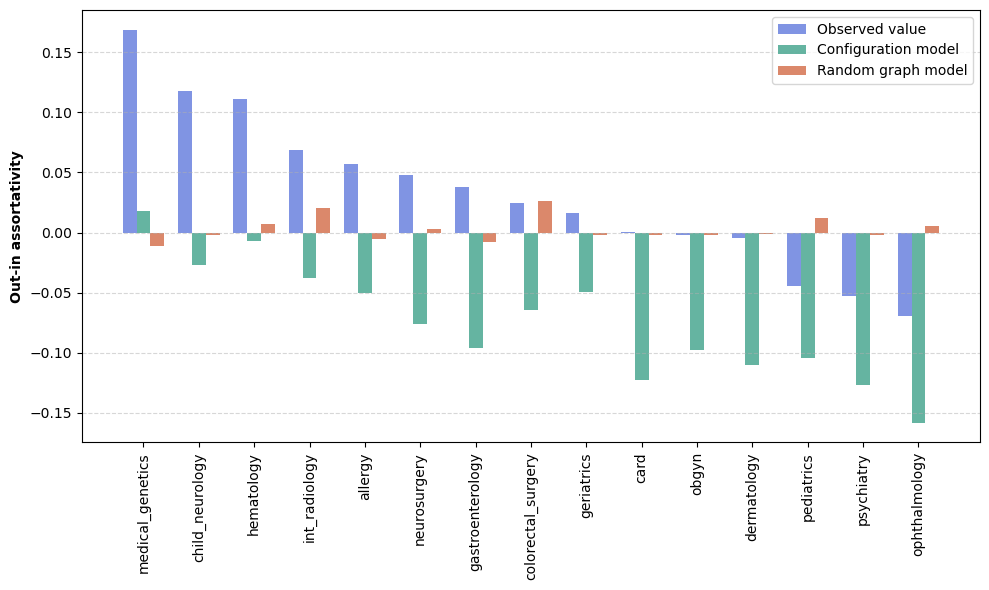

In [119]:
# Sort the metrics_reciprocity DataFrame by the 'specialty_metric' column in descending order
metrics_out_in_ass = metrics_out_in_ass.sort_values(by='specialty_metric', ascending=False)

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the bar width
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = range(len(metrics_reciprocity_sorted['specialty']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

cols = ["#51a050", "#ab72d0", "#8f9532", "#6079dc", "#b28340", "#769ae1", "#d26a46", "#3d9fc5", "#da5676", "#3fa18a", "#cc64a8", "#72925b", "#6374b2", "#c57378", "#a97db2"]

# Create the bars
plt.bar(r1, metrics_out_in_ass['specialty_metric'], width=bar_width, color = cols[3], alpha = 0.8, label='Observed value')
plt.bar(r2, metrics_out_in_ass['config_metric'], width=bar_width, color = cols[9], alpha = 0.8, label='Configuration model')
plt.bar(r3, metrics_out_in_ass['random_metric'], width=bar_width, color = cols[6], alpha = 0.8, label='Random graph model')

# Add labels
# plt.xlabel('Specialty', fontweight='bold')
plt.ylabel('Out-in assortativity', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(metrics_out_in_ass['specialty']))], metrics_out_in_ass['specialty'], rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.5)
# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig('../figs/out_in_ass_specialties.png')
plt.show()

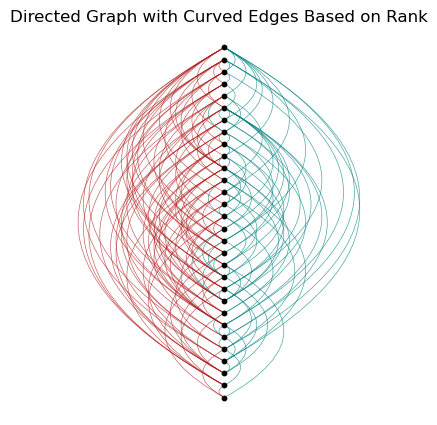

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import FancyArrowPatch
from matplotlib.path import Path
import random

# Generate a random directed graph for this example
G = nx.gnp_random_graph(30, 0.2, directed=True)

# Calculate rank based on degree (or another ranking metric)
rank = {node: degree for node, degree in G.in_degree()}

# Sort nodes by rank and assign them a y-position
sorted_nodes = sorted(rank.keys(), key=lambda x: rank[x])
y_positions = {node: i for i, node in enumerate(sorted_nodes)}

# Assign x-positions for nodes to center them
x_positions = {node: 0 for node in sorted_nodes}

# Function to draw curved edges
def draw_curved_edge(ax, x_start, y_start, x_end, y_end, color, curvature=curvature):
    control_x = (x_start + x_end) / 2 + curvature
    control_y = (y_start + y_end) / 2
    path_data = [
        (1, (x_start, y_start)),  # Move to
        (3, (control_x, control_y)),  # Curve to
        (3, (x_end, y_end)),  # Curve to
    ]
    path = Path([point for code, point in path_data], [code for code, point in path_data])
    patch = FancyArrowPatch(
        path=path,
        connectionstyle=f"arc3,rad={curvature}",
        color=color,
        lw=0.5,
        alpha=0.7,
        arrowstyle="-",
    )
    ax.add_patch(patch)

# Create plot
fig, ax = plt.subplots(figsize=(4, 5))

# Draw edges with curves and different colors
for u, v in G.edges:
    x_start, y_start = x_positions[u], y_positions[u]
    x_end, y_end = x_positions[v], y_positions[v]
    if rank[u] < rank[v]:  # Edge goes up the hierarchy
        color = "firebrick"
    else:  # Edge goes down the hierarchy
        color = "teal"
    #curvature = -0.1 if x_start < x_end else 0.1
    curvature = ((y_start - y_end)) * 0.01
    draw_curved_edge(ax, x_start, y_start, x_end, y_end, color, curvature)

# Draw nodes
nx.draw_networkx_nodes(
    G,
    pos={node: (x_positions[node], y_positions[node]) for node in G.nodes()},
    node_size=10,
    node_color="black",
    ax=ax,
)

# Remove axes for cleaner visualization
ax.axis("off")
plt.title("Directed Graph with Curved Edges Based on Rank")
plt.show()


In [125]:
specialties = np.unique(tdf_all['specialty'])
specialties

array(['allergy', 'card', 'child_neurology', 'colorectal_surgery',
       'dermatology', 'gastroenterology', 'geriatrics', 'hematology',
       'int_radiology', 'medical_genetics', 'neurosurgery', 'obgyn',
       'ophthalmology', 'pediatrics', 'psychiatry'], dtype=object)

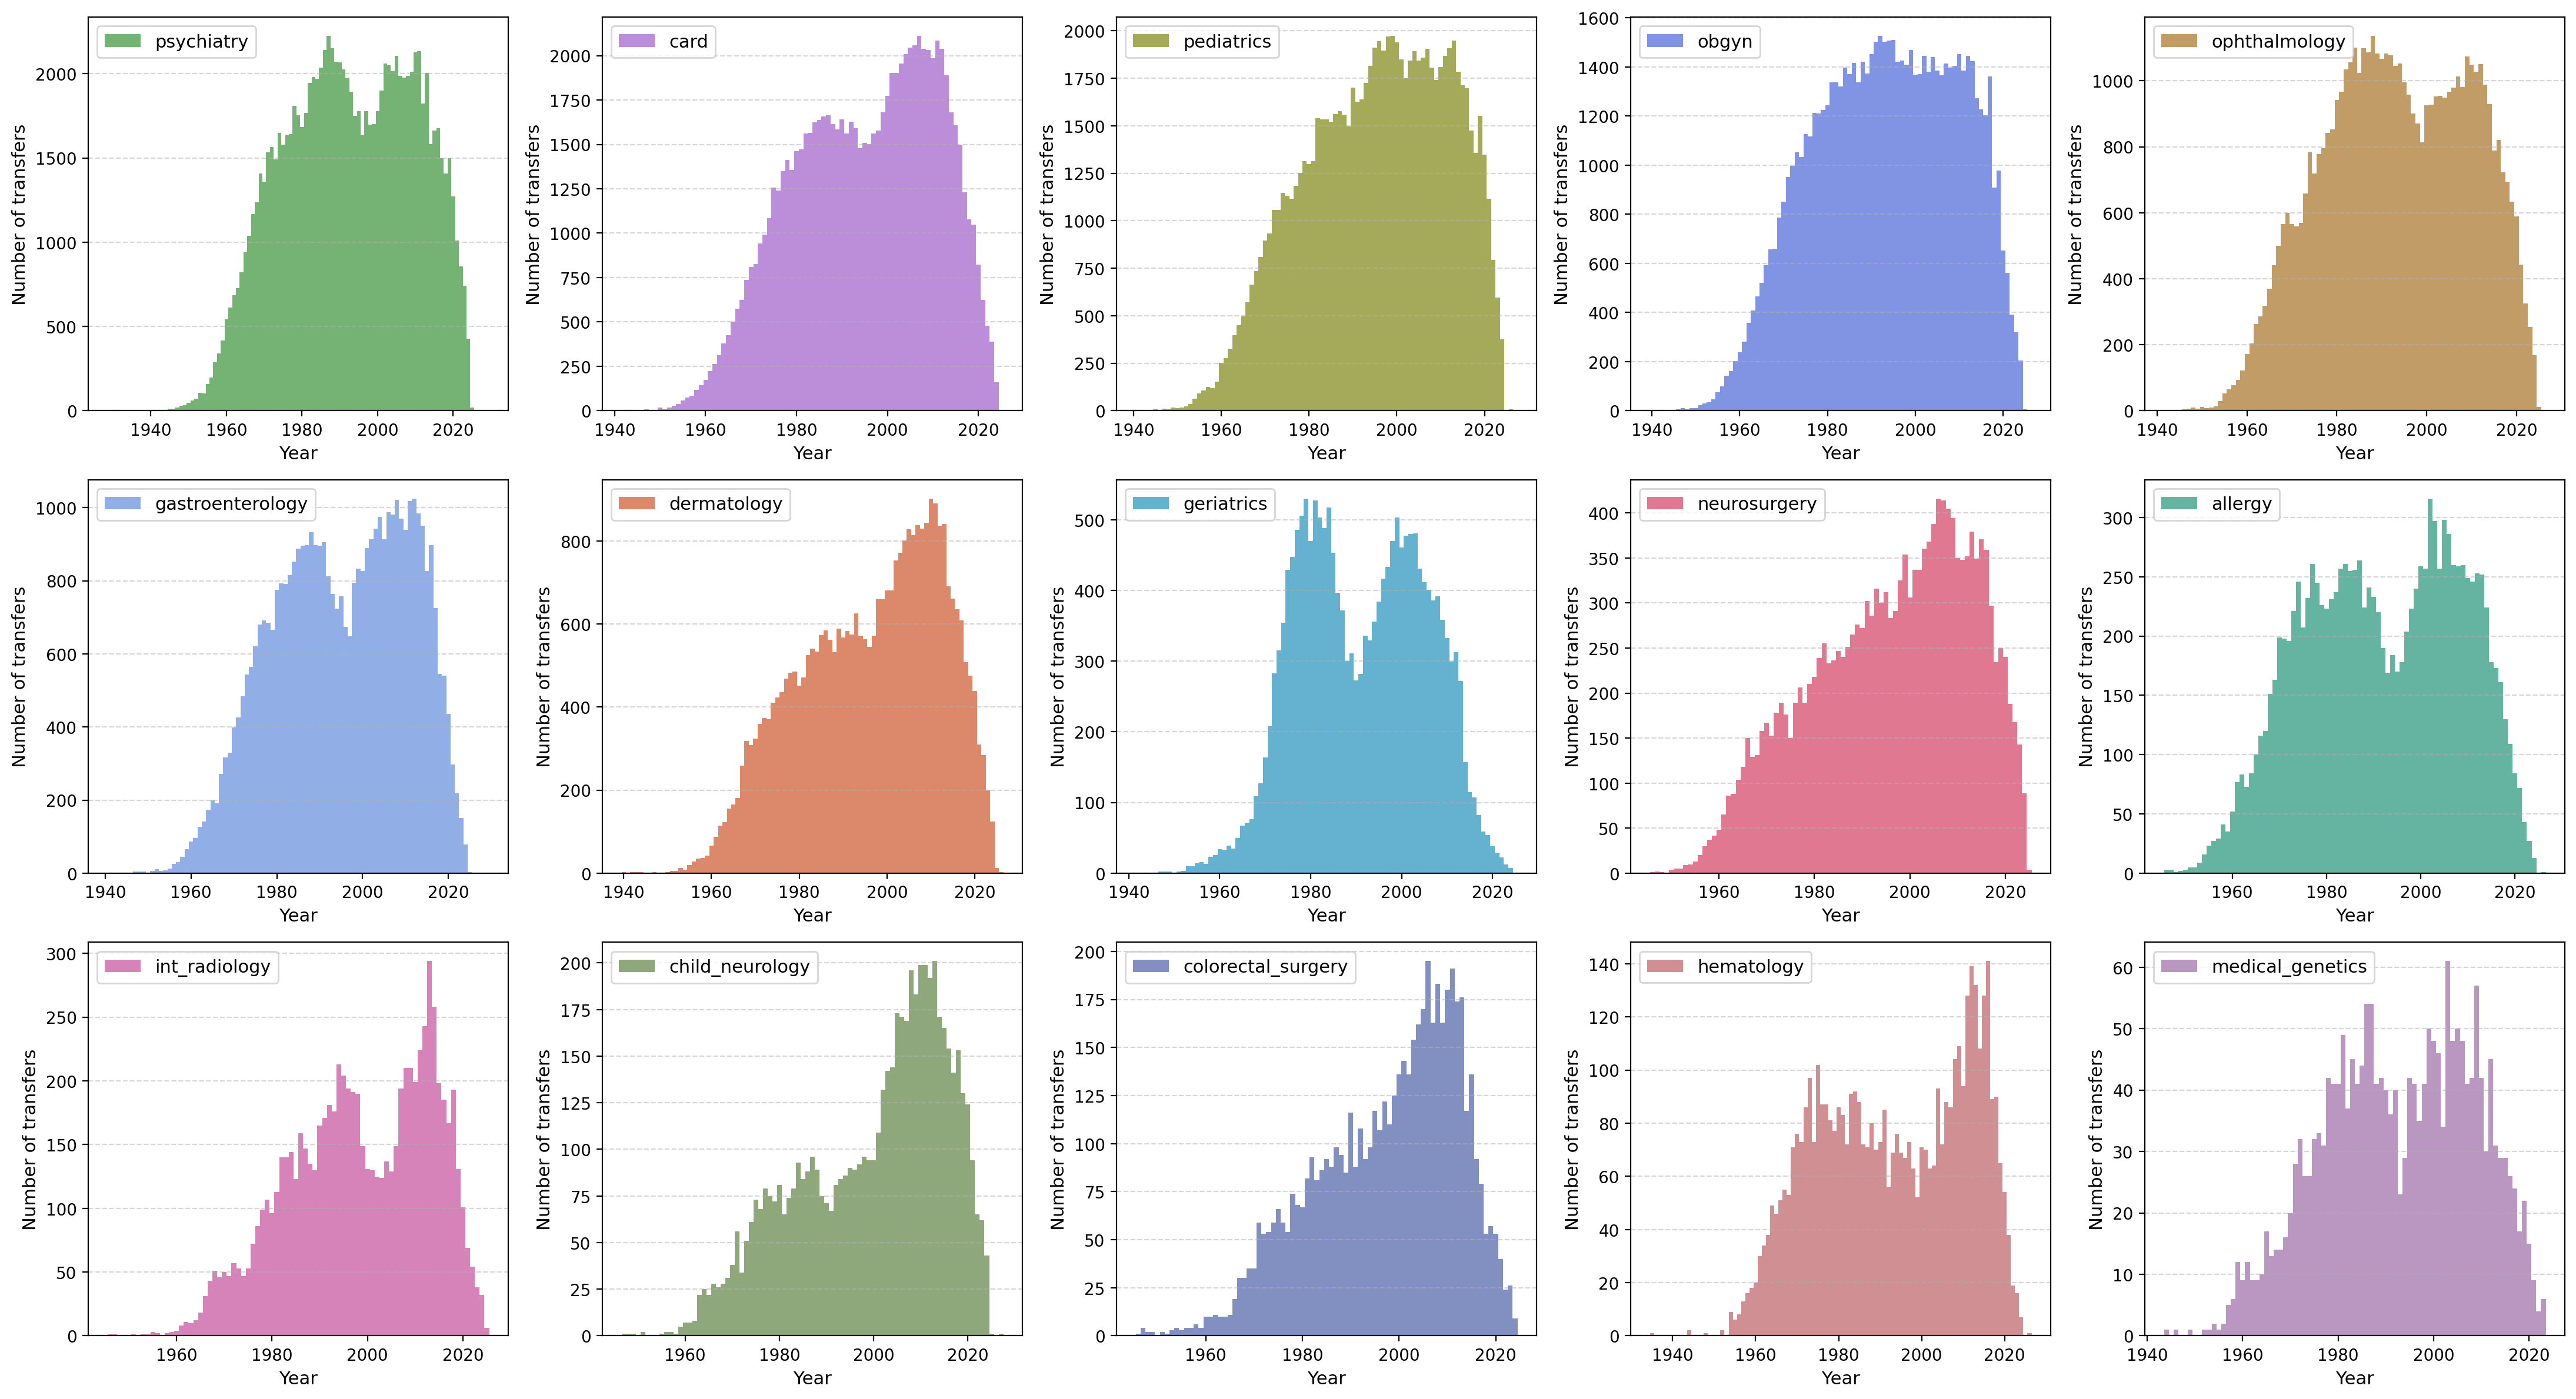

In [128]:
import matplotlib.cm as cm
fig, ax = plt.subplots(3, 5, figsize=(22, 12), dpi=200)

bin_size = 1
cols = ["#51a050", "#ab72d0", "#8f9532", "#6079dc", "#b28340", "#769ae1", "#d26a46", "#3d9fc5", "#da5676", "#3fa18a", "#cc64a8", "#72925b", "#6374b2", "#c57378", "#a97db2"]

# Calculate the maximum y-axis value for each specialty
max_y_values = []
for s in specialties:
    tdf = tdf_all[tdf_all['specialty'] == s].copy()
    tdf['time_elapsed'] = tdf['timestamp'] - tdf['timestamp'].min()
    tdf["time_bin"] = (tdf['time_elapsed'] // bin_size) * bin_size
    aggregate_counts = tdf["time_bin"].value_counts().sort_index()
    max_y_values.append((s, aggregate_counts.max()))

# Sort specialties based on the maximum y-axis value in descending order
sorted_specialties = sorted(max_y_values, key=lambda x: x[1], reverse=True)

# Plot the data
for i, (s, _) in enumerate(sorted_specialties):
    tdf = tdf_all[tdf_all['specialty'] == s].copy()
    tdf['time_elapsed'] = tdf['timestamp'] - tdf['timestamp'].min()
    tdf["time_bin"] = (tdf['time_elapsed'] // bin_size) * bin_size
    aggregate_counts = tdf["time_bin"].value_counts().sort_index()
    ax[i // 5, i % 5].bar(aggregate_counts.index + tdf['timestamp'].min(), aggregate_counts.values, width=bin_size, color=cols[i], alpha=0.8, label=s)

    ax[i // 5, i % 5].grid(axis="y", linestyle="--", alpha=0.5)

    ax[i // 5, i % 5].set_xlabel("Year", fontsize=11)
    ax[i // 5, i % 5].set_ylabel("Number of transfers", fontsize=11)
    ax[i // 5, i % 5].legend(fontsize=11)

plt.tight_layout()

plt.savefig('../figs/transfer_counts.png', dpi=625, bbox_inches='tight')
plt.savefig('../figs/transfer_counts.pdf', dpi=625, bbox_inches='tight')


### Temporal anomaly detection

In [122]:
import netrd

In [123]:
import numpy as np

def normalized_temporal_distance(graph_dict, distance_function):
    """
    Computes normalized temporal distances for a dictionary of {timestamp: graph}.
    
    Parameters:
        graph_dict (dict): A dictionary where keys are timestamps (sorted) and values are graph objects.
        distance_function (function): A function that takes two graphs and returns a distance measure.

    Returns:
        dict: A dictionary where keys are timestamps (starting from the second timestamp)
              and values are normalized temporal distances.
    """
    # Ensure the timestamps are sorted
    timestamps = sorted(graph_dict.keys())
    
    # Compute temporal distances
    temporal_distances = []
    for i in range(1, len(timestamps)):
        G_prev = graph_dict[timestamps[i - 1]]
        G_curr = graph_dict[timestamps[i]]
        temporal_distances.append(distance_function(G_prev, G_curr))
    
    # Compute mean of temporal distances
    mean_distance = np.mean(temporal_distances)
    
    # Normalize distances
    normalized_distances = {timestamps[i]: dist / mean_distance for i, dist in enumerate(temporal_distances, start=1)}
    
    return normalized_distances

In [ ]:
g = nx.gnp_random_graph(10, 0.2, directed=True)
f = g.add_nodes_from(range(10, 20))
f.nodes()

AttributeError: 'NoneType' object has no attribute 'nodes'

In [148]:
specialties

array(['allergy', 'card', 'child_neurology', 'colorectal_surgery',
       'dermatology', 'gastroenterology', 'geriatrics', 'hematology',
       'int_radiology', 'medical_genetics', 'neurosurgery', 'obgyn',
       'ophthalmology', 'pediatrics', 'psychiatry'], dtype=object)

In [150]:
anomaly = ['psychiatry', 'card', 'ophthalmology', 'gastroenterology', 'geriatrics', 'allergy', 'int_radiology', 'hematology', 'child_neurology' 'medical_genetics']

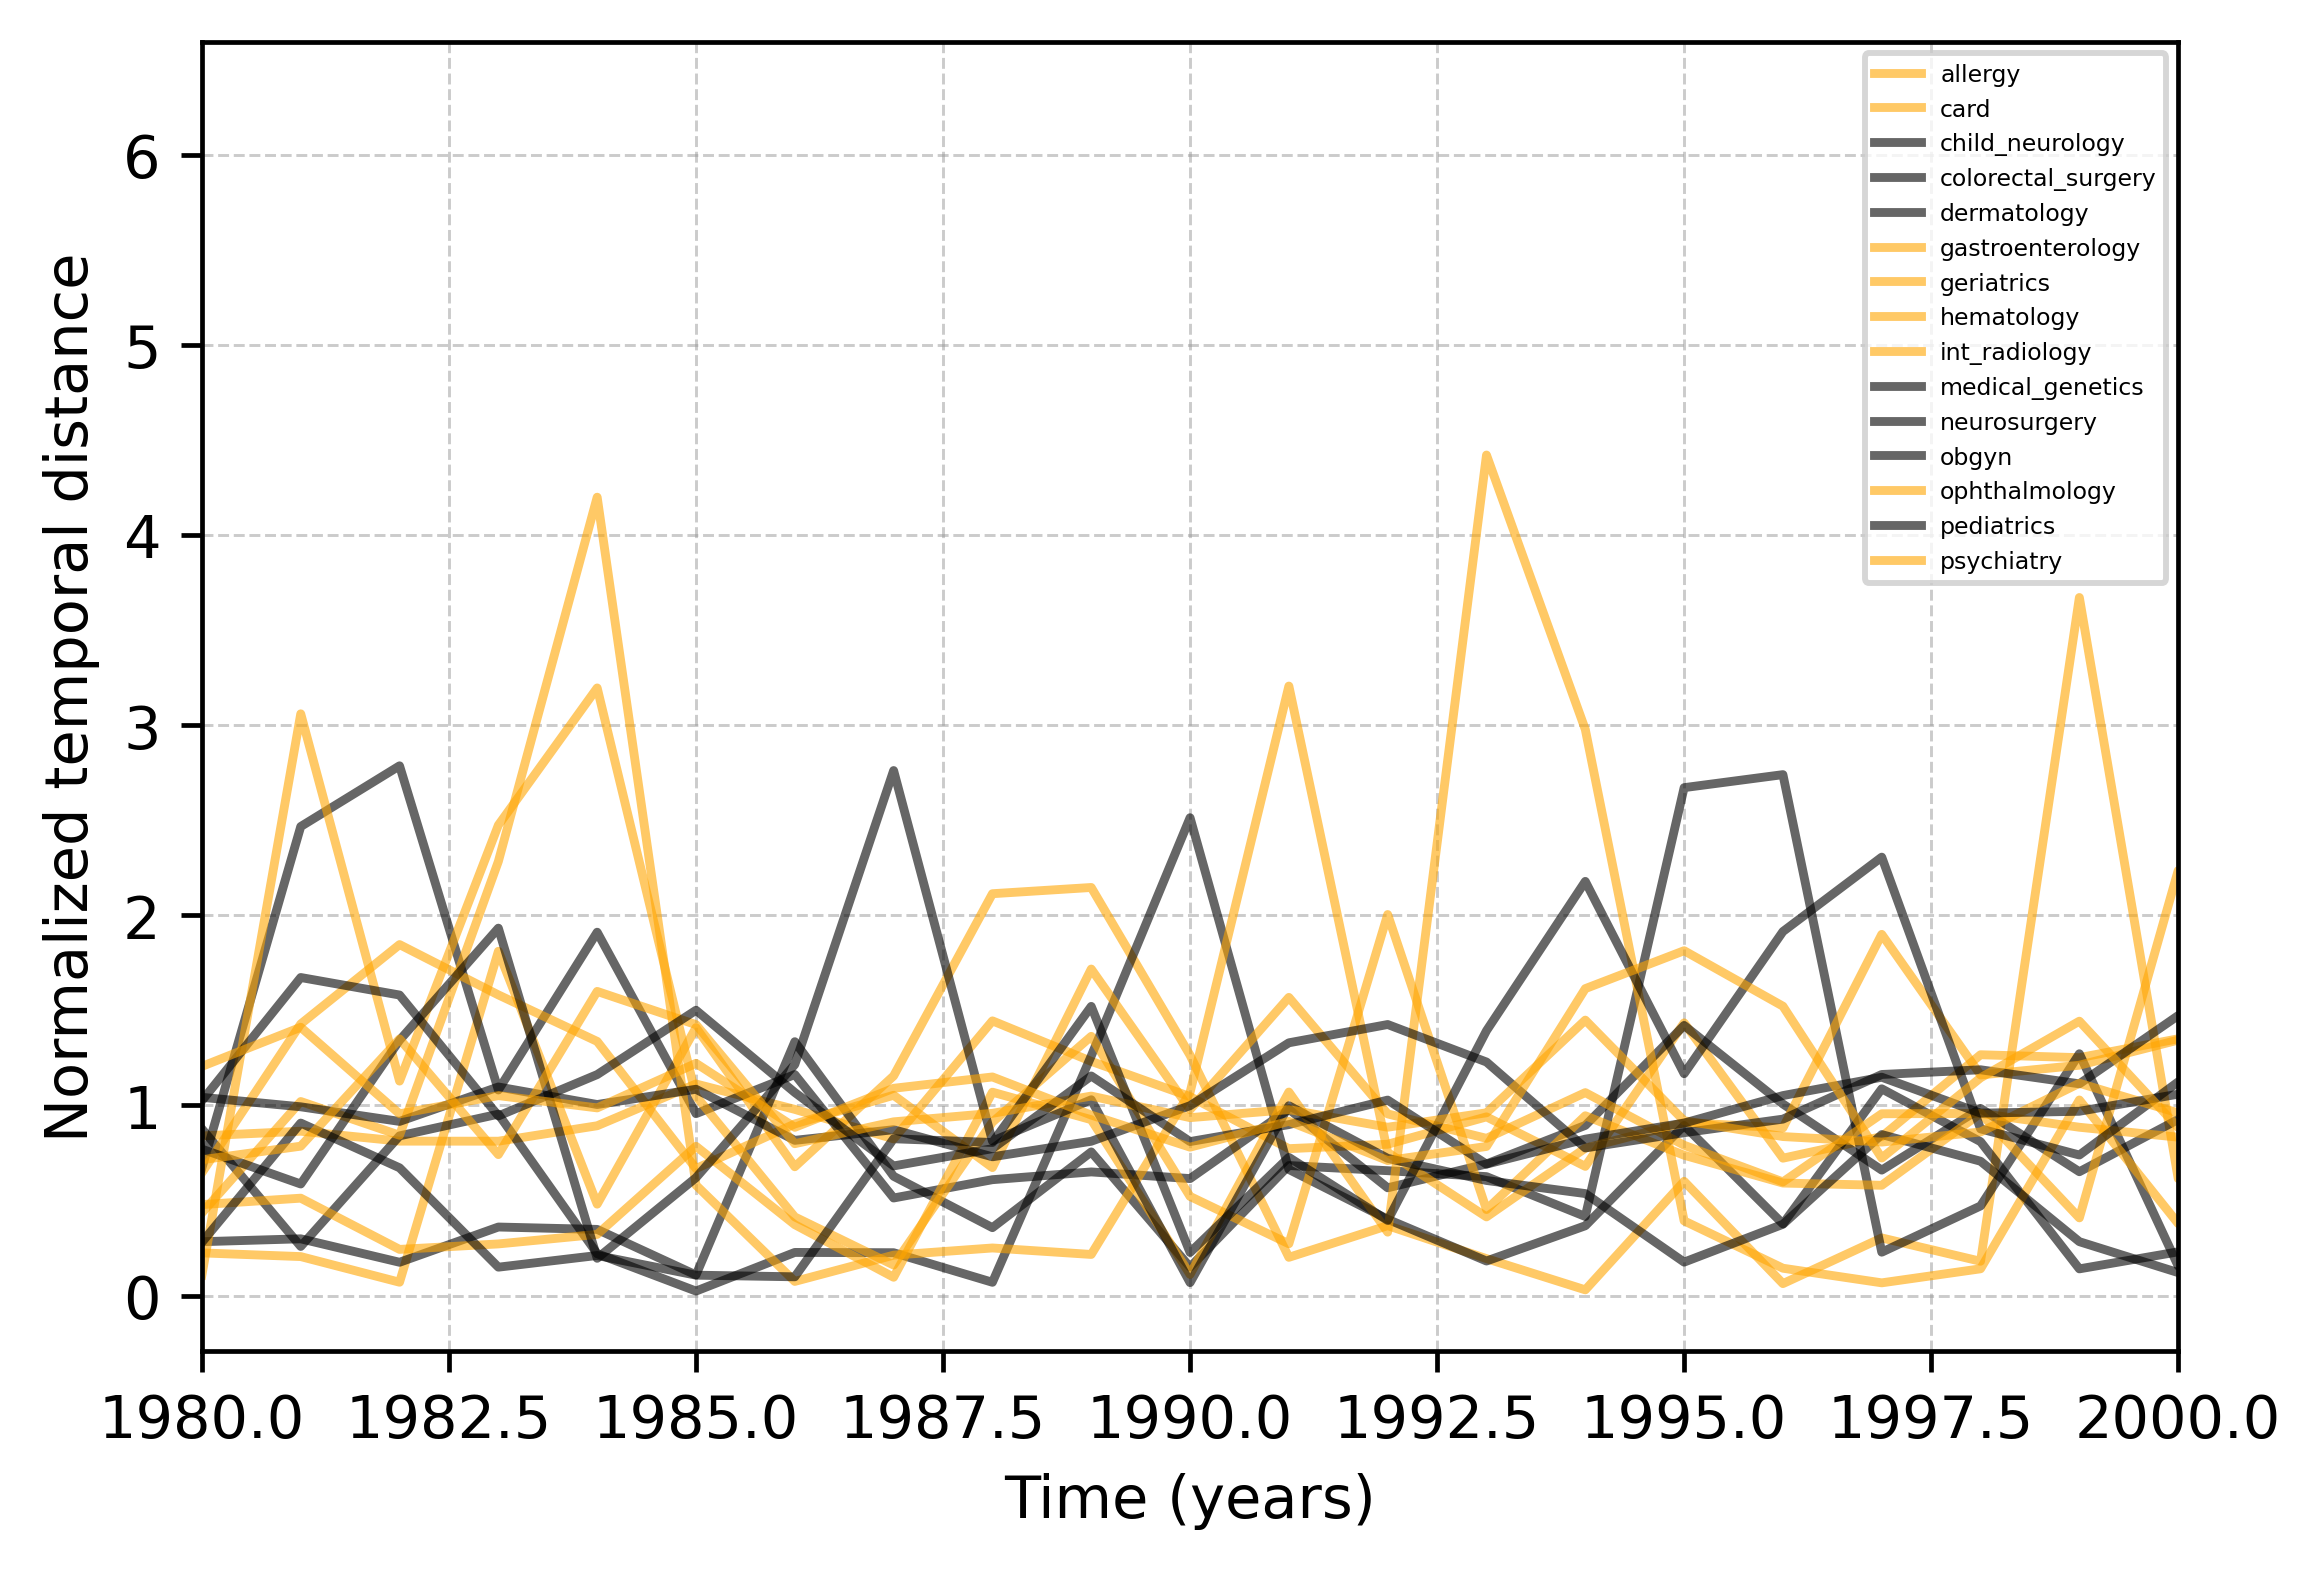

In [160]:
fig, ax = plt.subplots(1,1, figsize=(6,4), dpi = 425)
for i, s in enumerate(specialties):

    tdf = tdf_all[tdf_all['specialty'] == s].copy()
    tdf = tdf[(tdf['timestamp'] >= 1980) & (tdf['timestamp'] <= 2010)]
    g_t = temporal_network_from_data(
        tdf,
        aggregation='interval',
        interval_size=1,
        #interval_size=20,
        directed=True
    )
    g_agg = temporal_network_from_data(
        tdf,
        aggregation='all',
        #interval_size=20,
        directed=True
    )

    for k,v in g_t.items():
        v.add_nodes_from(g_agg.nodes)
    
    D = normalized_temporal_distance(g_t ,netrd.distance.PortraitDivergence())
    ax.plot(range(1980,2010), D.values(), color = 'orange' if s in anomaly else 'black', alpha = 0.6, label = s)
    #ax[1].set_xlim(0, 36)
    ax.grid(color = '#999999', linestyle = '--', linewidth = 0.5, alpha = 0.5)
    ax.set_xlabel('Time (years)')
    ax.set_ylabel('Normalized temporal distance')
    ax.legend(fontsize=4)
    ax.set_xlim(1980, 2000)

    # D = normalized_temporal_distance(g_t ,netrd.distance.DeltaCon())
    # ax.plot(D.keys(), D.values(), color = 'teal', alpha = 0.8, label = 'DeltaCon')
    # #ax[1].set_xlim(0, 36)
    # ax.legend()
    #ax.set_title(s)

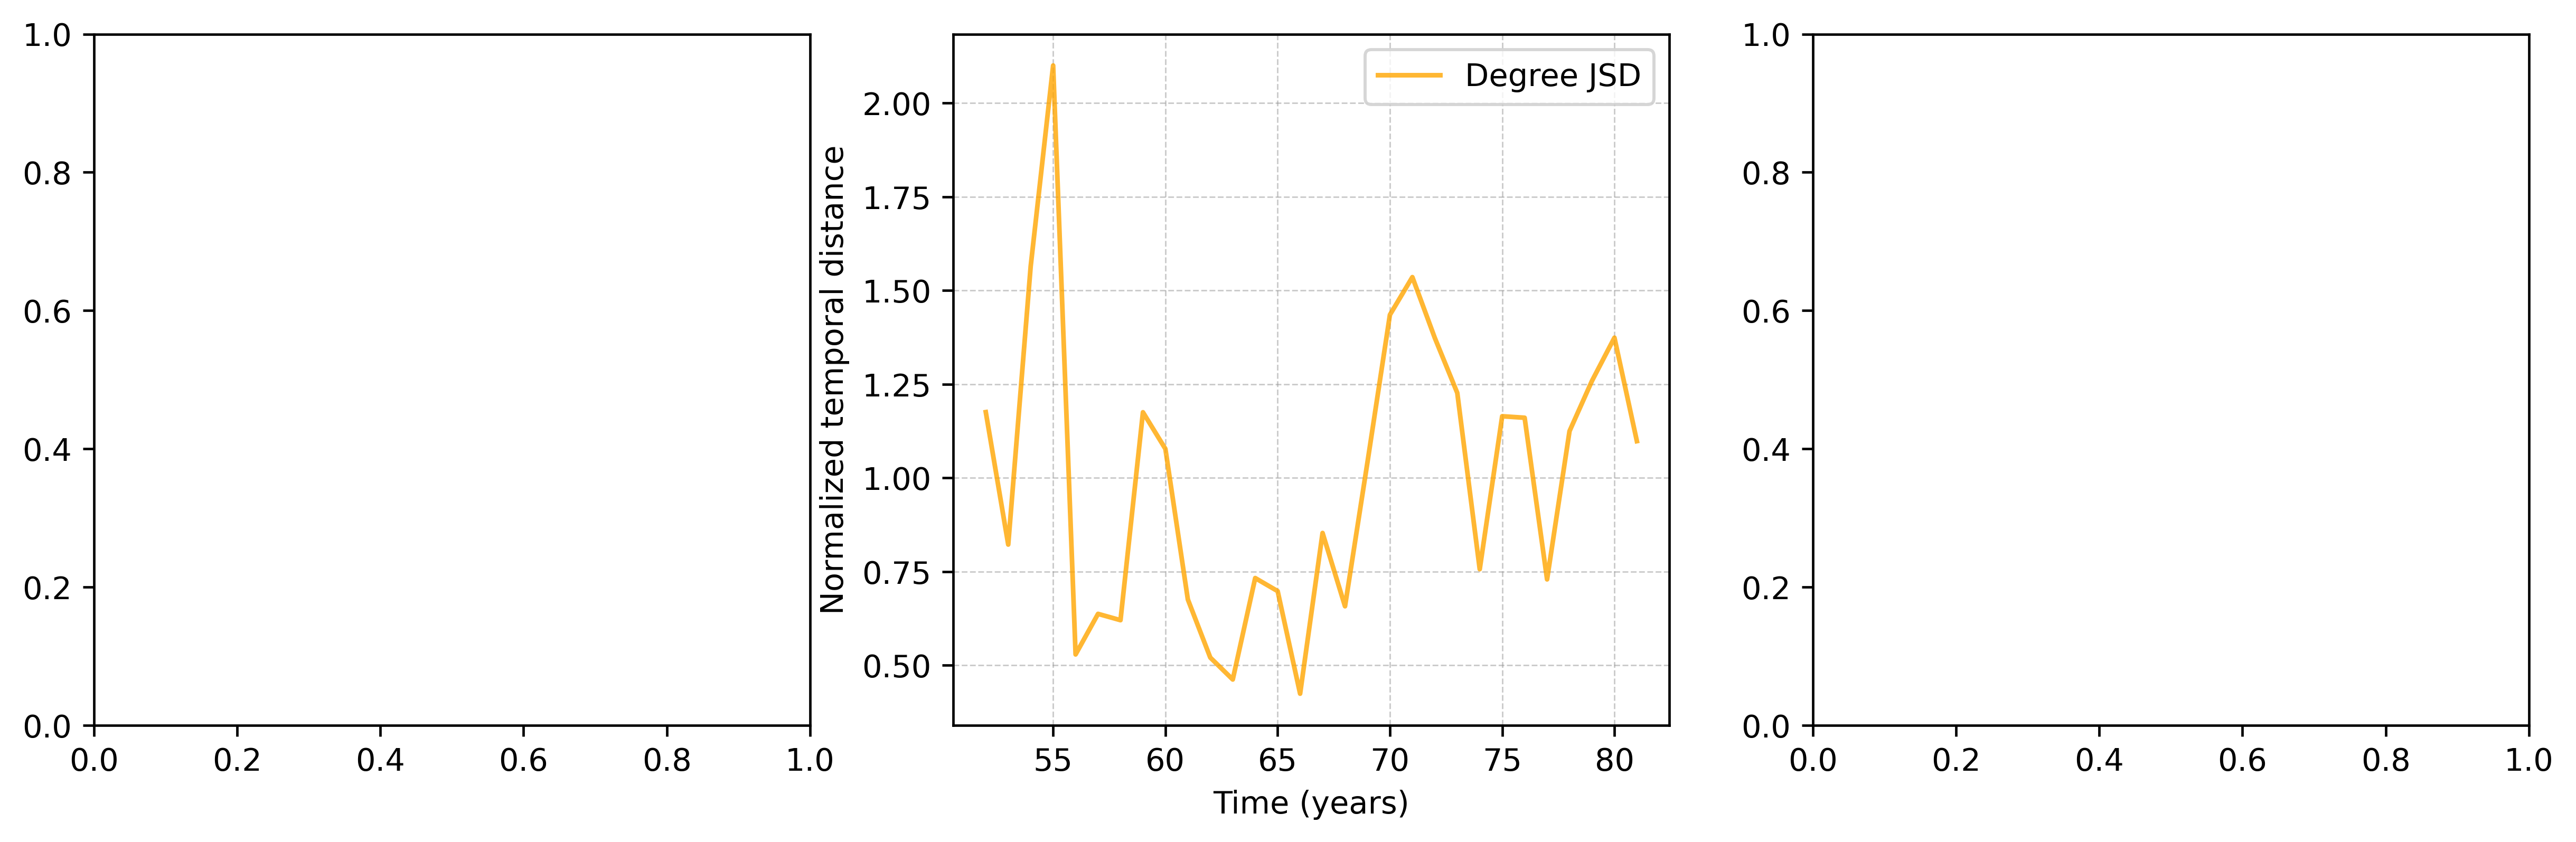

In [143]:
fig, ax = plt.subplots(1,3, figsize=(14,4), dpi = 425)
D = normalized_temporal_distance(g_t,netrd.distance.DegreeDivergence())
ax[1].plot(D.keys(), D.values(), color = 'orange', alpha = 0.8, label = 'Degree JSD')
#ax[1].set_xlim(0, 36)
ax[1].grid(color = '#999999', linestyle = '--', linewidth = 0.5, alpha = 0.5)
ax[1].set_xlabel('Time (years)')
ax[1].set_ylabel('Normalized temporal distance')
ax[1].legend()

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(14,4), dpi = 425)
D = normalized_temporal_distance(g_t, netrd.distance.JaccardDistance())
ax[0].plot([d/(60*60) for d in D.keys()], D.values(), color = 'teal', alpha = 0.8, label = 'Jaccard')
ax[0].set_xlim(0, 36)
ax[0].grid(color = '#999999', linestyle = '--', linewidth = 0.5, alpha = 0.5)
ax[0].set_xlabel('Time (hours)')
ax[0].set_ylabel('Normalized temporal distance')
ax[0].legend()
D = normalized_temporal_distance(g_t, netrd.distance.DegreeDivergence())
ax[1].plot([d/(60*60) for d in D.keys()], D.values(), color = 'orange', alpha = 0.8, label = 'Degree JSD')
ax[1].set_xlim(0, 36)
ax[1].grid(color = '#999999', linestyle = '--', linewidth = 0.5, alpha = 0.5)
ax[1].set_xlabel('Time (hours)')
ax[1].set_ylabel('Normalized temporal distance')
ax[1].legend()
D = normalized_temporal_distance(g_t, netrd.distance.DeltaCon())
ax[2].plot([d/(60*60) for d in D.keys()], D.values(), color = 'mediumvioletred', alpha = 0.8, label = 'DeltaCon')
ax[2].set_xlim(0, 36)
ax[2].grid(color = '#999999', linestyle = '--', linewidth = 0.5, alpha = 0.5)
ax[2].set_xlabel('Time (hours)')
ax[2].set_ylabel('Normalized temporal distance')
ax[2].legend()

In [149]:
filtered_tdf_all = tdf_all[tdf_all['specialty'] == 'card'].copy()
g_t = temporal_network_from_data(
    data = filtered_tdf_all,
    aggregation="interval",
    interval_size=1,
    directed=True
)
g_agg = temporal_network_from_data(
    data = filtered_tdf_all,
    aggregation="all",
    directed=True
)

In [145]:
import netrd

In [148]:
it[0]

0

In [168]:
iterator = [[i, i+1] for i in list(g_t.keys())[:-1]]
iterator

[[13.0, 14.0],
 [14.0, 15.0],
 [15.0, 16.0],
 [16.0, 17.0],
 [17.0, 18.0],
 [18.0, 19.0],
 [19.0, 20.0],
 [20.0, 21.0],
 [21.0, 22.0],
 [22.0, 23.0],
 [23.0, 24.0],
 [24.0, 25.0],
 [25.0, 26.0],
 [26.0, 27.0],
 [27.0, 28.0],
 [28.0, 29.0],
 [29.0, 30.0],
 [30.0, 31.0],
 [31.0, 32.0],
 [32.0, 33.0],
 [33.0, 34.0],
 [34.0, 35.0],
 [35.0, 36.0],
 [36.0, 37.0],
 [37.0, 38.0],
 [38.0, 39.0],
 [39.0, 40.0],
 [40.0, 41.0],
 [41.0, 42.0],
 [42.0, 43.0],
 [43.0, 44.0],
 [44.0, 45.0],
 [45.0, 46.0],
 [46.0, 47.0],
 [47.0, 48.0],
 [48.0, 49.0],
 [49.0, 50.0],
 [50.0, 51.0],
 [51.0, 52.0],
 [52.0, 53.0],
 [53.0, 54.0],
 [54.0, 55.0],
 [55.0, 56.0],
 [56.0, 57.0],
 [57.0, 58.0],
 [58.0, 59.0],
 [59.0, 60.0],
 [60.0, 61.0],
 [61.0, 62.0],
 [62.0, 63.0],
 [63.0, 64.0],
 [64.0, 65.0],
 [65.0, 66.0],
 [66.0, 67.0],
 [67.0, 68.0],
 [68.0, 69.0],
 [69.0, 70.0],
 [70.0, 71.0],
 [71.0, 72.0],
 [72.0, 73.0],
 [73.0, 74.0],
 [74.0, 75.0],
 [75.0, 76.0],
 [76.0, 77.0],
 [77.0, 78.0],
 [78.0, 79.0],
 [79.0, 80

In [169]:
g_t[13]

In [174]:
iterator = [[i, i+1] for i in list(g_t.keys())[:-1]]
D = []
deltacon = netrd.distance.NetLSD()
for it in tqdm(iterator):
    g1 = g_t[it[0]]
    g2 = g_t[it[1]]
    g1.add_nodes_from(g_agg.nodes(data=True))
    g2.add_nodes_from(g_agg.nodes(data=True))
    D.append(deltacon.dist(g1, g2))

  0%|          | 0/83 [00:00<?, ?it/s]/opt/anaconda3/envs/PhD_2025/lib/python3.12/site-packages/netrd/utilities/graph.py:74: RuntimeWarning: Coercing directed graph to undirected.
  warnings.warn("Coercing directed graph to undirected.", RuntimeWarning)
/opt/anaconda3/envs/PhD_2025/lib/python3.12/site-packages/netrd/utilities/graph.py:118: RuntimeWarning: Coercing weighted graph to unweighted.
  warnings.warn("Coercing weighted graph to unweighted.", RuntimeWarning)
100%|██████████| 83/83 [02:48<00:00,  2.03s/it]


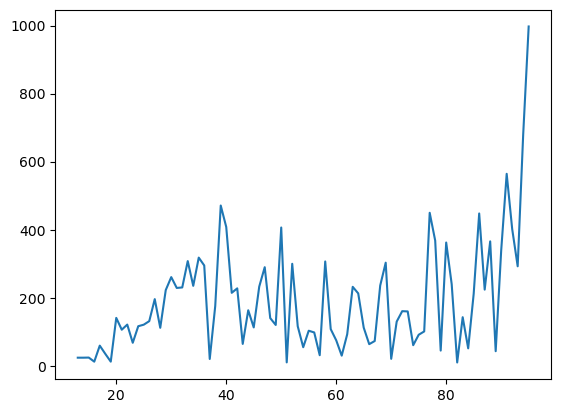

In [177]:
plt.plot(list(g_t.keys())[:83], D)

### Integrating rankings

In [179]:
icu_rankings = pd.read_csv('../data/4icu_rankings.csv')
icu_rankings

Number               Href  \
0         1  /reviews/5728.htm   
1         2  /reviews/5720.htm   
2         3  /reviews/5135.htm   
3         4  /reviews/6077.htm   
4         5  /reviews/5143.htm   
...     ...                ...   
1732     Un  /reviews/5460.htm   
1733     Un  /reviews/5982.htm   
1734     Un  /reviews/6813.htm   
1735     Un  /reviews/6331.htm   
1736     Un  /reviews/6328.htm   

                                                 Name      Location  
0               Massachusetts Institute of Technology     Cambridge  
1                                  Harvard University     Cambridge  
2                                 Stanford University  Stanford ...  
3                                  Cornell University        Ithaca  
4                  University of California, Berkeley  Berkeley ...  
...                                               ...           ...  
1732  Saint Francis Medical Center College of Nursing        Peoria  
1733                   Antioch University New England         Keene  
1734                       Antioch University Seattle       Seattle  
1735                         Ohio University Southern       Ironton  
1736                      Ohio University-Chillicothe   Chillicothe  

[1737 rows x 4 columns]

In [219]:
qs_rankings = pd.read_csv('../data/qs_rankings.csv', skiprows=11)
qs_rankings = qs_rankings.iloc[:-4]
qs_rankings.columns = qs_rankings.iloc[0]
qs_rankings = qs_rankings.iloc[1:]
qs_rankings

0       2024     2023                                Institution  \
1          1      1                           Harvard University   
2          2      2                         University of Oxford   
3          3      3                          Stanford University   
4          4      4                     Johns Hopkins University   
5          5      5                      University of Cambridge   
..       ...      ...                                        ...   
717  701-720      NaN                   The Hashemite University   
718  701-720  601-650  Universidad Industrial de Santander - UIS   
719  701-720      NaN  Universidad Peruana de Ciencias Aplicadas   
720  701-720  651-680                     University of Bradford   
721  701-720      NaN      University of Health Sciences, Lahore   

0          Location Academic Employer Citations      H International Score  
1     United States    100.0    100.0      95.5  100.0         100.0  99.1  
2    United Kingdom     95.6     96.0      97.1   92.5          96.5  95.4  
3     United States     93.1     94.2      95.5   93.5          85.4  93.0  
4     United States     91.2     81.0      94.7   94.2          96.7  92.0  
5    United Kingdom     93.9     95.0      95.5   86.6          80.8  91.6  
..              ...      ...      ...       ...    ...           ...   ...  
717          Jordan     39.5     56.0      64.8   46.3          29.1   NaN  
718        Colombia     48.9     54.1      58.2   39.1          21.4   NaN  
719            Peru     46.2     61.6      58.9   43.6          14.6   NaN  
720  United Kingdom     31.8     50.0      73.1   54.8          31.6   NaN  
721        Pakistan     41.5     60.4      63.1   41.6          27.9   NaN  

[721 rows x 10 columns]

In [81]:
qs_inst = qs_rankings['Institution'].to_list()
qs_inst

['Harvard University',
 'University of Oxford',
 'Stanford University',
 'Johns Hopkins University',
 'University of Cambridge',
 'UCL',
 'Karolinska Institute',
 'Imperial College London',
 'University of California, San Francisco (UCSF)',
 'Yale University',
 'Massachusetts Institute of Technology (MIT) ',
 'University of California, Los Angeles (UCLA)',
 "King's College London",
 'University of Toronto',
 'Columbia University',
 'University of Pennsylvania',
 'Duke University',
 'McGill University',
 'National University of Singapore (NUS)',
 'The University of Melbourne',
 'University of Washington',
 'The University of Edinburgh',
 'University of California, San Diego (UCSD)',
 'London School of Hygiene & Tropical Medicine',
 'University of Michigan-Ann Arbor',
 'The University of Sydney',
 'University of British Columbia',
 'The Chinese University of Hong Kong (CUHK)',
 'University of Amsterdam',
 'The University of Manchester',
 'Cornell University',
 'Ruprecht-Karls-Universität

In [ ]:
import json 
with open('../data/master_map_2.json', 'r') as f:
    master_map = json.load(f)
all_inst = pd.DataFrame({
    'institution': list(master_map.keys())
})
all_inst

In [210]:
from rapidfuzz import fuzz
from tqdm import tqdm
matches = 0
non_matches = 0
all_keys = list(master_map.keys())
threshold = 75
not_in_b_list = qs_inst
not_matched = []
match_dict = {}
for i in tqdm(not_in_b_list):
    best_match = None
    best_score = 0
    for key in all_keys:
        # avg_ratio = sum(fuzz.token_ratio(i, val) for val in master_map[key]) / len(master_map[key])
        avg_ratio = fuzz.ratio(i, key)
        if avg_ratio > best_score:
            best_score = avg_ratio
            best_match = key
    if best_score > threshold:
        match_dict[best_match] = i
        matches += 1
    else:
        not_matched.append(i)
        non_matches += 1

100%|██████████| 721/721 [00:01<00:00, 463.70it/s]


In [12]:
match_dict

{'Harvard University': 'Harvard University',
 'University of Oxford': 'University of Oxford',
 'Stanford University': 'Stanford University',
 'Johns Hopkins University': 'Johns Hopkins University',
 'University of Cambridge': 'University of Cambridge',
 'UCL': 'UCL',
 'Karolinska Institute': 'Karolinska Institute',
 'Imperial College London': 'Imperial College London',
 'University of California, San Francisco': 'University of California, San Francisco (UCSF)',
 'Yale University': 'Yale University',
 'Massachusetts Institute of Technology': 'Massachusetts Institute of Technology (MIT) ',
 'University of California at Los Angeles': 'University of California, Los Angeles (UCLA)',
 'Kings College London': "King's College London",
 'University of Toronto': 'University of Porto',
 'Columbia University': 'Columbia University',
 'University of Pennsylvania': 'University of Pennsylvania',
 'Duke University': 'Duke University',
 'McGill University': 'McGill University',
 'National University of

In [17]:
match_dict = {'Harvard University': 'Harvard University',
 'University of Oxford': 'University of Oxford',
 'Stanford University': 'Stanford University',
 #'Johns Hopkins University': 'Johns Hopkins University',
 'University of Cambridge': 'University of Cambridge',
 'UCL': 'UCL',
 'Karolinska Institute': 'Karolinska Institute',
 'Imperial College London': 'Imperial College London',
 'University of California, San Francisco': 'University of California, San Francisco (UCSF)',
 'Yale University': 'Yale University',
 'Massachusetts Institute of Technology': 'Massachusetts Institute of Technology (MIT) ',
 'University of California at Los Angeles': 'University of California, Los Angeles (UCLA)',
 'Kings College London': "King's College London",
 'University of Toronto': 'University of Porto',
 'Columbia University': 'Columbia University',
 'University of Pennsylvania': 'University of Pennsylvania',
 'Duke University': 'Duke University',
 'McGill University': 'McGill University',
 'National University of Singapore': 'National University of Singapore (NUS)',
 'The University of Melbourne': 'The University of Melbourne',
 'University of Washington': 'University of Washington',
 'University of Edinburgh': 'The University of Edinburgh',
 'University of California, San Diego': 'University of California, San Diego (UCSD)',
 'London School of Hygiene & Tropical Medicine': 'London School of Hygiene & Tropical Medicine',
 'University of Michigan': 'University of Michigan-Ann Arbor',
 'The University of Sydney': 'The University of Sydney',
 'University of British Columbia': 'University of British Columbia',
 'University of Amsterdam': 'University of Amsterdam',
 'University of Manchester': 'The University of Manchester',
 'Cornell University': 'Cornell University',
 'New York University': 'New York University (NYU)',
 'Ludwig Maximilian University of Munich': 'Ludwig-Maximilians-Universität München',
 'Sorbonne University': 'Sorbonne University',
 'Erasmus University Rotterdam Faculty of Medicine': 'Erasmus University Rotterdam ',
 #'Baylor College of Medicine': 'Baylor College of Medicine',
 'Washington University in St. Louis': 'Washington University in St. Louis',
 'University of North Carolina at Chapel Hill': 'University of North Carolina, Chapel Hill',
 'University of Glasgow': 'University of Glasgow',
 'Northwestern University': 'Northwestern University',
 'University of Copenhagen': 'University of Copenhagen',
 'University of São Paulo': 'Universidade de São Paulo',
 'University of New South Wales': 'The University of New South Wales (UNSW Sydney)',
 'University of Zurich': 'University of Zurich',
 'Boston University': 'Aston University',
 'Queen Mary University of London': 'Queen Mary University of London',
 'Utrecht University': 'Utrecht University',
 'University of Pittsburgh': 'University of Pittsburgh',
 'Leiden University': 'Leiden University',
 'Tsinghua University': 'Tsinghua University',
 'The University of Queensland': 'The University of Queensland',
 'University of Bristol': 'University of Brighton',
 'University of Birmingham': 'University of Birmingham',
 'Medical University of Lublin': 'Technical University of Munich',
 'University of Liverpool': 'University of Liverpool',
 'Vanderbilt University': 'Vanderbilt University',
 'Yonsei University': 'Yonsei University',
 'Maastricht University': 'Maastricht University ',
 'Charité Universitätsmedizin Berlin': 'Charité - Universitätsmedizin Berlin',
 'University of Southampton': 'University of Southampton',
 'Newcastle University': 'Newcastle University',
 'Xian Jiaotong University': 'Xi’an Jiaotong University',
 'University of Groningen': 'University of Groningen',
 'Université de Montréal': 'Université de Montréal ',
 'University of Alberta': 'University of Alberta',
 'Lund University': 'Lund University',
 'University of Cape Town': 'University of Cape Town',
 'University of Nottingham': 'University of Nottingham',
 'Sapienza University of Rome': 'Sapienza University of Rome',
 #'Icahn School of Medicine at Mount Sinai': 'Icahn School of Medicine at Mount Sinai',
 'Uppsala University': 'Uppsala University',
 'Zhengzhou University': 'Zhengzhou University',
 'Vrije Universiteit Brussel': 'Vrije Universiteit Brussel (VUB)',
 'Case Western Reserve University': 'Case Western Reserve University',
 'The Ohio State University': 'The Ohio State University',
 'Radboud University': 'Radboud University ',
 'University of Minnesota': 'University of Minnesota Twin Cities',
 'The University of Texas Southwestern Medical Center': 'The University of Texas Southwestern Medical Center at Dallas',
 'University of Geneva': 'University of Geneva',
 'Universidad Nacional Autónoma de México': 'Universidad Nacional Autónoma de México (UNAM)',
 'University of Helsinki': 'University of Helsinki',
 'University of Sheffield': 'The University of Sheffield',
 'University of Basel': 'University of Basel',
 'University of Southern California': 'University of Southern California',
 'University of Auckland': 'The University of Auckland',
 'The University of Wisconsin-Madison': 'University of Wisconsin-Madison',
 'The Pennsylvania State University': 'Pennsylvania State University',
 'University of Ottawa': 'University of Ottawa',
 'University of California, Davis': 'University of California, Davis',
 'University of Hamburg': 'Universität Hamburg',
 'All India Institute of Medical Sciences': 'All India Institute of Medical Sciences, New Delhi',
 'Eberhard Karls University': 'Eberhard Karls Universität Tübingen',
 'King Abdulaziz University': 'King Abdulaziz University (KAU)',
 'Tokyo Medical and Dental University': 'Tokyo Medical and Dental University (TMDU)',
 'The University of Adelaide': 'The University of Adelaide',
 'Mahidol University': 'Mahidol University',
 'University of Western Australia': 'The University of Western Australia',
 'American University of Beirut': 'American University of Beirut (AUB)',
 'The University of Illinois at Chicago': 'University of Illinois at Urbana-Champaign',
 'University of Florida': 'University of Florida',
 'University of Miami': 'University of Miami',
 'Universidad de Chile': 'Universidad Austral de Chile',
 'University of Cologne': 'University of Cologne',
 'Universidad Autónoma de Guadalajara': 'Universidad de Guadalajara (UDG)',
 'University of Otago': 'University of Otago',
 'Cardiff University': 'Cardiff University',
 'Aarhus University': 'Aarhus University',
 'University of Lausanne': 'University of Lausanne',
 'Sun Yat-sen University': 'Sun Yat-sen University',
 'Tufts University': 'Tufts University',
 'Université Libre de Bruxelles': 'Universite libre de Bruxelles',
 'Universidade Estadual de Campinas': 'Universidade Estadual de Campinas (Unicamp)',
 'University of California at Irvine': 'University of California, Irvine',
 'Rockefeller University': 'Rockefeller University',
 'University of Gottingen': 'University of Göttingen',
 'Ohio University': 'Ohio University',
 'Peking Union Medical College': 'Peking Union Medical School',
 'University College Dublin': 'University College Dublin',
 'Charles University': 'Charles University',
 "Queen's University Belfast": "Queen's University Belfast",
 'University of Aberdeen': 'University of Aberdeen',
 'University of Dundee': ' University of Dundee',
 'Cairo University': 'Cairo University',
 'George Washington University': 'George Washington University',
 'Georgetown University': 'Georgetown University',
 'Sungkyunkwan University': 'Sungkyunkwan University(SKKU)',
 'University of Cattolica del Sacro Cuore': 'Università\xa0Cattolica del Sacro Cuore',
 'Rheinische Friedrich-Wilhelms-Universität Bonn': 'Rheinische Friedrich-Wilhelms-Universität Bonn',
 'The University of Texas Health Science Center at Houston': 'The University of Texas Health Science Center at Houston',
 'Université Claude Bernard Lyon': 'Université Claude Bernard Lyon 1',
 'Taipei Medical University': 'Taipei Medical University (TMU)',
 'University of Alabama at Birmingham': 'University of Alabama, Birmingham',
 'Texas A&M University': 'Texas A&M University',
 'National and Kapodistrian University of Athens School of Medicine': 'National and Kapodistrian University of Athens',
 'RWTH Aachen University': 'RWTH Aachen University',
 'Umeå University': 'Umea University',
 'University of Bordeaux': 'University of Bordeaux',
 'University of Virginia': 'University of Virginia',
 'University of South Florida': 'University of South Florida',
 'Aga Khan University': 'Aga Khan University',
 'Aix Marseille University': 'Aix-Marseille University',
 'Dalhousie University': 'Dalhousie University',
 'Goethe University Frankfurt Medical Faculty': 'Goethe-University Frankfurt am Main',
 'Hacettepe University': 'Hacettepe University ',
 'Korea Advanced Institute of Science and Technology': 'KAIST - Korea Advanced Institute of Science & Technology',
 'Rush University': 'Rush University',
 'Lomonosov Moscow State University': 'Lomonosov Moscow State University',
 'Oregon Health & Science University': 'Oregon Health & Science University (OHSU)',
 "Queen's University at Kingston": "Queen's University at Kingston",
 'Semmelweis University': 'Semmelweis University',
 'Stellenbosch University': 'Stellenbosch University',
 'Tecnologico de Monterrey': 'Tecnológico de Monterrey',
 'Tel Aviv University': 'Tel Aviv University',
 'The London School of Economics and Political Science': 'The London School of Economics and Political Science (LSE)',
 'The University of Arizona': 'The University of Arizona',
 'Universidad Peruana Cayetano Heredia': 'Universidad Peruana Cayetano Heredia (UPCH)',
 'University of Indonesia': 'Universitas Indonesia',
 'University of Leipzig': 'Universität Leipzig',
 'University Laval': 'Université Laval',
 'University College Cork': 'University College Cork',
 'University of Antwerp': 'University of Antwerp',
 'University of Iowa': 'University of Iowa',
 'University of Leicester': 'University of Leicester',
 'University of Lisbon': 'University of Lisbon ',
 'University of Navarra': 'University of Navarra',
 'University of Rochester': 'University of Rochester',
 'University of the Witwatersrand': 'University of Witwatersrand',
 'Ain Shams University': 'Ain Shams University ',
 'Alexandria University': 'Alexandria University ',
 'Chiang Mai University': 'Chiang Mai University',
 'Dartmouth College': 'Dartmouth College',
 'Istanbul University': 'Istanbul University Cerrahpasa',
 'Jilin University': 'Jilin University',
 'Julius-Maximilians-Universität Würzburg': 'Julius-Maximilians-Universität Würzburg',
 'Macquarie University': 'Macquarie University',
 'Medical University of Innsbruck': 'Medizinische Universität Innsbruck',
 'Santos University': 'Sultan Qaboos University',
 'the hebrew university of jerusalem': 'The Hebrew University of Jerusalem',
 'Tulane University': 'Tulane University',
 'Universidad de Antioquia': 'Universidad de Antioquia',
 'Universidad de Sevilla': 'Universidad de Sevilla',
 'Universidade Federal do Rio Grande do Norte': 'Universidade Federal do Rio Grande Do Sul ',
 'Universita San Raffaele': 'Università Vita-Salute San Raffaele',
 'Université de Montpellier': 'Université de Montpellier',
 'University of Strasbourg': 'Université de Strasbourg',
 'University of Grenoble': 'Université Grenoble Alpes',
 'University of Cincinnati': 'University of Cincinnati',
 'University of Coimbra': 'University of Coimbra',
 'University of Colorado Denver': 'University of Colorado, Denver ',
 'University of Jordan': 'University of Jordan',
 'University of Manitoba': 'University of Manitoba',
 'University of Baltimore': 'University of Maryland, Baltimore',
 'University of Maryland': 'University of Maryland, College Park',
 'University of Pisa': 'University of Pisa',
 'University of Rome Tor Vergata': 'University of Rome "Tor Vergata"',
 'University of Utah': 'University of Utah',
 'Virginia Commonwealth University': 'Virginia Commonwealth University',
 'Westfaelische Wilhelms-Universität Münster': 'Westfälische Wilhelms-Universität Münster ',
 'Airlangga University': 'Airlangga University',
 'Aristotle University of Thessaloniki': 'Aristotle University of Thessaloniki',
 'Arizona State University': 'Arizona State University',
 'Central State University': 'Central South University',
 'Flinders University': 'Flinders University',
 'Florida International University': 'Florida International University',
 'Nanjing Medical University': 'Nanjing Medical University',
 'Philipps University of Marburg': 'Philipps-Universität Marburg ',
 'Post Graduate Institute of Medical Education & Research': 'Postgraduate Institute of Medical Education & Research Chandigarh',
 'Purdue University': 'Purdue University',
 'Temple University': 'Temple University',
 'Technion - Israel Institute of Technology': 'Technion - Israel Institute of Technology',
 'Universidad de Los Andes': 'Universidad de los Andes - Chile',
 'Universidad Nacional de Córdoba': 'Universidad Nacional de Córdoba - UNC',
 'University of Duisburg Essen': 'Universität Duisburg-Essen',
 'Université de Lille': 'Université de Lille',
 'University of Duesseldorf': 'University Duesseldorf',
 'University of Delhi': 'University of Delhi',
 'University of Granada': 'University of Granada',
 'University of Kansas': 'University of Kansas',
 'University of South Carolina': 'University of South Carolina',
 'University of Khartoum': 'University of Khartoum',
 'University of the Philippines': 'University of the Philippines',
 'University of Tsukuba': 'University of Tsukuba',
 'University of Ulm': 'University Ulm',
 'Wake Forest University': 'Wake Forest University',
 'Ankara University': 'Ankara Üniversitesi',
 'Drexel University': 'Drexel University',
 'Hofstra University': 'Hofstra University',
 'Khon Kaen University': 'Khon Kaen University',
 'Lebanese University': 'Lebanese University',
 'Medical College of Wisconsin': 'Medical College of Wisconsin',
 'Ruhr University Bochum': 'Ruhr-Universität Bochum',
 'St. Petersburg State Medical University': 'Saint Petersburg State University',
 'St. George’s University': "St. George's, University of London",
 'Catholic University of Korea': 'The Catholic University of Korea ',
 'The University of Georgia': 'The University of Georgia',
 'Thomas Jefferson University': 'Thomas Jefferson University',
 'University at Buffalo': 'University at Buffalo SUNY',
 'University of Belgrade': 'University of Belgrade',
 'University of Connecticut': 'University of Connecticut',
 'University of Debrecen': 'University of Debrecen',
 'University of Genoa': 'University of Genoa',
 'University of Ibadan': 'University of Ibadan',
 'University of Mississippi': 'University of Mississippi',
 'University of Pretoria': 'University of Pretoria',
 'University of Sharjah': 'University of Sharjah',
 'University of St Andrews': 'University of St Andrews',
 'University of Ulsan': 'University of Ulsan ',
 'Weizmann Institute of Science': 'Weizmann Institute of Science',
 'colorado state university': 'Colorado State University',
 'Marmara University': 'Marmara University',
 'Medical University of Warsaw': 'Medical University of Warsaw',
 'Simon Fraser University': 'Simon Fraser University',
 'St. Louis University': 'St. Louis University',
 'The Scripps Research Institute': 'The Scripps Research Institute (TSRI)',
 'Universidad Autónoma de Nuevo León': 'Universidad Autónoma de Nuevo León',
 'University of Santiago de Compostela': 'Universidade de Santiago de Compostela',
 'University Sherbrooke': 'Université de Sherbrooke',
 'University of Ghana': 'University of Ghana',
 'University of Kentucky': 'University of Kentucky',
 'University of Messina': 'University of Messina (UniME)',
 'University of Missouri': 'University of Missouri, Kansas City',
 'University of Pécs': 'University of Pecs',
 'University of Palermo': 'University of Palermo',
 'University of Saskatchewan': 'University of Saskatchewan',
 'University of Zagreb': 'University of Zagreb',
 'Virginia Polytechnic Institute and State University': 'Virginia Polytechnic Institute and State University',
 'Waseda University': 'Waseda University',
 'Yeshiva University': 'Yeshiva University',
 'Al Azhar University': 'Al-Azhar University',
 'Banaras Hindu University': 'Banaras Hindu University',
 'Ben-Gurion University of the Negev': 'Ben-Gurion University of The Negev',
 'Florida State University': 'Florida State University',
 'Mashhad University of Medical Sciences': 'Mashhad University of Medical Sciences',
 'Southeastern University': 'Southeast University',
 'Taylor University': "Taylor's University",
 'Universidad Autónoma de Ciudad Juarez': 'Universidad Autónoma de Chile',
 'University of Concepcion': 'Universidad de Concepción',
 'Universidad de la República': 'Universidad de la República (Udelar)',
 'Universidad Nacional de La Plata': 'Universidad Nacional de La Plata (UNLP)',
 'universidade federal do estado do rio de janeiro': 'Universidade do Estado do Rio de Janeiro (UERJ)',
 'University of Bari': 'University of Bari',
 'University of California, Santa Barbara': 'University of California, Santa Barbara (UCSB)',
 'University of Houston': 'University of Houston',
 'University of Natal': 'University of Kwazulu-Natal',
 'University of Ljubljana': 'University of Ljubljana',
 'University of New Mexico': 'University of New Mexico',
 'The University of the Basque Country': 'University of the Basque Country',
 'University of Vermont': 'University of Vermont',
 'Victoria University of Wellington': 'Victoria University of Wellington',
 'Washington State University': 'Washington State University',
 'Wayne State University': 'Wayne State University',
 'York University': 'York University',
 'Anglia Ruskin University': 'Anglia Ruskin University',
 'Hashemite University': 'The Hashemite University',
 'Howard University': 'Howard University',
 'Iran University of Medical Sciences': 'Iran University of Medical Sciences (IUMS)',
 'Kanazawa University': 'Kanazawa University',
 'John Moores University': 'Liverpool John Moores University',
 'Medical University of Sofia': 'Medical University Sofia',
 'Okayama University': 'Okayama University',
 'Palacký University': 'Palacký University Olomouc',
 'Rutgers University': 'Rutgers University–Newark',
 'Shiraz University of Medical Sciences': 'Shiraz University of Medical Sciences',
 'The University of Alabama': 'The University of Alabama',
 'Universidad Central de Venezuela': 'Universidad Central de Venezuela',
 'Universidad del Valle': 'Universidad del Valle',
 'Universidad Nacional Mayor de San Marcos': 'Universidad Nacional Mayor de San Marcos',
 'Universidade Federal de Santa Catarina': 'Universidade Federal de Santa Catarina ',
 'University of Regensburg': 'Universität Regensburg',
 'University of Guelph': 'University of Guelph',
 'University of Nairobi': 'University of Nairobi',
 'University of Patras': 'University of Patras',
 'Alfaisal University': 'Alfaisal University',
 'Dow University of Health Sciences': 'Dow University of Health Sciences',
 'Indiana University - Purdue University Indianapolis': 'Indiana University–Purdue University Indianapolis',
 'International Medical University': 'International Medical University',
 'Medical University of Gdansk': 'Medical University of Gdansk',
 'niigata university': 'Niigata University',
 'Northumbria University': 'Northumbria University at Newcastle',
 'Tabriz University of Medical Sciences': 'Tabriz University of Medical Sciences',
 'Universidad de Costa Rica': 'Universidad de Costa Rica',
 'Universidad de Zaragoza': 'Universidad de Zaragoza',
 'Baghdad University': 'University of Baghdad',
 'University of California at Riverside': 'University of California, Riverside',
 'University of Central Florida': 'University of Central Florida',
 'University of Hawaii': 'University of Hawaiʻi at Mānoa',
 'University of Iceland': 'University of Iceland',
 'University of Louisville': 'University of Louisville',
 'University of Tehran': 'University of Tehran',
 'University of Punjab': 'University of the Punjab',
 'University of Victoria': 'University of Victoria (UVic)',
 'Addis Ababa University': 'Addis Ababa University',
 'Beirut Arab University': 'Beirut Arab University ',
 'Dokuz Eylul University': 'Dokuz Eylül Üniversitesi',
 'Novosibirsk State University': 'Novosibirsk State University',
 'UCSI University': 'UCSI University',
 'Umm Al-Qura University': 'Umm Al-Qura University ',
 'Universidad Autónoma Metropolitana': 'Universidad Autónoma Metropolitana (UAM)',
 'Universidad de Córdoba': 'Universidad de Córdoba - España',
 'Universidad de Santander': 'Universidad de Santander - UDES',
 'Universidad Nacional de Rosario': 'Universidad Nacional de Rosario (UNR)',
 'University of Delaware': 'University of Delaware',
 'University of Ioannina': 'University of Ioannina',
 'University of New England': 'University of New England Australia',
 'West Virginia University': 'West Virginia University',
 'East Carolina University': 'East Carolina University',
 'Kazan State Medical University': 'Kazan State Medical University',
 'Nova Southeastern University': 'Nova Southeastern University',
 'Suez Canal University': 'Suez Canal University',
 'Universidad CES': 'Universidad CES',
 'Universidad San Francisco de Quito': 'Universidad San Francisco de Quito (USFQ)',
 'University of Kent': 'University of Kent',
 'University of Lagos': 'University of Lagos',
 'University of Nevada, Reno': 'University of Nevada - Reno',
 'University of Nigeria': 'University of Nigeria Nsukka',
 'University of Toledo': 'University of Toledo',
 'University of Zimbabwe': 'University of Zimbabwe',
 'American University': 'Ajman University',
 'Kwame Nkrumah University of Science and Technology': 'Kwame Nkrumah University of Science and Technology',
 'Lebanese American University': 'Lebanese American University',
 'Universidad Peruana de Ciencias Aplicadas': 'Universidad Peruana de Ciencias Aplicadas'}

In [223]:
all_inst['matched_institution'] = all_inst['institution'].apply(lambda x: match_dict.get(x, None))
filtered_all_inst = all_inst[all_inst['matched_institution'].notnull()]


In [ ]:
# icu_rankings['Rank'] = range(1, len(icu_rankings) + 1)
# icu_rankings

Number               Href  \
0         1  /reviews/5728.htm   
1         2  /reviews/5720.htm   
2         3  /reviews/5135.htm   
3         4  /reviews/6077.htm   
4         5  /reviews/5143.htm   
...     ...                ...   
1732     Un  /reviews/5460.htm   
1733     Un  /reviews/5982.htm   
1734     Un  /reviews/6813.htm   
1735     Un  /reviews/6331.htm   
1736     Un  /reviews/6328.htm   

                                                 Name      Location  Rank  
0               Massachusetts Institute of Technology     Cambridge     1  
1                                  Harvard University     Cambridge     2  
2                                 Stanford University  Stanford ...     3  
3                                  Cornell University        Ithaca     4  
4                  University of California, Berkeley  Berkeley ...     5  
...                                               ...           ...   ...  
1732  Saint Francis Medical Center College of Nursing        Peoria  1733  
1733                   Antioch University New England         Keene  1734  
1734                       Antioch University Seattle       Seattle  1735  
1735                         Ohio University Southern       Ironton  1736  
1736                      Ohio University-Chillicothe   Chillicothe  1737  

[1737 rows x 5 columns]

In [18]:
import json 
with open('../data/master_map_2.json', 'r') as f:
    master_map = json.load(f)
all_inst = pd.DataFrame({
    'institution': list(master_map.keys())
})
all_inst
all_inst['matched_institution'] = all_inst['institution'].apply(lambda x: match_dict.get(x, None))

qs_rankings = pd.read_csv('../data/qs_rankings.csv', skiprows=11)
qs_rankings = qs_rankings.iloc[:-4]
qs_rankings.columns = qs_rankings.iloc[0]
qs_rankings = qs_rankings.iloc[1:]
qs_rankings

qs_rankings['Rank'] = range(1, len(qs_rankings) + 1)
qs_rankings_combined = qs_rankings.merge(all_inst, left_on='Institution', right_on='institution', how='left')
qs_rankings_combined = qs_rankings_combined.dropna(subset=['matched_institution'])
qs_rankings_combined = qs_rankings_combined[qs_rankings_combined['Location'] == 'United States']


Degree centrality

In [116]:
import networkx as nx
tdf_all_filtered = tdf_all[tdf_all['specialty'] == 'card'].copy()
tdf_all_filtered = tdf_all_filtered[(tdf_all_filtered['transition']=='md-residency') | (tdf_all_filtered['transition']=='residency-residency') | (tdf_all_filtered['transition']=='residency-fellowship')]
g_agg = temporal_network_from_data(
    data = tdf_all_filtered,
    aggregation="all",
    #interval_size=20,
    directed=True
)
# g_agg = g_agg[40]
g_agg

In [316]:
g_agg.number_of_nodes()

5083

In [78]:
nx.density(g_agg)

0.004010657273430272

In [117]:
qs_rankings_combined['degree'] = qs_rankings_combined['institution'].apply(lambda x: g_agg.degree[x] if x in g_agg else None)
qs_rankings_combined['degree_rank'] = qs_rankings_combined['degree'].rank(ascending=False, method='min')
qs_rankings_combined['eigenvector_centrality'] = qs_rankings_combined['institution'].apply(lambda x: nx.eigenvector_centrality_numpy(g_agg, weight='weight').get(x, None))
qs_rankings_combined['eigenvector_centrality_rank'] = qs_rankings_combined['eigenvector_centrality'].rank(ascending=False, method='min')

Text(0, 0.5, 'Eigenvector Centrality')

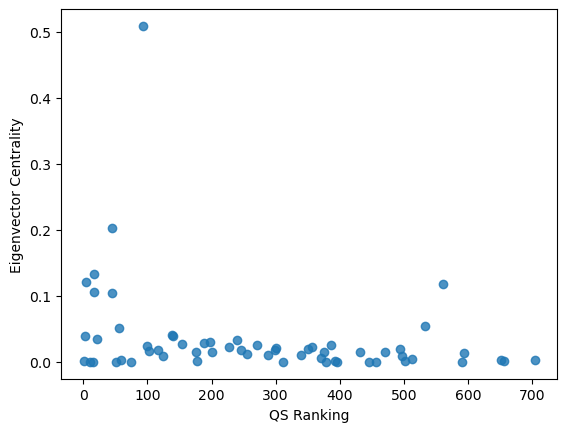

In [118]:
import matplotlib.pyplot as plt
plt.scatter(qs_rankings_combined['Rank'], qs_rankings_combined['eigenvector_centrality'], alpha=0.8)
plt.xlabel('QS Ranking')
plt.ylabel('Eigenvector Centrality')

Text(0, 0.5, 'Eigenvector Centrality')

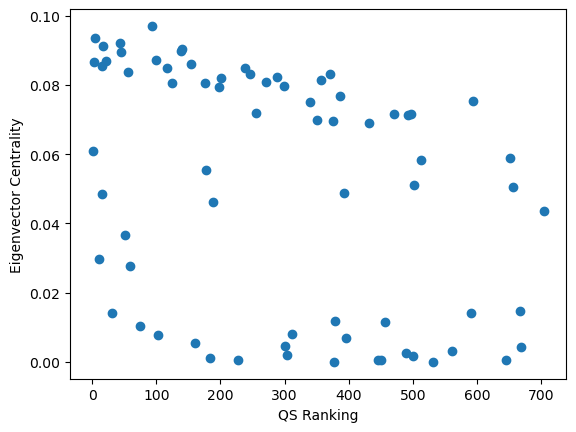

In [300]:
plt.scatter(qs_rankings_combined['Rank'], qs_rankings_combined['eigenvector_centrality'])
plt.xlabel('QS Ranking')
plt.ylabel('Eigenvector Centrality')

In [21]:
institutions = qs_rankings_combined['institution'].tolist()
degrees = qs_rankings_combined['eigenvector_centrality'].tolist()
ec_dict = dict(zip(institutions, degrees))
ec_dict = dict(sorted(ec_dict.items(), key=lambda item: item[1]))
ec_dict

{'The University of Alabama': 3.260870463918876e-19,
 'The University of Georgia': 7.468902546958782e-18,
 'St. Louis University': 1.2778510617861023e-10,
 'University of California, Davis': 1.0818538974841664e-05,
 'Virginia Polytechnic Institute and State University': 0.0004144922488399147,
 'University of Delaware': 0.0004713414841782216,
 'Yeshiva University': 0.0005040069939443705,
 'The University of Arizona': 0.0005134506709783008,
 'The University of Texas Health Science Center at Houston': 0.0010898721848475591,
 'Washington State University': 0.0015409788805160717,
 'Arizona State University': 0.0018792224142962107,
 'University of Houston': 0.00255369268186529,
 'Hofstra University': 0.0031613748706271674,
 'Virginia Commonwealth University': 0.004672284753151056,
 'University of South Carolina': 0.006677248960685405,
 'Florida International University': 0.007796062762661959,
 'Purdue University': nan,
 'Ohio University': 0.004086193479431642,
 'Rockefeller University': 0.00

In [19]:
"""
New version developed by Nicolò Ruggeri, Max Planck Institute for Intelligent Systems, Tuebingen, Germany, March-2020
It forces to use sparse matrices when possible, results in much more efficent implementation, especially for large matrices
"""

import warnings

import scipy.sparse

def SpringRank(A, alpha=0., l0=1., l1=1., solver='bicgstab', verbose=False, force_dense=False):
    """
        Main routine to calculate SpringRank by a solving linear system.

        Parameters
        ----------
        A : numpy.ndarray or scipy.sparse.spmatrix
            Has tobe  2 dimensional and with same dimensions.
        alpha, l0, l1: float
            Defined as in the SpringRank paper
            https://arxiv.org/abs/1709.09002
        solver: str
            One between 'spsolve' (direct, slower) and 'bicgstab' (iterative, faster).
            The solver to be used for the linear system returning the ranks.
        verbose: bool
        force_dense: bool
            By default A is converted to a sparse matrix scipy.sparse.csr, if it is not already sparse.
            If force_dense is set to True and a dense ndarray A is input, then it is not converted to sparse.

        Returns
        -------
        rank
            numpy.ndarray of ranks. Indices represent the nodes' indices used in the matrix A.

    """

    # check if input is sparse or can be converted to sparse.
    use_sparse = True
    if force_dense and not scipy.sparse.issparse(A):
        try:
            A = scipy.sparse.csr_matrix(A)
        except:
            warnings.warn('The input parameter A could not be converted to scipy.sparse.csr_matrix. '
                          'Using a dense representation.')
            use_sparse = False
    elif force_dense:
        use_sparse = False

    # build array to feed linear system solver
    if use_sparse:
        A, B = build_from_sparse(A, alpha, l0, l1)
    else:
        A, B = build_from_dense(A, alpha, l0, l1)

    rank = solve_linear_system(A, B, solver, verbose)

    return rank

import networkx as nx
import numpy as np
from scipy.optimize import brentq

def build_graph_from_adjacency(inadjacency):
    """
    Takes an adjacency_list like: "23 41 18" or 18 times  "23 41 1"   (edge from 23 --> 41)
    possibly having multiple edges and build a graph with no multiple edges but weigths representing how many of them there are
    Necessary in case of using algorithms that do not accept MultiGraphs. E.g. eigenvector centrality.    
    """
    
    adjacency_list=open(inadjacency,'r')
    edges={}
    for row in adjacency_list:
        a=row.split()
        e=(a[0],a[1])
        w=int(a[2])
        if(e not in edges):edges[e]=w
        else:edges[e]+=w
    G=nx.DiGraph()
    for e in edges: G.add_edge(e[0],e[1],weight=edges[e])
    adjacency_list.close()

    return G


def shift_rank(ranks):
    '''
    Shifts all scores so that the minimum is in zero and the others are all positive
    '''
    min_r=min(ranks)
    N=len(ranks)
    for i in range(N): ranks[i]=ranks[i]-min_r
    return ranks    

def btl(A,tol):
    N = np.shape(A)[0]
    g = np.random.rand(N)
    wins = np.array(np.sum(A,axis=1)).flatten();
    matches = np.array(A+np.transpose(A));
    totalMatches = np.array(np.sum(matches,axis=0)).flatten()
    g_prev = np.random.rand(N)
    eps = 1e-6
    while np.linalg.norm(g-g_prev) > tol:
        g_prev = g
        for i in range(N):
            if totalMatches[i]>0:
                q = np.divide(matches[i,:],g_prev[i]+g_prev)
                q[i] = 0
                g[i] = (wins[i]+eps)/np.sum(q)
            else:
                g[i] = 0
        g = g/np.sum(g)
    return np.log(g)

def eqs39(beta,s,A):
    N = np.shape(A)[0]
    x = 0
    for i in range(N):
        for j in range(N):
            if A[i,j] == 0:
                continue
            else:
                x += (s[i]-s[j]) * ( A[i,j] - (A[i,j]+A[j,i]) / (1+np.exp(-2*beta*(s[i]-s[j]))) )
    return x

def get_optimal_temperature(ranks,A):    
    return brentq(eqs39,0.01,20,args=(ranks,A))

import warnings
import numpy as np
import scipy.sparse
import scipy.sparse.linalg
import sparse


def build_from_dense(A, alpha, l0, l1):
    """
    Given as input a 2d numpy array, build the matrices A and B to feed to the linear system solver for SpringRank.
    """
    n = A.shape[0]
    k_in = np.sum(A, 0)
    k_out = np.sum(A, 1)

    D1 = k_in + k_out           # to be seen as diagonal matrix, stored as 1d array
    D2 = l1 * (k_out - k_in)    # to be seen as diagonal matrix, stored as 1d array

    if alpha != 0.:
        B = np.ones(n) * (alpha * l0) + D2
        A = - (A + A.T)
        A[np.arange(n), np.arange(n)] = alpha + D1 + np.diagonal(A)
    else:
        last_row_plus_col = (A[n - 1, :] + A[:, n - 1]).reshape((1, n))
        A = A + A.T
        A += last_row_plus_col

        A[np.arange(n), np.arange(n)] = A.diagonal() + D1
        D3 = np.ones(n) * (l1 * (k_out[n - 1] - k_in[n - 1]))  # to be seen as diagonal matrix, stored as 1d array
        B = D2 + D3

    return scipy.sparse.csr_matrix(A), B


def build_from_sparse(A, alpha, l0, l1):
    """
    Given as input a sparse 2d scipy array, build the matrices A and B to feed to the linear system solver for
    SpringRank.
    """
    n = A.shape[0]
    k_in = np.sum(A, 0).A1      # convert matrix of shape (1, n) into 1-dimensional array
    k_out = np.sum(A, 1).A1     # same with (n, 1) matrix

    D1 = k_in + k_out           # to be seen as diagonal matrix, stored as 1d array
    D2 = l1 * (k_out - k_in)    # to be seen as diagonal matrix, stored as 1d array

    if alpha != 0.:
        B = np.ones(n) * (alpha * l0) + D2
        A = - (A + A.T)
        # convert to lil matrix for more efficient computations
        A = A.tolil(copy=False)
        A.setdiag(alpha + D1 + A.diagonal())
    else:
        last_row_plus_col = sparse.COO.from_scipy_sparse(A[n - 1, :] + A[:, n - 1].T)   # create sparse 1d COO array
        A = A + A.T
        A += last_row_plus_col                                                          # broadcast on rows
        A = -A.tocsr()                                                                  # reconvert to csr scipy matrix

        # Notice that a scipy.sparse.SparseEfficiencyWarning will be raised by calling A.setdiag().
        # However converting to lil matrix with
        # A.tolil(copy=False)
        # is not computationally convenient. Just suppress the warning during the call of A.setdiag(...)
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", scipy.sparse.SparseEfficiencyWarning)
            A.setdiag(A.diagonal() + D1)

        D3 = np.ones(n) * (l1 * (k_out[n-1] - k_in[n-1]))    # to be seen as diagonal matrix, stored as 1d array
        B = D2 + D3

    return A, B


def solve_linear_system(A, B, solver, verbose):
    if solver not in ['spsolve', 'bicgstab']:
        warnings.warn('Unknown parameter {solver} for argument solver. Setting solver = "bicgstab"'.format(solver=solver))
        solver = 'bicgstab'

    if verbose:
        print('Using scipy.sparse.linalg.{solver}(A,B)'.format(solver=solver))

    if solver == 'spsolve':
        sol = scipy.sparse.linalg.spsolve(A, B)
    elif solver == 'bicgstab':
        sol = scipy.sparse.linalg.bicgstab(A, B)[0]

    return sol.reshape((-1,))



In [20]:
import numpy as np
from scipy.sparse import spdiags, csr_matrix, eye
from scipy.optimize import brentq
import scipy.sparse.linalg
import warnings
from scipy.sparse import SparseEfficiencyWarning

warnings.simplefilter('ignore', SparseEfficiencyWarning)

class SpringRank_sparse:
    """
    A class implementation of the SpringRank algorithm for computing hierarchical rankings
    from directed networks.
    
    Parameters
    ----------
    alpha : float, default=0
        Regularization parameter. If 0, uses Lagrange multiplier approach.
        If > 0, performs L2 regularization.
        
    Attributes
    ----------
    ranks_ : array-like of shape (n_nodes,)
        The computed ranks for each node after fitting
    is_fitted_ranks_ : bool
        Whether the model has been fitted
    """
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.ranks = None
        self.is_fitted_ranks_ = False
        self.beta = None
        self.is_fitted_beta_ = False
        self.A = None

    def fit(self, A):
        """
        Compute the SpringRank solution for the input adjacency matrix.
        
        Parameters
        ----------
        A : array-like or sparse matrix of shape (n_nodes, n_nodes)
            The adjacency matrix of the directed network
            
        Returns
        -------
        self : object
            Returns the instance itself.
        """
        # Validation of A
        if not (A.shape[0] == A.shape[1]):
            raise ValueError("Adjacency matrix must be square")
        if scipy.sparse.issparse(A):
            neg_entries = A.data < 0
        else:
            neg_entries = A < 0
        if neg_entries.any():
            raise ValueError("Adjacency matrix cannot contain negative entries")

        self.A = A

        if self.alpha == 0:
            self.ranks = self._solve_springrank()
        else:
            self.ranks = self._solve_springrank_regularized()
            
        self.is_fitted_ranks_ = True

        return self
    
    def _solve_springrank(self):
        """Implementation of non-regularized SpringRank"""
        N = self.A.shape[0]
        k_in = np.array(self.A.sum(axis=0))
        k_out = np.array(self.A.sum(axis=1).transpose())

        # form the graph laplacian
        operator = csr_matrix(
            spdiags(k_out + k_in, 0, N, N) - self.A - self.A.transpose()
        )

        # form the operator A (from Ax=b notation)
        # note that this is the operator in the paper, but augmented
        # to solve a Lagrange multiplier problem that provides the constraint
        operator.resize((N + 1, N + 1))
        operator[N, 0] = 1
        operator[0, N] = 1

        # form solution vector b (from Ax=b notation)
        solution_vector = np.append((k_out - k_in), np.array([0])).transpose()

        # solve system
        ranks = scipy.sparse.linalg.bicgstab(
            scipy.sparse.csr_matrix(operator),
            solution_vector
        )[0]

        mean_centered_ranks = ranks[:-1] - np.mean(ranks[:-1])

        return mean_centered_ranks
    
    def _solve_springrank_regularized(self):
        """Implementation of regularized SpringRank"""
        if isinstance(self.A, np.ndarray):
            self.A = csr_matrix(self.A)
            
        N = self.A.shape[0]
        k_in = self.A.sum(axis=0)
        k_out = self.A.sum(axis=1).T

        k_in = spdiags(np.array(k_in)[0], 0, N, N, format="csr")
        k_out = spdiags(np.array(k_out)[0], 0, N, N, format="csr")

        C = self.A + self.A.T
        D1 = k_in + k_out
        B = k_out - k_in
        B = B @ np.ones([N, 1])

        operator = self.alpha * eye(N) + D1 - C
        ranks = scipy.sparse.linalg.bicgstab(operator, B)[0]

        return ranks
    
    @staticmethod
    def _eqs39(beta, s, A):
        """Helper function for inverse temperature calculation
        Memory-efficient version of eqs39 that works with sparse matrices.
        Instead of converting to dense matrix, we iterate over nonzero elements.
        """
        x = 0
        rows, cols = A.nonzero()
        for idx in range(len(rows)):
            i, j = rows[idx], cols[idx]
            a_ij = A[i,j]
            a_ji = A[j,i] 
            x += (s[i] - s[j]) * (a_ij - (a_ij + a_ji) / 
                                 (1 + np.exp(-2 * beta * (s[i] - s[j]))))
        return x
    
    def _get_inverse_temperature(self):
        """Calculate inverse temperature parameter"""
        MLE = brentq(self._eqs39, 0.01, 1000, args=(self.ranks, self.A))
        return MLE
    
    def get_beta(self):
        if self.is_fitted_beta_ == False:
            self.beta = self._get_inverse_temperature()
            self.is_fitted_beta_ = True
        return self.beta

    def get_rescaled_ranks(self, target_scale):
        """Rescale ranks using target scale and inverse temperature"""
        if self.is_fitted_beta_ == False:
            self.beta = self._get_inverse_temperature()
            self.is_fitted_beta_ = True
        scaling_factor = 1 / (np.log(target_scale / (1 - target_scale)) / 
                            (2 * self.beta))
        return self.ranks * scaling_factor
    
    def predict(self, ij_pair):
        """Predict probability that i -> j in a pair [i,j]"""
        if not self.is_fitted_ranks_:
            raise ValueError("Call fit before predicting")
        i = ij_pair[0]
        j = ij_pair[1]
        if not (0 <= i < self.A.shape[0] and 0 <= j < self.A.shape[0]):
            raise ValueError(f"Indices {i}, {j} out of bounds for matrix of size {self.A.shape[0]}")
        if self.is_fitted_beta_ == False:
            self.beta = self._get_inverse_temperature()
            self.is_fitted_beta_ = True
        diff = self.ranks[i] - self.ranks[j]
        return 
        
        

In [25]:
import numpy as np
from scipy.sparse import csr_matrix

# Create sample data
np.random.seed(42); N = 10; A = np.random.binomial(1, 0.3, size=(N, N))

# Initialize and fit model
model = SpringRank(alpha=0.01)
model.fit(A)

# Examine ranks
print("ranks:")
print(model.ranks)

# Predict outcome of a matchup between nodes 1 and 2
print("\nprediction:")
print(model.predict([1,2]))

# Rescale ranks so that a 1-unit difference means a 75% win rate
print("\nrescaled ranks:")
print(model.get_rescaled_ranks(0.75))

# Repeat the process above using a sparse csr matrix
X = csr_matrix(model.A)
model2 = SpringRank(alpha=0.01)
model2.fit(X)

# Examine ranks
print("sparse ranks:")
print(model2.ranks)

# Predict outcome of a matchup between nodes 1 and 2
print("\nsparse prediction:")
print(model2.predict([1,2]))

# Rescale ranks so that a 1-unit difference means a 75% win rate
print("\nsparse rescaled ranks:")
print(model2.get_rescaled_ranks(0.75))

ranks:
[ 0.2460421  -0.6694383  -0.71510237 -0.41067761 -0.59587925 -0.17099864
  0.51201452  0.47625675  1.37216676 -0.04438397]

prediction:
0.5284146182266911

rescaled ranks:
[ 0.55803364 -1.51831368 -1.62188167 -0.93143377 -1.35147872 -0.38783196
  1.16127006  1.08016995  3.11213082 -0.10066466]
sparse ranks:
[ 0.2460421  -0.6694383  -0.71510237 -0.41067761 -0.59587925 -0.17099864
  0.51201452  0.47625675  1.37216676 -0.04438397]

sparse prediction:
0.5284146182266911

sparse rescaled ranks:
[ 0.55803364 -1.51831368 -1.62188167 -0.93143377 -1.35147872 -0.38783196
  1.16127006  1.08016995  3.11213082 -0.10066466]


In [33]:
nodes=list(g_agg.nodes())
A = nx.to_scipy_sparse_array(g_agg, dtype=float,nodelist=nodes)
A = scipy.sparse.csr_matrix(A)
model = SpringRank(alpha=0.0)
model.fit(A)	
np.argsort(model.ranks)


array([3641, 5193, 5232, ..., 1944, 3440, 5157])

In [ ]:
nodes=list(g_agg.nodes())
A = nx.to_scipy_sparse_array(g_agg, dtype=float,nodelist=nodes)
A = scipy.sparse.csr_matrix(A)	
alpha=2
l0=1
l1=1
rank=SpringRank(A,alpha=alpha,l0=l0,l1=l1)
rank=shift_rank(rank)

X=[(nodes[i],rank[i]) for i in range(g_agg.number_of_nodes())]
print('SpringRank scores:')
X
X_dict = dict(X)
X_dict

SpringRank scores:


{'Harvard University': 0.010923598678928337,
 'massachusssetts general hospital': 0.010586773201321953,
 'St. George’s University School of Medicine': 0.010540314514755456,
 'state university of new york downstate medical center': 0.010284791738640053,
 'Georgetown University': 0.010162837686403248,
 'Columbia University': 0.010104764328195404,
 'Northwestern University': 0.010017654290883304,
 'Wayne State University': 0.009820204872975968,
 'Ross University School of Medicine': 0.009791168193871935,
 'Lewis Katz School of Medicine at Temple University': 0.009767938850588798,
 'Loyola University Chicago Stritch School of Medicine': 0.009547260089398324,
 'Weill Cornell Medicine': 0.009512416074473617,
 'Yale University': 0.009494994067011375,
 'Damascus University': 0.009483379395369584,
 'Albert Einstein College of Medicine': 0.009442728044623983,
 'Government Medical College': 0.009378847350595021,
 'Jacobs School of Medicine and Biomedical Sciences at the University at Buffalo': 0.

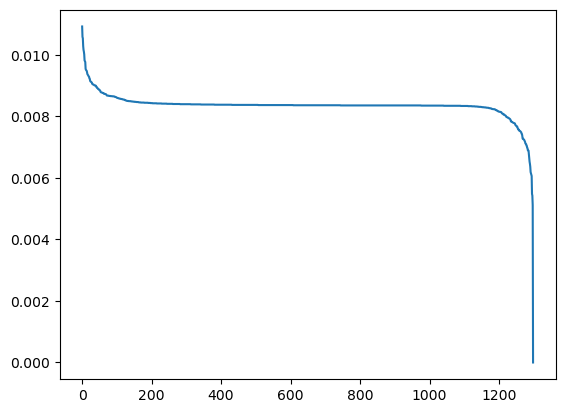

In [120]:
plt.plot(list(X_dict.values()))

In [12]:
qs_rankings_combined['spring_rank'] = qs_rankings_combined['institution'].map(X_dict)
qs_rankings_combined

NameError: name 'qs_rankings_combined' is not defined

Text(0, 0.5, 'SpringRank')

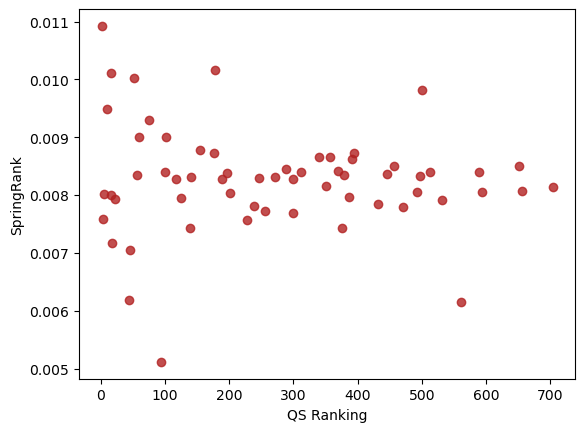

In [122]:
plt.scatter(qs_rankings_combined['Rank'], qs_rankings_combined['spring_rank'], color = 'firebrick', alpha = 0.8)
plt.xlabel('QS Ranking')
plt.ylabel('SpringRank')

In [123]:
institutions = qs_rankings_combined['institution'].tolist()
degrees = qs_rankings_combined['spring_rank'].tolist()
ec_dict = dict(zip(institutions, degrees))
ec_dict = dict(sorted(ec_dict.items(), key=lambda item: item[1]))
ec_dict

{'Icahn School of Medicine at Mount Sinai': 0.005116262858126386,
 'Baylor College of Medicine': 0.006190619984974832,
 'Washington University in St. Louis': 0.007044298350632694,
 'Duke University': 0.007172059738690395,
 'University of Florida': 0.007427582514805686,
 'The University of Arizona': 0.0075727659103257405,
 'Stanford University': 0.007578573246146525,
 'University of Utah': 0.007683105290920977,
 'Dartmouth College': 0.007723756641666579,
 'University of Iowa': 0.0078108666789785675,
 'University of Washington': 0.007938628067036269,
 'University of California, Davis': 0.007944435402857053,
 'University of Pennsylvania': 0.008008316096885904,
 'Johns Hopkins University': 0.008025738104348257,
 'University of South Florida': 0.008031545440169041,
 'Texas A&M University': 0.008269646208821979,
 'University of Southern California': 0.008275453544642764,
 'University of Rochester': 0.008292875552105228,
 'University of Miami': 0.008304490223746797,
 'Tulane University': 0.00

In [21]:
all_inst['matched_institution'] = all_inst['institution'].apply(lambda x: match_dict.get(x, None))

qs_rankings = pd.read_csv('../data/qs_rankings.csv', skiprows=11)
qs_rankings = qs_rankings.iloc[:-4]
qs_rankings.columns = qs_rankings.iloc[0]
qs_rankings = qs_rankings.iloc[1:]
qs_rankings

qs_rankings['Rank'] = range(1, len(qs_rankings) + 1)
qs_rankings_combined = qs_rankings.merge(all_inst, left_on='Institution', right_on='institution', how='left')
qs_rankings_combined = qs_rankings_combined.dropna(subset=['matched_institution'])
qs_rankings_combined = qs_rankings_combined[qs_rankings_combined['Location'] == 'United States']


In [133]:
specialties = np.unique(tdf_all['specialty'])

specialties

array(['allergy', 'card', 'child_neurology', 'colorectal_surgery',
       'dermatology', 'gastroenterology', 'geriatrics', 'hematology',
       'int_radiology', 'medical_genetics', 'neurosurgery', 'obgyn',
       'ophthalmology', 'pediatrics', 'psychiatry'], dtype=object)

In [ ]:
tdf = tdf[(tdf['timestamp'] >= 1980) & (tdf['timestamp'] <= 2010)]

node_u  \
16410           muhlenberg regional medical center   
16411          universidad autónoma de guadalajara   
16412  University of North Carolina at Chapel Hill   
16413                          Summa Health System   
16414   Mathias Aznar Memorial College of Medicine   
...                                            ...   
18501                          University of Lagos   
18502                       Keesler Medical Center   
18503                        universidad del norte   
18504                      Yale New Haven Hospital   
18505                  University of South Florida   

                                   node_v  timestamp  doctor_id  \
16410           University of Connecticut     1975.0      729.0   
16411  muhlenberg regional medical center     1973.0      729.0   
16412        University of North Carolina     1990.0     2999.0   
16413             University of Rochester     1977.0     2560.0   
16414                 Summa Health System     1972.0     2560.0   
...                                   ...        ...        ...   
18501  Washington University in St. Louis     1998.0       35.0   
18502            Johns Hopkins University     2012.0     2631.0   
18503              Keesler Medical Center     2004.0     2631.0   
18504          Boston Children's Hospital     2009.0     3020.0   
18505             Yale New Haven Hospital     2006.0     3020.0   

                 transition         specialty    weight  time_elapsed  \
16410  internship-residency  medical_genetics  0.000477          46.0   
16411         md-internship  medical_genetics  0.000477          44.0   
16412          md-residency  medical_genetics  0.000477          61.0   
16413  internship-residency  medical_genetics  0.000477          48.0   
16414         md-internship  medical_genetics  0.000477          43.0   
...                     ...               ...       ...           ...   
18501          md-residency  medical_genetics  0.000477          69.0   
18502   residency-residency  medical_genetics  0.000477          83.0   
18503          md-residency  medical_genetics  0.000477          75.0   
18504   residency-residency  medical_genetics  0.000477          80.0   
18505          md-residency  medical_genetics  0.000477          77.0   

       time_bin  
16410      40.0  
16411      40.0  
16412      60.0  
16413      40.0  
16414      40.0  
...         ...  
18501      60.0  
18502      80.0  
18503      60.0  
18504      80.0  
18505      60.0  

[2096 rows x 9 columns]

In [23]:
import matplotlib.pyplot as plt
import networkx as nx

child_neurology
                    matched_institution  eigenvector_centrality
44   Washington University in St. Louis                0.926810
245             University of Rochester                0.038353
15           University of Pennsylvania                0.034846
geriatrics
                 matched_institution  eigenvector_centrality
560               Hofstra University                0.585093
139              University of Miami                0.092443
98   Case Western Reserve University                0.071254
hematology
          matched_institution  eigenvector_centrality
2         Stanford University                0.553654
153          Tufts University                0.065232
20   University of Washington                0.063680
medical_genetics
                   matched_institution  eigenvector_centrality
20            University of Washington                0.429692
44  Washington University in St. Louis                0.388597
2                  Stanford University  

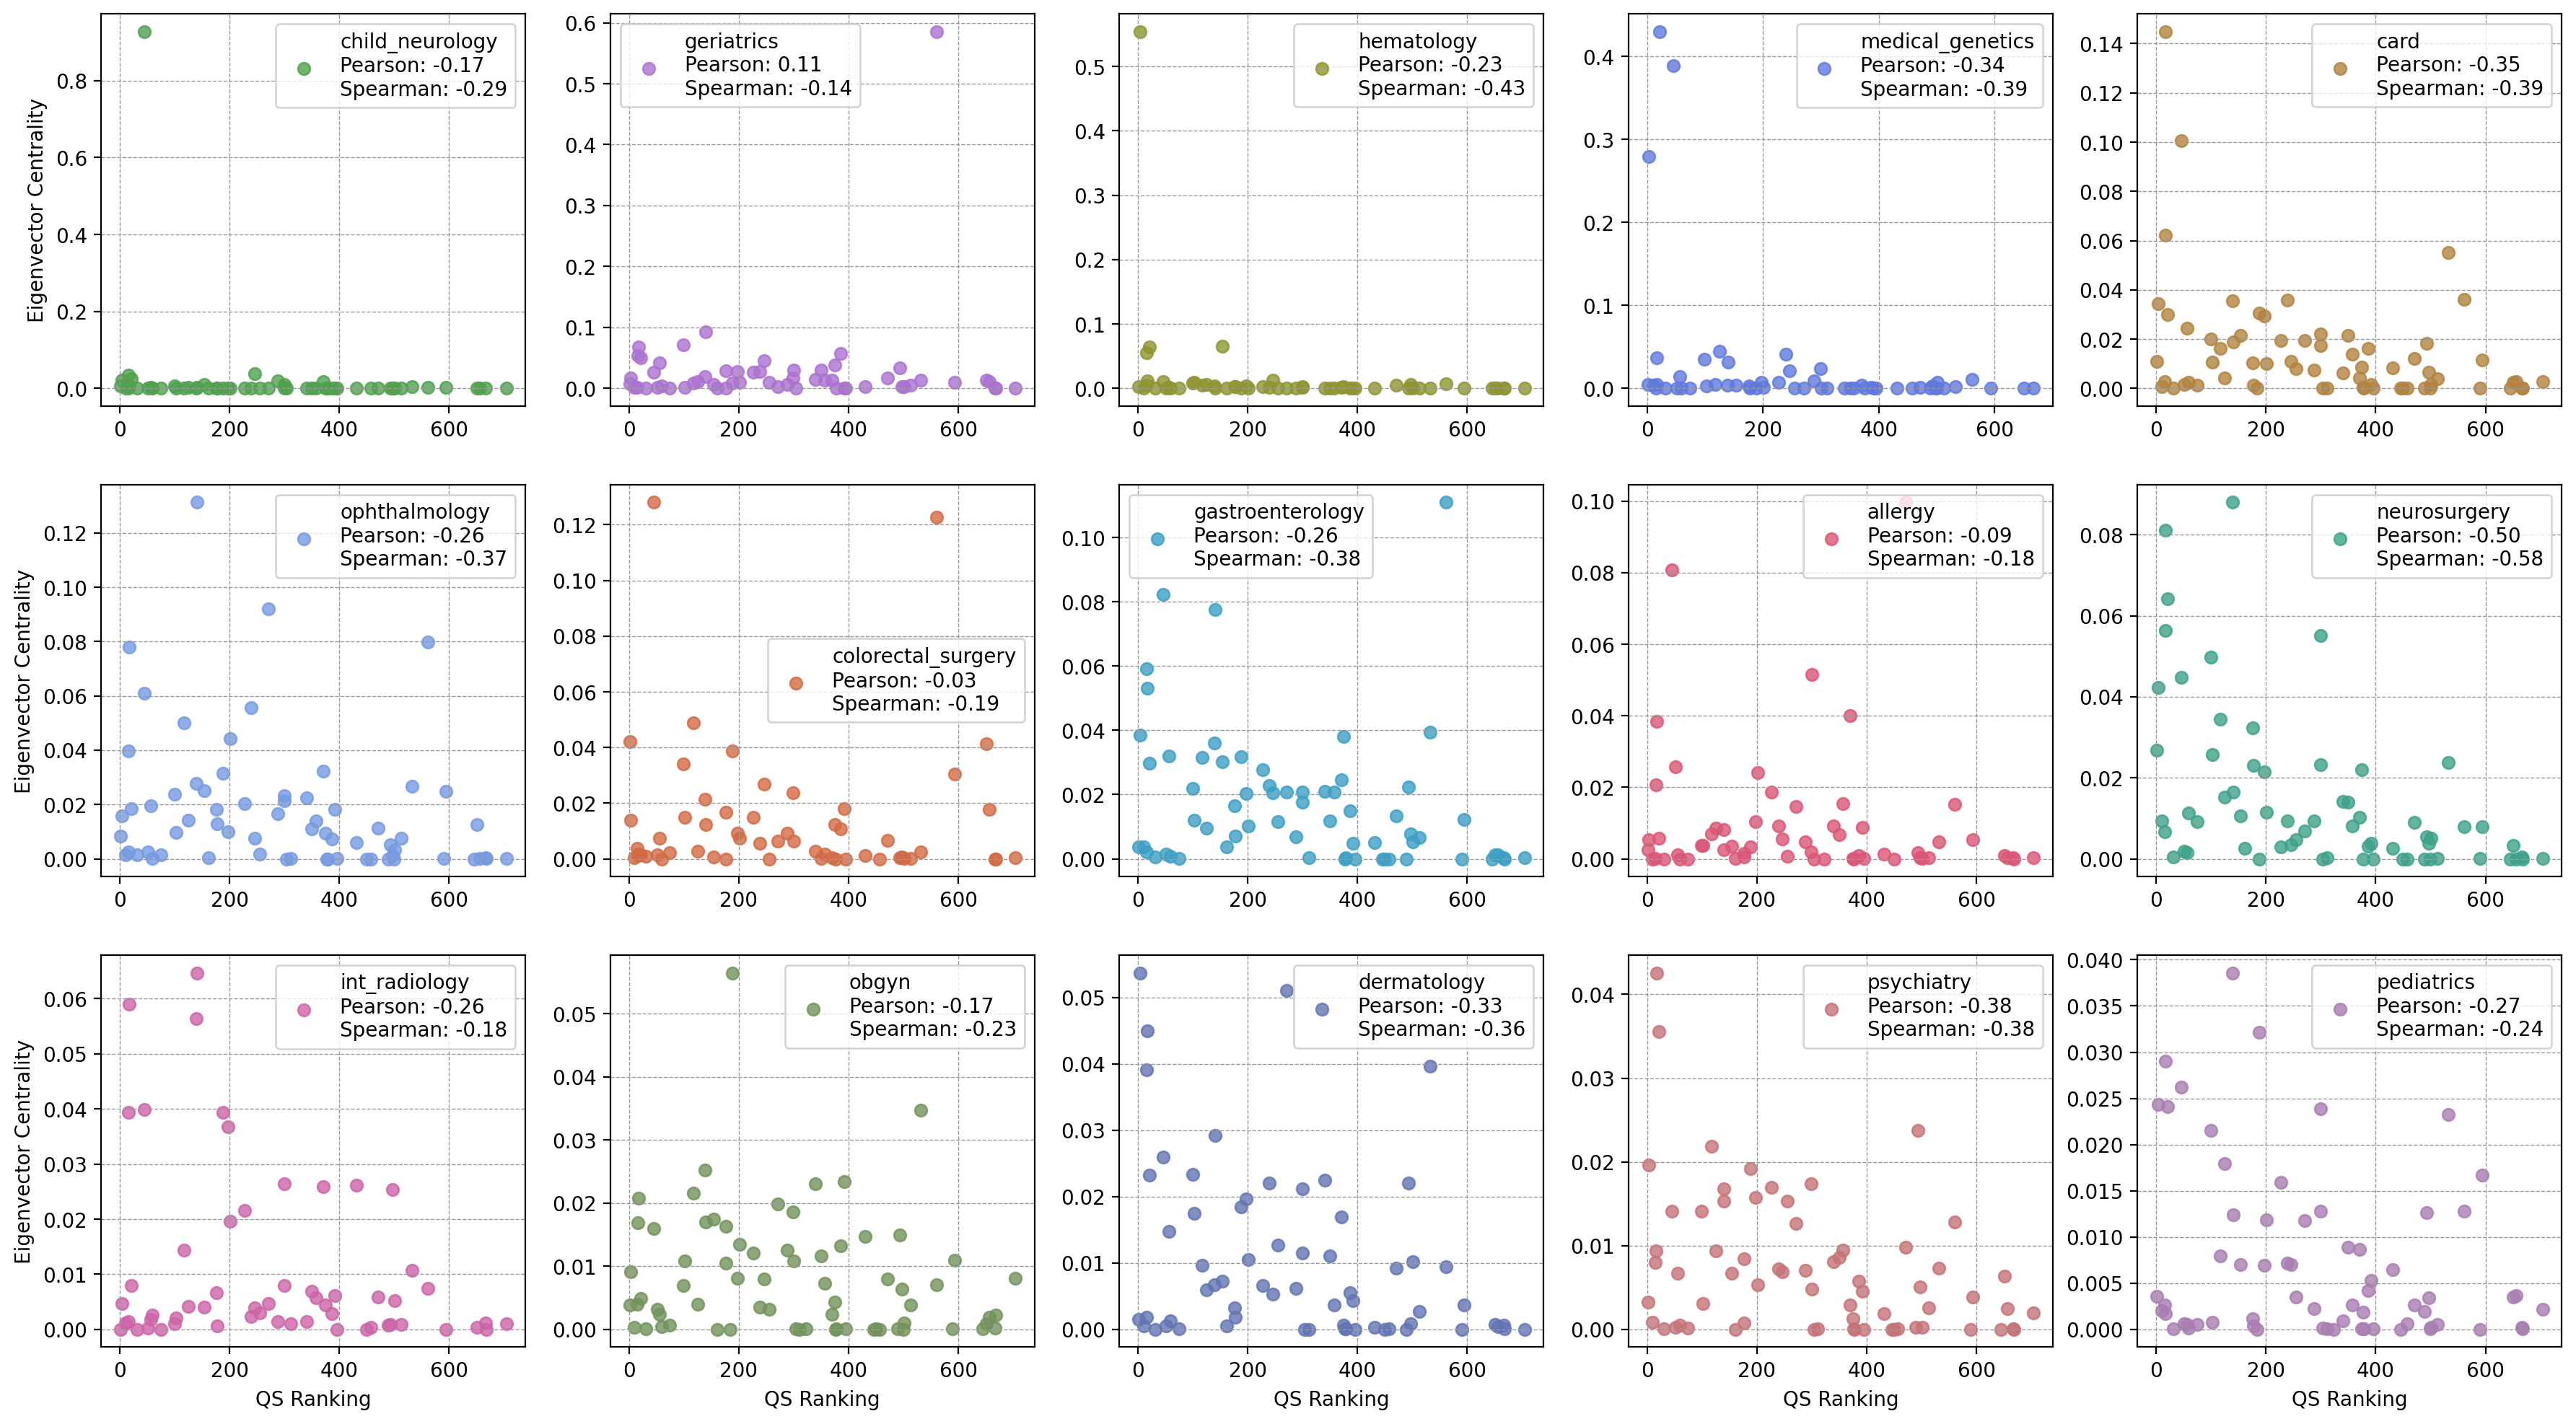

In [28]:
from scipy.stats import pearsonr, spearmanr

fig, ax = plt.subplots(3, 5, figsize=(22, 12), dpi=200)
cols = ["#51a050", "#ab72d0", "#8f9532", "#6079dc", "#b28340", "#769ae1", "#d26a46", "#3d9fc5", "#da5676", "#3fa18a", "#cc64a8", "#72925b", "#6374b2", "#c57378", "#a97db2"]

specialties = np.unique(tdf_all['specialty'])

# Calculate the max y-axis value for each specialty
max_y_values = []
for s in specialties:
    tdf = tdf_all[tdf_all['specialty'] == s].copy()
    tdf = tdf[(tdf['timestamp'] >= 1980) & (tdf['timestamp'] <= 2010)]
    g_agg = temporal_network_from_data(
        tdf,
        aggregation='all',
        #interval_size=20,
        directed=True
    )
    qs_rankings_combined['eigenvector_centrality'] = qs_rankings_combined['institution'].apply(lambda x: nx.eigenvector_centrality_numpy(g_agg, weight='weight').get(x, None))
    max_y_values.append((s, qs_rankings_combined['eigenvector_centrality'].max()))

# Sort specialties by max y-axis value in descending order
sorted_specialties = [s for s, _ in sorted(max_y_values, key=lambda x: x[1], reverse=True)]

for i, s in enumerate(sorted_specialties):
    tdf = tdf_all[tdf_all['specialty'] == s].copy()
    tdf = tdf[(tdf['timestamp'] >= 1980) & (tdf['timestamp'] <= 2010)]
    g_agg = temporal_network_from_data(
        tdf,
        aggregation='all',
        #interval_size=20,
        directed=True
    )
    # qs_rankings_combined['degree'] = qs_rankings_combined['institution'].apply(lambda x: g_agg.degree[x] if x in g_agg else None)
    # qs_rankings_combined['degree_rank'] = qs_rankings_combined['degree'].rank(ascending=False, method='min')
    qs_rankings_combined['eigenvector_centrality'] = qs_rankings_combined['institution'].apply(lambda x: nx.eigenvector_centrality_numpy(g_agg, weight='weight').get(x, None))
    qs_rankings_combined['eigenvector_centrality_rank'] = qs_rankings_combined['eigenvector_centrality'].rank(ascending=False, method='min')
    top_3_matched_institutions = qs_rankings_combined.nlargest(3, 'eigenvector_centrality')[['matched_institution', 'eigenvector_centrality']]
    print(s)
    print(top_3_matched_institutions)
    # Calculate Pearson and Spearman correlations
    valid_data = qs_rankings_combined.dropna(subset=['Rank', 'eigenvector_centrality'])
    pearson_corr, _ = pearsonr(valid_data['Rank'], valid_data['eigenvector_centrality'])
    spearman_corr, _ = spearmanr(valid_data['Rank'], valid_data['eigenvector_centrality'])
    
    ax[i // 5, i % 5].scatter(qs_rankings_combined['Rank'], qs_rankings_combined['eigenvector_centrality'], label=f"{s}\nPearson: {pearson_corr:.2f}\nSpearman: {spearman_corr:.2f}", alpha=0.8, color=cols[i])
    ax[i // 5, i % 5].legend()
    ax[i // 5, i % 5].grid(color='#999999', linestyle='--', linewidth=0.5)
    if i % 5 == 0:
        ax[i // 5, i % 5].set_ylabel('Eigenvector Centrality')
    if i // 5 == 2:
        ax[i // 5, i % 5].set_xlabel('QS Ranking')

# plt.savefig('../figs/eigenvector_centrality_vs_qs_ranking.png', dpi=600)
# plt.savefig('../figs/eigenvector_centrality_vs_qs_ranking.pdf', dpi=600)

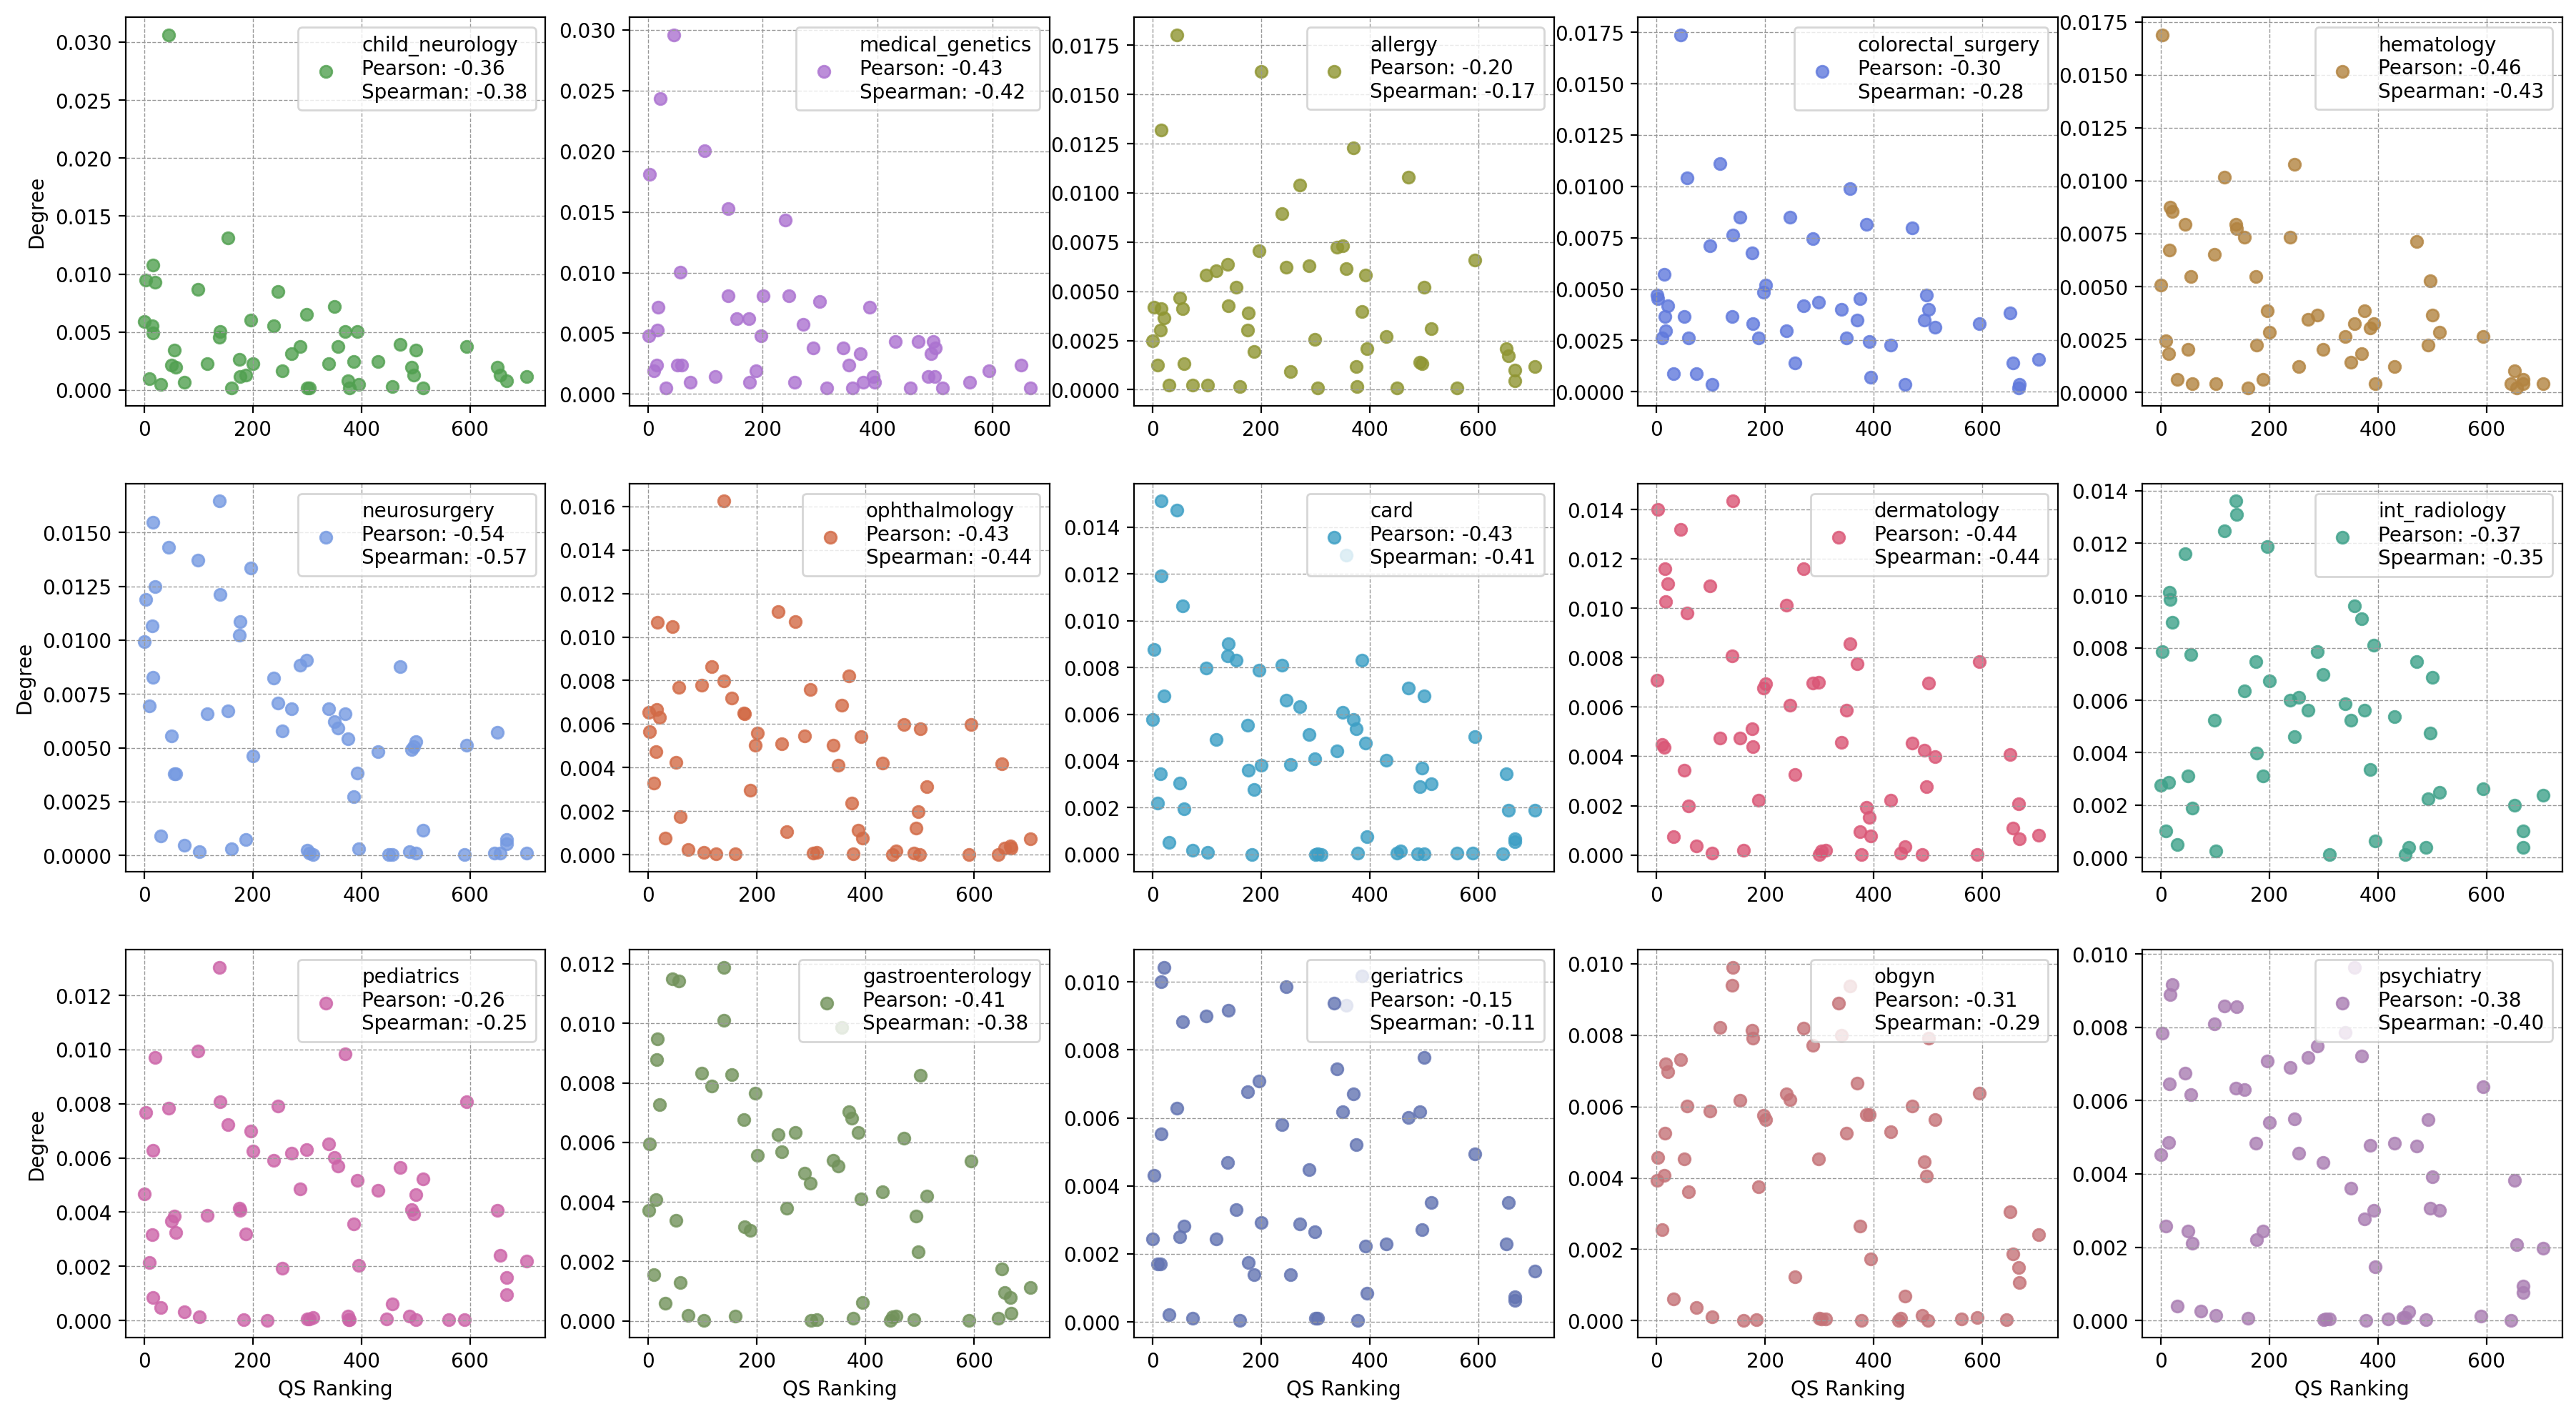

In [48]:
from scipy.stats import pearsonr, spearmanr

fig, ax = plt.subplots(3, 5, figsize=(22, 12), dpi=200)
cols = ["#51a050", "#ab72d0", "#8f9532", "#6079dc", "#b28340", "#769ae1", "#d26a46", "#3d9fc5", "#da5676", "#3fa18a", "#cc64a8", "#72925b", "#6374b2", "#c57378", "#a97db2"]

specialties = np.unique(tdf_all['specialty'])

# Calculate the max y-axis value for each specialty
max_y_values = []
for s in specialties:
    tdf = tdf_all[tdf_all['specialty'] == s].copy()
    tdf = tdf[(tdf['timestamp'] >= 1980) & (tdf['timestamp'] <= 2010)]
    g_agg = temporal_network_from_data(
        tdf,
        aggregation='all',
        #interval_size=20,
        directed=True
    )
    qs_rankings_combined['degree'] = qs_rankings_combined['institution'].apply(lambda x: g_agg.in_degree(x, weight='weight') + g_agg.out_degree(x, weight='weight') if x in g_agg else None)
    max_y_values.append((s, qs_rankings_combined['degree'].max()))

# Sort specialties by max y-axis value in descending order
sorted_specialties = [s for s, _ in sorted(max_y_values, key=lambda x: x[1], reverse=True)]

for i, s in enumerate(sorted_specialties):
    tdf = tdf_all[tdf_all['specialty'] == s].copy()
    tdf = tdf[(tdf['timestamp'] >= 1980) & (tdf['timestamp'] <= 2010)]
    g_agg = temporal_network_from_data(
        tdf,
        aggregation='all',
        #interval_size=20,
        directed=True
    )
    qs_rankings_combined['degree'] = qs_rankings_combined['institution'].apply(lambda x: g_agg.in_degree(x, weight='weight') + g_agg.out_degree(x, weight='weight') if x in g_agg else None)
    qs_rankings_combined['degree_rank'] = qs_rankings_combined['degree'].rank(ascending=False, method='min')
    # qs_rankings_combined['eigenvector_centrality'] = qs_rankings_combined['institution'].apply(lambda x: nx.eigenvector_centrality_numpy(g_agg, weight='weight').get(x, None))
    # qs_rankings_combined['eigenvector_centrality_rank'] = qs_rankings_combined['eigenvector_centrality'].rank(ascending=False, method='min')
    
    # Calculate Pearson and Spearman correlations
    valid_data = qs_rankings_combined.dropna(subset=['Rank', 'degree'])
    pearson_corr, _ = pearsonr(valid_data['Rank'], valid_data['degree'])
    spearman_corr, _ = spearmanr(valid_data['Rank'], valid_data['degree'])
    
    ax[i // 5, i % 5].scatter(qs_rankings_combined['Rank'], qs_rankings_combined['degree'], label=f"{s}\nPearson: {pearson_corr:.2f}\nSpearman: {spearman_corr:.2f}", alpha=0.8, color=cols[i])
    ax[i // 5, i % 5].legend()
    ax[i // 5, i % 5].grid(color='#999999', linestyle='--', linewidth=0.5)
    if i % 5 == 0:
        ax[i // 5, i % 5].set_ylabel('Degree')
    if i // 5 == 2:
        ax[i // 5, i % 5].set_xlabel('QS Ranking')

# plt.savefig('../figs/degree_centrality_vs_qs_ranking.png', dpi=600)
# plt.savefig('../figs/degree_centrality_vs_qs_ranking.pdf', dpi=600)

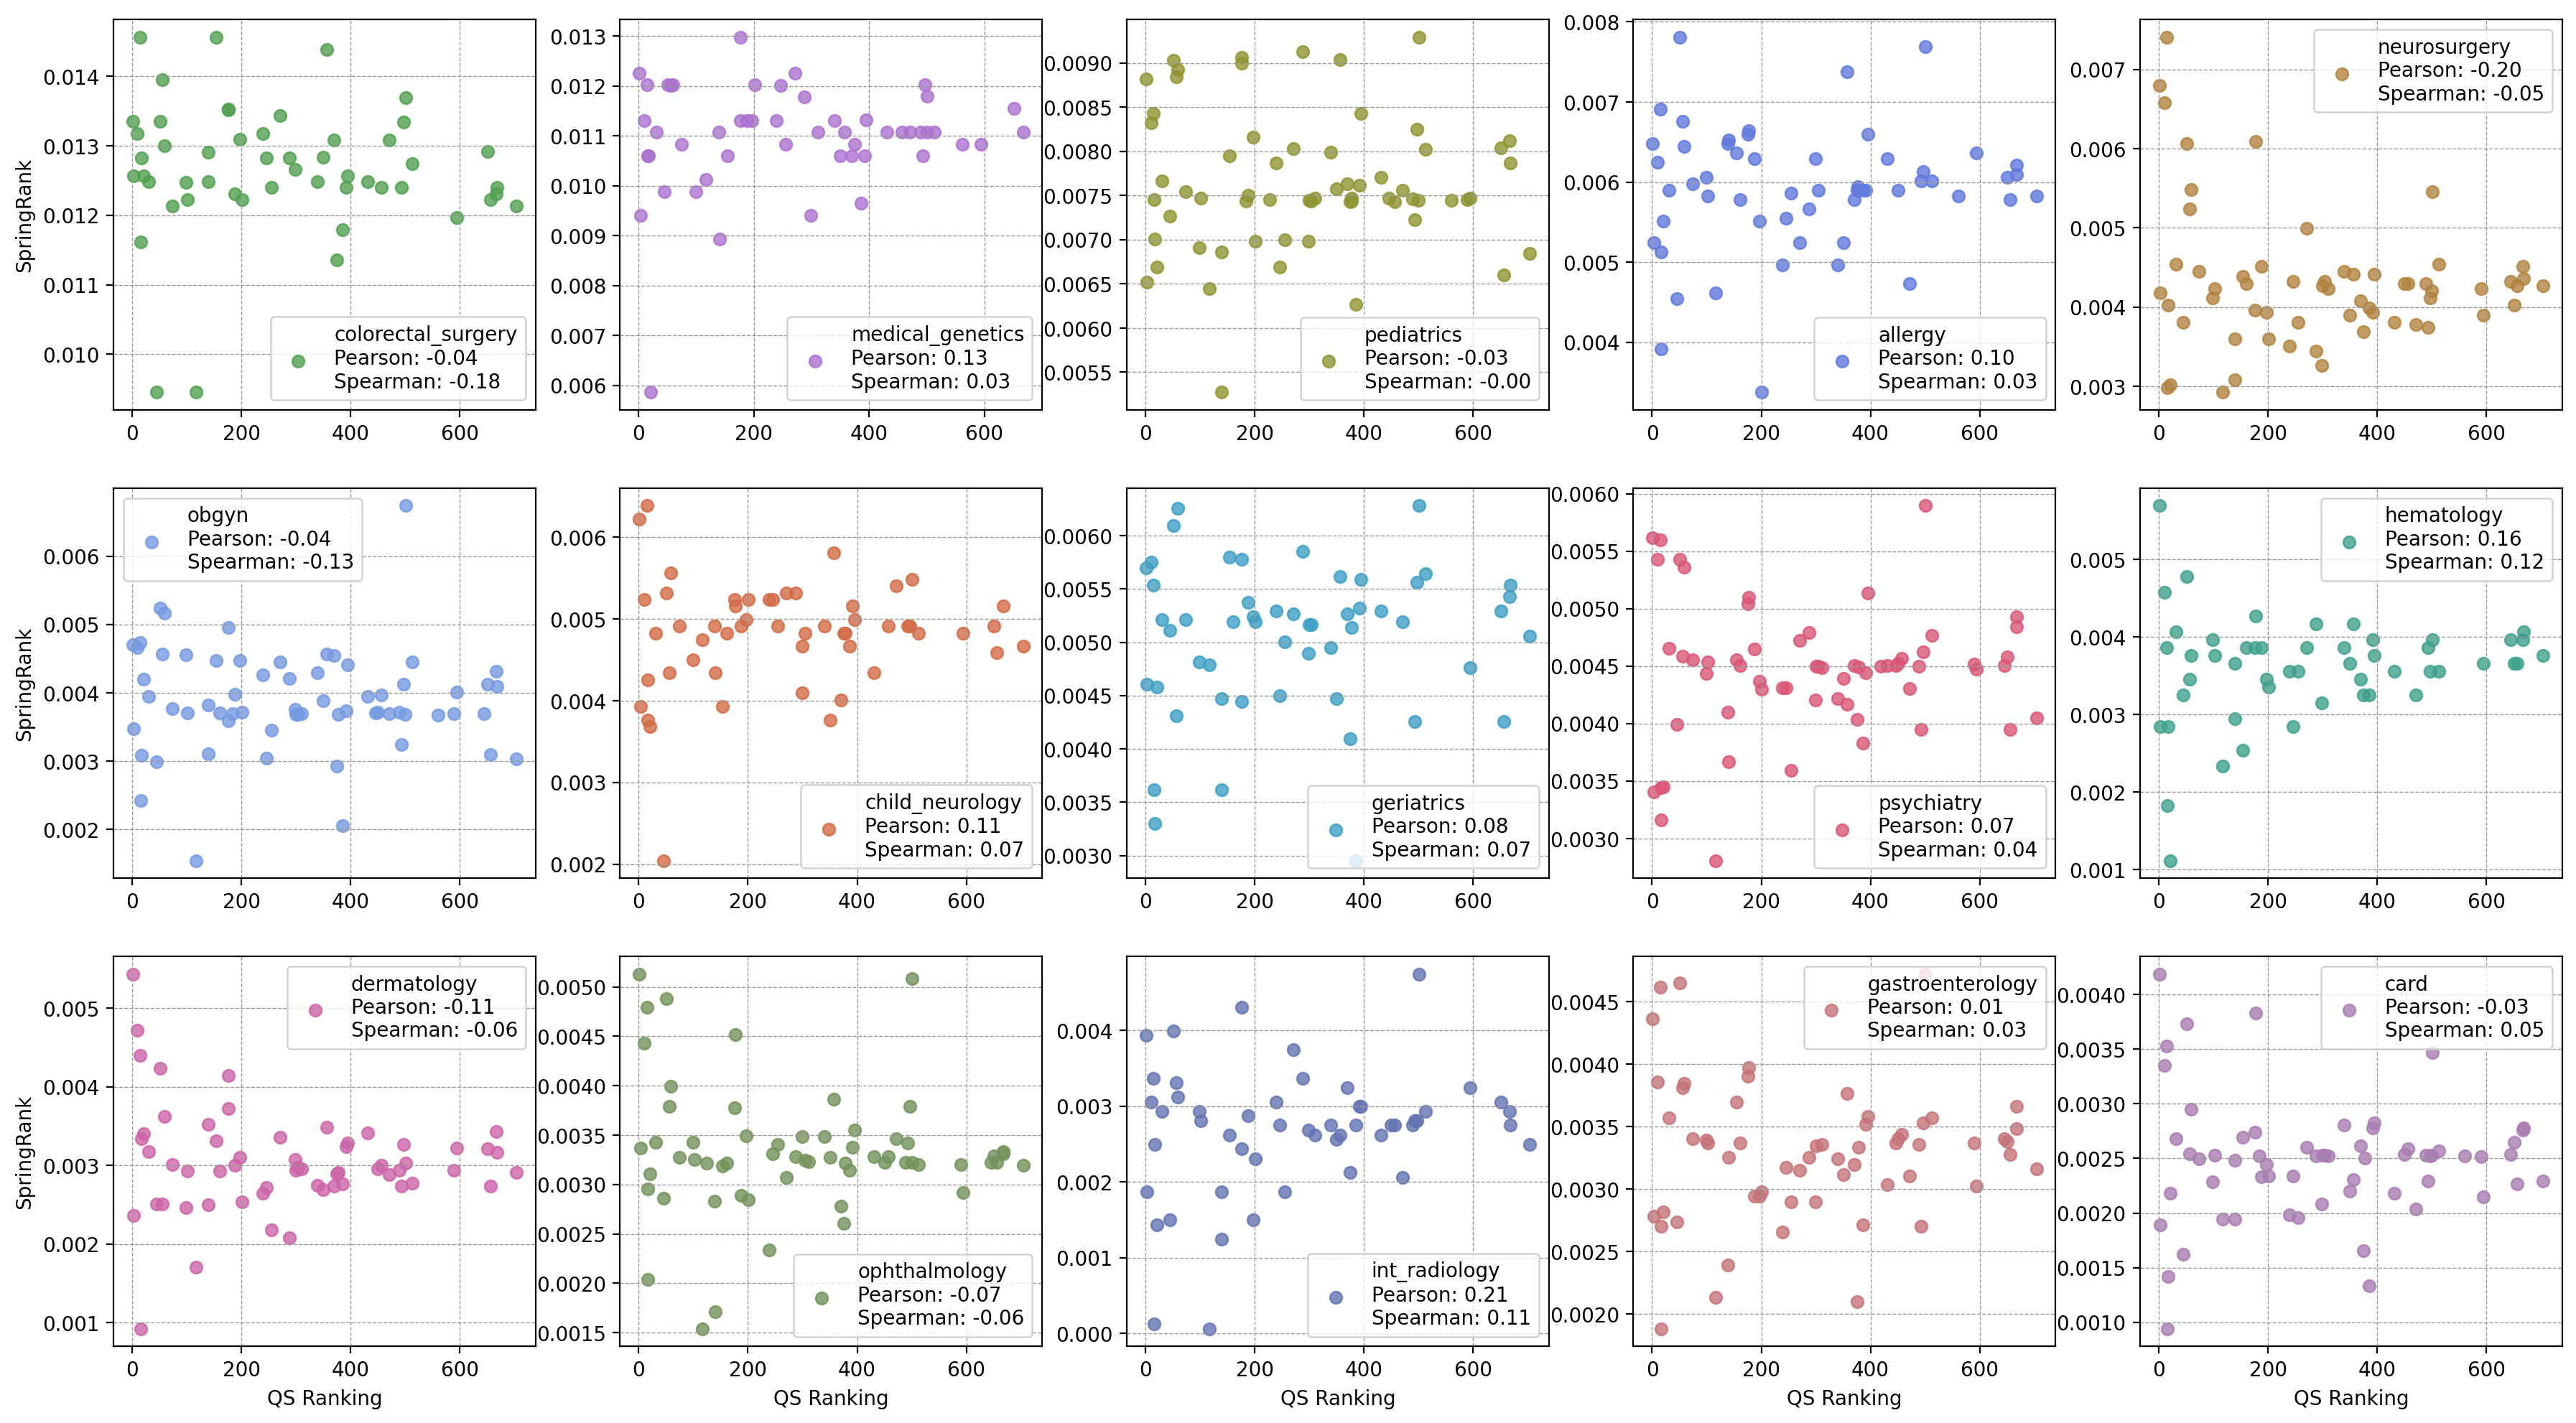

In [49]:
from scipy.stats import pearsonr, spearmanr

fig, ax = plt.subplots(3, 5, figsize=(22, 12), dpi=200)
cols = ["#51a050", "#ab72d0", "#8f9532", "#6079dc", "#b28340", "#769ae1", "#d26a46", "#3d9fc5", "#da5676", "#3fa18a", "#cc64a8", "#72925b", "#6374b2", "#c57378", "#a97db2"]

specialties = np.unique(tdf_all['specialty'])

# Calculate the max y-axis value for each specialty
max_y_values = []
for s in specialties:
    tdf = tdf_all[tdf_all['specialty'] == s].copy()
    tdf = tdf[(tdf['timestamp'] >= 1980) & (tdf['timestamp'] <= 2010)]
    g_agg = temporal_network_from_data(
        tdf,
        aggregation='all',
        #interval_size=20,
        directed=True
    )
    nodes=list(g_agg.nodes())
    A = nx.to_scipy_sparse_array(g_agg, dtype=float,nodelist=nodes)
    A = scipy.sparse.csr_matrix(A)	
    alpha=2
    l0=1
    l1=1
    rank=SpringRank(A,alpha=alpha,l0=l0,l1=l1)
    rank=shift_rank(rank)

    X=[(nodes[i],rank[i]) for i in range(g_agg.number_of_nodes())]
    X= sorted(X, key=lambda tup: tup[1],reverse=True)
    X_dict = dict(X)
    qs_rankings_combined['spring_rank'] = qs_rankings_combined['institution'].map(X_dict)
    max_y_values.append((s, qs_rankings_combined['spring_rank'].max()))

# Sort specialties by max y-axis value in descending order
sorted_specialties = [s for s, _ in sorted(max_y_values, key=lambda x: x[1], reverse=True)]

for i, s in enumerate(sorted_specialties):
    tdf = tdf_all[tdf_all['specialty'] == s].copy()
    tdf = tdf[(tdf['timestamp'] >= 1980) & (tdf['timestamp'] <= 2010)]
    g_agg = temporal_network_from_data(
        tdf,
        aggregation='all',
        #interval_size=20,
        directed=True
    )
    nodes = list(g_agg.nodes())
    A = nx.to_scipy_sparse_array(g_agg, dtype=float, nodelist=nodes)
    A = scipy.sparse.csr_matrix(A)	
    alpha = 2
    l0 = 1
    l1 = 1
    rank = SpringRank(A, alpha=alpha, l0=l0, l1=l1)
    rank = shift_rank(rank)
    
    # Recalculate X_dict for each specialty
    X = [(nodes[i], rank[i]) for i in range(g_agg.number_of_nodes())]
    X = sorted(X, key=lambda tup: tup[1], reverse=True)
    X_dict = dict(X)
    
    # Update spring_rank for the current specialty
    qs_rankings_combined['spring_rank'] = qs_rankings_combined['institution'].map(X_dict)
    
    # Calculate Pearson and Spearman correlations
    valid_data = qs_rankings_combined.dropna(subset=['Rank', 'spring_rank'])
    pearson_corr, _ = pearsonr(valid_data['Rank'], valid_data['spring_rank'])
    spearman_corr, _ = spearmanr(valid_data['Rank'], valid_data['spring_rank'])
    
    ax[i // 5, i % 5].scatter(qs_rankings_combined['Rank'], qs_rankings_combined['spring_rank'], label=f"{s}\nPearson: {pearson_corr:.2f}\nSpearman: {spearman_corr:.2f}", alpha=0.8, color=cols[i])
    ax[i // 5, i % 5].legend()
    ax[i // 5, i % 5].grid(color='#999999', linestyle='--', linewidth=0.5)
    if i % 5 == 0:
        ax[i // 5, i % 5].set_ylabel('SpringRank')
    if i // 5 == 2:
        ax[i // 5, i % 5].set_xlabel('QS Ranking')

# plt.savefig('../figs/SpringRank_vs_qs_ranking.png', dpi=600)
# plt.savefig('../figs/SpringRank_vs_qs_ranking.pdf', dpi=600)

In [ ]:
# tdf = tdf_all[tdf_all['specialty'] == s].copy()
tdf = tdf_all[(tdf_all['timestamp'] >= 1980) & (tdf['timestamp'] <= 2010)]
g_agg = temporal_network_from_data(
    tdf,
    aggregation='all',
    #interval_size=20,
    directed=True
)
qs_rankings_combined['eigenvector_centrality'] = qs_rankings_combined['institution'].apply(lambda x: nx.eigenvector_centrality_numpy(g_agg, weight='weight').get(x, None))
qs_rankings_combined['degree'] = qs_rankings_combined['institution'].apply(lambda x: g_agg.in_degree(x, weight='weight') + g_agg.out_degree(x, weight='weight') if x in g_agg else None)
nodes=list(g_agg.nodes())
A = nx.to_scipy_sparse_array(g_agg, dtype=float,nodelist=nodes)
A = scipy.sparse.csr_matrix(A)	
alpha=2
l0=1
l1=1
rank=SpringRank(A,alpha=alpha,l0=l0,l1=l1)
rank=shift_rank(rank)

X=[(nodes[i],rank[i]) for i in range(g_agg.number_of_nodes())]
X= sorted(X, key=lambda tup: tup[1],reverse=True)
X_dict = dict(X)
qs_rankings_combined['spring_rank'] = qs_rankings_combined['institution'].map(X_dict)


/var/folders/rg/knmgp2gj4qdc26_lxdljzmd00000gn/T/ipykernel_18922/686611906.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["time_bin"] = "all"  # Single graph for all data


In [51]:
qs_rankings_combined

2024     2023                   Institution       Location Academic  \
0          1      1              Harvard University  United States    100.0   
2          3      3             Stanford University  United States     93.1   
9         10     11                 Yale University  United States     86.2   
14        15     14             Columbia University  United States     84.3   
15        16     16      University of Pennsylvania  United States     84.6   
..       ...      ...                           ...            ...      ...   
650  601-650  551-600      West Virginia University  United States     24.5   
655  651-700      NaN      East Carolina University  United States     29.9   
666  651-700  551-600  Nova Southeastern University  United States     32.2   
667  651-700  551-600               Ohio University  United States     31.4   
703  651-700  601-650          University of Toledo  United States     30.2   

    Employer Citations      H International Score  Rank  \
0      100.0      95.5  100.0         100.0  99.1     1   
2       94.2      95.5   93.5          85.4  93.0     3   
9       89.2      94.0   90.1          82.2  88.4    10   
14      81.8      94.2   90.5          84.1  87.3    15   
15      81.4      94.5   92.4          77.5  87.1    16   
..       ...       ...    ...           ...   ...   ...   
650     40.0      85.6   66.2          46.7   NaN   651   
655     31.6      85.1   63.0          28.6   NaN   656   
666     44.3      77.2   54.8          37.3   NaN   667   
667     46.6      78.8   56.0          37.3   NaN   668   
703     34.5      84.9   59.6          37.4   NaN   704   

                      institution           matched_institution  \
0              Harvard University            Harvard University   
2             Stanford University           Stanford University   
9                 Yale University               Yale University   
14            Columbia University           Columbia University   
15     University of Pennsylvania    University of Pennsylvania   
..                            ...                           ...   
650      West Virginia University      West Virginia University   
655      East Carolina University      East Carolina University   
666  Nova Southeastern University  Nova Southeastern University   
667               Ohio University               Ohio University   
703          University of Toledo          University of Toledo   

     eigenvector_centrality  eigenvector_centrality_rank    degree  \
0              1.166714e-02                         30.0  0.005784   
2              3.451578e-02                          5.0  0.008769   
9              5.150471e-04                         39.0  0.002184   
14             2.741038e-03                         36.0  0.003461   
15             5.216716e-02                         42.0  0.011928   
..                      ...                          ...       ...   
650            2.528323e-03                         32.0  0.003450   
655            2.636748e-03                         29.0  0.001893   
666            6.074531e-05                         52.0  0.000674   
667            1.213745e-20                         61.0  0.000534   
703            2.600586e-03                         38.0  0.001905   

     degree_rank  spring_rank  
0           29.0     0.004187  
2            8.0     0.001893  
9           38.0     0.003351  
14          23.0     0.003525  
15          15.0     0.000941  
..           ...          ...  
650         32.0     0.002648  
655         43.0     0.002265  
666         46.0     0.002758  
667         47.0     0.002782  
703         44.0     0.002294  

[70 rows x 18 columns]

In [60]:
top_ten_by_degree = qs_rankings_combined.sort_values(by='Rank', ascending=True).head(10)
print(top_ten_by_degree[['matched_institution', 'degree']])

                   matched_institution    degree
0                   Harvard University  0.005784
2                  Stanford University  0.008769
9                      Yale University  0.002184
14                 Columbia University  0.003461
15          University of Pennsylvania  0.011928
16                     Duke University  0.015111
20            University of Washington  0.006771
30                  Cornell University  0.000511
44  Washington University in St. Louis  0.014727
50             Northwestern University  0.003055


### N doctors

In [81]:
specialties = np.unique(tdf_all['specialty'])
specialties

array(['allergy', 'card', 'child_neurology', 'colorectal_surgery',
       'dermatology', 'gastroenterology', 'geriatrics', 'hematology',
       'int_radiology', 'medical_genetics', 'neurosurgery', 'obgyn',
       'ophthalmology', 'pediatrics', 'psychiatry'], dtype=object)

In [90]:
nums = [6315,38970,2966,2855,18387,21742,10964,2780,3734,3876,8922,58613,25881,81307,72843]
num_per_specialty = dict(zip(specialties, nums))
num_per_specialty = dict(sorted(num_per_specialty.items(), key=lambda item: item[1], reverse=True))
num_per_specialty

{'pediatrics': 81307,
 'psychiatry': 72843,
 'obgyn': 58613,
 'card': 38970,
 'ophthalmology': 25881,
 'gastroenterology': 21742,
 'dermatology': 18387,
 'geriatrics': 10964,
 'neurosurgery': 8922,
 'allergy': 6315,
 'medical_genetics': 3876,
 'int_radiology': 3734,
 'child_neurology': 2966,
 'colorectal_surgery': 2855,
 'hematology': 2780}

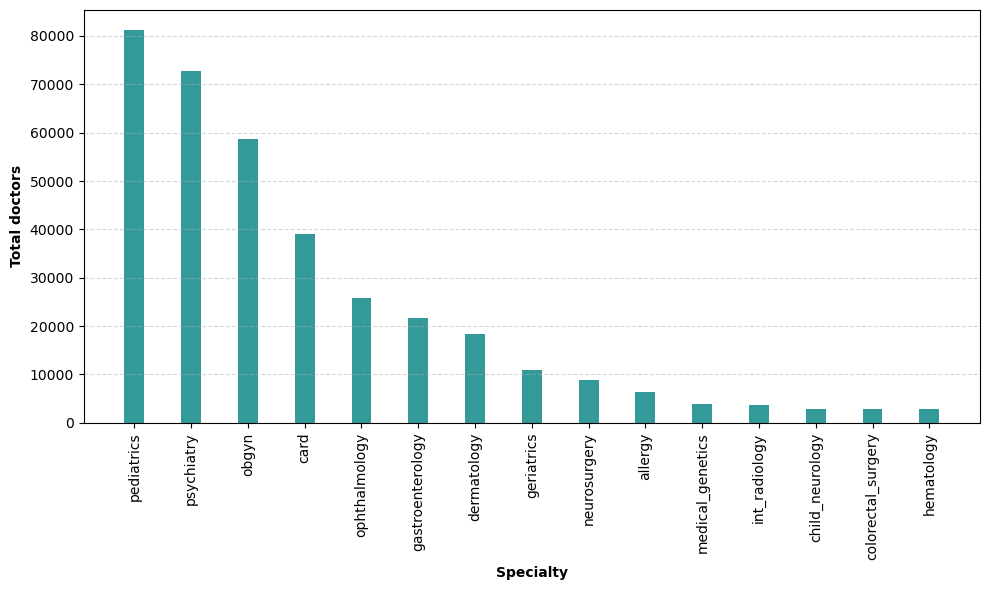

In [92]:
import matplotlib.pyplot as plt



# Set the figure size
plt.figure(figsize=(10, 6))

# Set the bar width
bar_width = 0.35

# Create bar chart
plt.bar(num_per_specialty.keys(), num_per_specialty.values(), width=bar_width, color='teal', alpha=0.8)

# Add labels
plt.xlabel('Specialty', fontweight='bold')
plt.ylabel('Total doctors', fontweight='bold')

# Rotate x-tick labels and set positions (default positions can be used)
plt.xticks(rotation=90)

# Add gridlines on the y-axis
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


### viz

In [228]:
# Get the list of matched institutions
matched_institutions = qs_rankings_combined['matched_institution'].tolist()

# Create the subgraph
subgraph = g_agg.subgraph(matched_institutions).copy()

subgraph.number_of_edges()

115

In [241]:
# s = 'medical_genetics'
# tdf = tdf_all[tdf_all['specialty'] == s].copy()
tdf = tdf_all[(tdf_all['timestamp'] >= 1980) & (tdf_all['timestamp'] <= 2009)].copy()
g_agg = temporal_network_from_data(
    tdf,
    aggregation='all',
    directed=True
)
# Get the list of matched institutions
matched_institutions = qs_rankings_combined['matched_institution'].tolist()

# Create the subgraph
subgraph = g_agg.subgraph(matched_institutions).copy()

# Flip the direction of all edges
nodes=list(subgraph.nodes())
A = nx.to_scipy_sparse_array(subgraph, dtype=float,nodelist=nodes)
A = scipy.sparse.csr_matrix(A)	

alpha = 2
l0 = 1
l1 = 1
rank = SpringRank(A, alpha=alpha, l0=l0, l1=l1)
rank = shift_rank(rank)

# Recalculate X_dict for each specialty
X = [(nodes[i], rank[i]) for i in range(subgraph.number_of_nodes())]
X = sorted(X, key=lambda tup: tup[1], reverse=True)
X_dict = dict(X)

In [242]:
X_dict


{'Harvard University': 0.009220596189205676,
 'Northwestern University': 0.00842300391004358,
 'Yale University': 0.007538272880574737,
 'University of Pittsburgh': 0.007181763154711862,
 'Vanderbilt University': 0.007171719031049295,
 'Drexel University': 0.006959717877255689,
 'Georgetown University': 0.006932695863929417,
 'Wayne State University': 0.006910000738438726,
 'Columbia University': 0.006578961476682577,
 'West Virginia University': 0.006511285348203333,
 'University of Mississippi': 0.006458341874585716,
 'Nova Southeastern University': 0.0062547186027895885,
 'University of Kansas': 0.006210444675345372,
 'Howard University': 0.006193972122446545,
 'University of South Carolina': 0.00618766213852362,
 'Texas A&M University': 0.00608180179030271,
 'University of Virginia': 0.006062224335533384,
 'The Ohio State University': 0.005973642073575758,
 'University of Iowa': 0.0057194818414348925,
 'Cornell University': 0.005652826222199203,
 'George Washington University': 0.0

In [232]:
degree_dict = {node: g_agg.degree[node] for node in X_dict.keys()}
degree_dict

{'University of South Florida': 12,
 'West Virginia University': 5,
 'University of Pittsburgh': 4,
 'University of Iowa': 22,
 'Nova Southeastern University': 1,
 'Tulane University': 8,
 'The University of Alabama': 10,
 'Northwestern University': 4,
 'University of Florida': 16,
 'Texas A&M University': 4,
 'Harvard University': 8,
 'University of Connecticut': 12,
 'Virginia Commonwealth University': 11,
 'University of Kansas': 6,
 'George Washington University': 11,
 'University of Rochester': 14,
 'Columbia University': 5,
 'Stanford University': 18,
 'Vanderbilt University': 2,
 'Wayne State University': 8,
 'Washington State University': 3,
 'University of Mississippi': 2,
 'University of South Carolina': 1,
 'University of Kentucky': 6,
 'University of New Mexico': 7,
 'Duke University': 14,
 'Florida International University': 1,
 'Drexel University': 1,
 'Temple University': 2,
 'Florida State University': 1,
 'University of Houston': 3,
 'Wake Forest University': 5,
 'Corn

In [210]:
# Get all the edges coming into "Icahn School of Medicine at Mount Sinai"
incoming_edges = G.in_edges("Baylor College of Medicine", data=True)

# Print the incoming edges
for edge in incoming_edges:
    print(edge)

('Barrow Neurological Institute', 'Baylor College of Medicine', {'weight': 0.0004770992366412})
('Baylor College of Medicine', 'Baylor College of Medicine', {'weight': 0.004770992366412})
('Ben-Gurion University of the Negev', 'Baylor College of Medicine', {'weight': 0.0004770992366412})
('Case Western Reserve University', 'Baylor College of Medicine', {'weight': 0.0004770992366412})
('Christus Health', 'Baylor College of Medicine', {'weight': 0.0009541984732824})
("Cincinnati Children's Hospital Medical Center", 'Baylor College of Medicine', {'weight': 0.0004770992366412})
('Cleveland Clinic', 'Baylor College of Medicine', {'weight': 0.0004770992366412})
('Emory University', 'Baylor College of Medicine', {'weight': 0.0004770992366412})
('Mayo Clinic', 'Baylor College of Medicine', {'weight': 0.0014312977099236})
('Medical University of Warsaw', 'Baylor College of Medicine', {'weight': 0.0004770992366412})
('Naval Medical Center', 'Baylor College of Medicine', {'weight': 0.000477099236

In [209]:
# Get all the edges coming into "Icahn School of Medicine at Mount Sinai"
outgoing_edges = G.out_edges("Icahn School of Medicine at Mount Sinai", data=True)

# Print the incoming edges
for edge in outgoing_edges:
    print(edge)

('Icahn School of Medicine at Mount Sinai', 'Albert Einstein College of Medicine', {'weight': 0.0004770992366412})
('Icahn School of Medicine at Mount Sinai', 'Cedars-Sinai Medical Center', {'weight': 0.0004770992366412})
('Icahn School of Medicine at Mount Sinai', "Children's Hospital of Philadelphia", {'weight': 0.0009541984732824})
('Icahn School of Medicine at Mount Sinai', 'Hofstra University', {'weight': 0.0004770992366412})
('Icahn School of Medicine at Mount Sinai', 'Icahn School of Medicine at Mount Sinai', {'weight': 0.0028625954198472})
('Icahn School of Medicine at Mount Sinai', 'Jacobi Medical Center', {'weight': 0.0004770992366412})
('Icahn School of Medicine at Mount Sinai', 'Johns Hopkins University', {'weight': 0.0004770992366412})
('Icahn School of Medicine at Mount Sinai', 'Mayo Clinic', {'weight': 0.0004770992366412})
('Icahn School of Medicine at Mount Sinai', 'Mount Sinai', {'weight': 0.0009541984732824})
('Icahn School of Medicine at Mount Sinai', 'SUNY Downstate

In [46]:
qs_rankings_combined

2024     2023                   Institution       Location Academic  \
0          1      1              Harvard University  United States    100.0   
2          3      3             Stanford University  United States     93.1   
9         10     11                 Yale University  United States     86.2   
14        15     14             Columbia University  United States     84.3   
15        16     16      University of Pennsylvania  United States     84.6   
..       ...      ...                           ...            ...      ...   
650  601-650  551-600      West Virginia University  United States     24.5   
655  651-700      NaN      East Carolina University  United States     29.9   
666  651-700  551-600  Nova Southeastern University  United States     32.2   
667  651-700  551-600               Ohio University  United States     31.4   
703  651-700  601-650          University of Toledo  United States     30.2   

    Employer Citations      H International Score  Rank  \
0      100.0      95.5  100.0         100.0  99.1     1   
2       94.2      95.5   93.5          85.4  93.0     3   
9       89.2      94.0   90.1          82.2  88.4    10   
14      81.8      94.2   90.5          84.1  87.3    15   
15      81.4      94.5   92.4          77.5  87.1    16   
..       ...       ...    ...           ...   ...   ...   
650     40.0      85.6   66.2          46.7   NaN   651   
655     31.6      85.1   63.0          28.6   NaN   656   
666     44.3      77.2   54.8          37.3   NaN   667   
667     46.6      78.8   56.0          37.3   NaN   668   
703     34.5      84.9   59.6          37.4   NaN   704   

                      institution           matched_institution  \
0              Harvard University            Harvard University   
2             Stanford University           Stanford University   
9                 Yale University               Yale University   
14            Columbia University           Columbia University   
15     University of Pennsylvania    University of Pennsylvania   
..                            ...                           ...   
650      West Virginia University      West Virginia University   
655      East Carolina University      East Carolina University   
666  Nova Southeastern University  Nova Southeastern University   
667               Ohio University               Ohio University   
703          University of Toledo          University of Toledo   

     eigenvector_centrality  eigenvector_centrality_rank  
0                  0.003544                         30.0  
2                  0.024313                          5.0  
9                  0.002046                         39.0  
14                 0.002631                         36.0  
15                 0.001681                         42.0  
..                      ...                          ...  
650                0.003474                         32.0  
655                0.003688                         29.0  
666                0.000249                         52.0  
667                0.000025                         61.0  
703                0.002191                         38.0  

[70 rows x 15 columns]

Fraction of edges going up: 0.54
Fraction of edges going down: 0.46


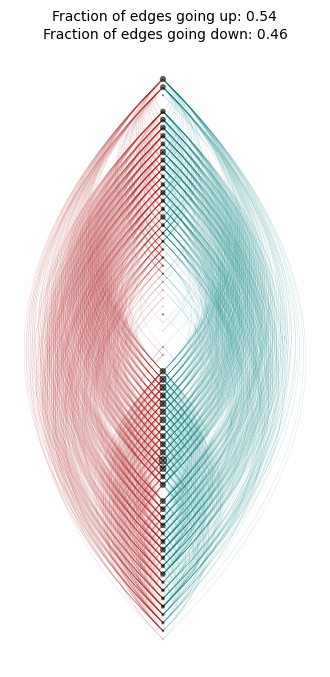

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import FancyArrowPatch
from matplotlib.path import Path

# Generate a random directed graph for this example
G = subgraph

# Calculate rank based on degree (or another ranking metric)
rank = qs_rankings_combined.set_index('matched_institution')['degree'].to_dict()
# Sort nodes by rank and assign them a y-position
sorted_nodes = sorted(rank.keys(), key=lambda x: rank[x])
y_positions = {node: i for i, node in enumerate(sorted_nodes)}

# Assign x-positions for nodes to center them
x_positions = {node: 0 for node in sorted_nodes}

# Function to draw curved edges
def draw_curved_edge(ax, x_start, y_start, x_end, y_end, color, curvature):
    control_x = (x_start + x_end) / 2 + curvature
    control_y = (y_start + y_end) / 2
    path_data = [
        (1, (x_start, y_start)),  # Move to
        (3, (control_x, control_y)),  # Curve to
        (3, (x_end, y_end)),  # Curve to
    ]
    path = Path([point for code, point in path_data], [code for code, point in path_data])
    patch = FancyArrowPatch(
        path=path,
        color=color,
        lw=0.2,
        alpha=0.3,
        arrowstyle="-",
    )
    ax.add_patch(patch)

# Create plot
fig, ax = plt.subplots(figsize=(4, 8))

# Draw edges with curves and ensure proper side placement
up_edges = 0
down_edges = 0

for u, v in G.edges:
    x_start, y_start = x_positions[u], y_positions[u]
    x_end, y_end = x_positions[v], y_positions[v]
    
    if rank[u] < rank[v]:  # Edge goes up the hierarchy
        color = "firebrick"
        curvature = -0.2  # Curve to the left
        up_edges += 1
    else:  # Edge goes down the hierarchy
        color = "teal"
        curvature = 0.2  # Curve to the right
        down_edges += 1
    
    # Adjust curvature magnitude based on vertical distance
    curvature *= abs(y_start - y_end) * 0.05
    draw_curved_edge(ax, x_start, y_start, x_end, y_end, color, curvature)

total_edges = up_edges + down_edges
fraction_up = up_edges / total_edges
fraction_down = down_edges / total_edges
print(f"Fraction of edges going up: {fraction_up:.2f}")
print(f"Fraction of edges going down: {fraction_down:.2f}")

# Draw nodes with size dependent on degree
#node_sizes = [G.degree(node)/3 for node in G.nodes()]
node_sizes = [sum(data['weight'] for _, _, data in G.in_edges(node, data=True))*256 + sum(data['weight'] for _, _, data in G.out_edges(node, data=True))*256 for node in G.nodes()]
nx.draw_networkx_nodes(
    G,
    pos={node: (x_positions[node], y_positions[node]) for node in G.nodes()},
    node_size=node_sizes,
    node_color="black",
    alpha = 0.5,
    ax=ax,
)

# Add text annotations for fractions
ax.text(0.5, 1.05, f"Fraction of edges going up: {fraction_up:.2f}", transform=ax.transAxes, ha='center')
ax.text(0.5, 1.02, f"Fraction of edges going down: {fraction_down:.2f}", transform=ax.transAxes, ha='center')

# Remove axes for cleaner visualization
ax.axis("off")
plt.title("")
plt.savefig('../figs/hierarchical_network_dc.png', dpi=600)
plt.savefig('../figs/hierarchical_network_dc.pdf', dpi=600)
plt.show()


Fraction of edges going up: 0.63
Fraction of edges going down: 0.37


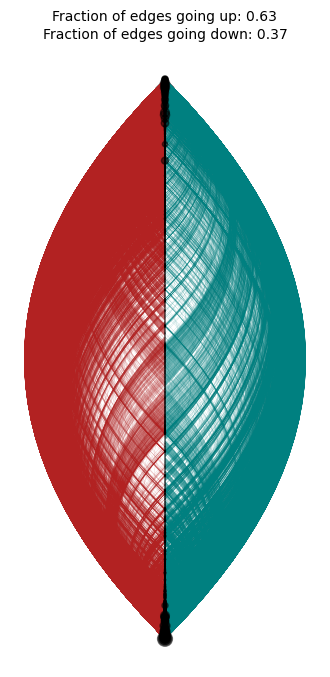

In [121]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import FancyArrowPatch
from matplotlib.path import Path

tdf = tdf_all[(tdf_all['timestamp'] >= 1980) & (tdf_all['timestamp'] <= 2010)].copy()
g_agg = temporal_network_from_data(
    tdf,
    aggregation='all',
    directed=True
)
# Generate a random directed graph for this example
# G = g_agg
# nodes=list(g_agg.nodes())

# rank=SpringRank(A,alpha=alpha,l0=l0,l1=l1)
# rank=shift_rank(rank)

# X=[(nodes[i],rank[i]) for i in range(g_agg.number_of_nodes())]
# X_dict = dict(X)

# rank = X_dict
# # Sort nodes by rank and assign them a y-position
# sorted_nodes = sorted(rank.keys(), key=lambda x: rank[x])

# X_dict = nx.eigenvector_centrality_numpy(g_agg, weight='weight')

X_dict = nx.degree_centrality(g_agg)
rank = X_dict

y_positions = {node: i for i, node in enumerate(sorted_nodes)}

# Assign x-positions for nodes to center them
x_positions = {node: 0 for node in sorted_nodes}

# Function to draw curved edges
def draw_curved_edge(ax, x_start, y_start, x_end, y_end, color, curvature):
    control_x = (x_start + x_end) / 2 + curvature
    control_y = (y_start + y_end) / 2
    path_data = [
        (1, (x_start, y_start)),  # Move to
        (3, (control_x, control_y)),  # Curve to
        (3, (x_end, y_end)),  # Curve to
    ]
    path = Path([point for code, point in path_data], [code for code, point in path_data])
    patch = FancyArrowPatch(
        path=path,
        color=color,
        lw=0.2,
        alpha=0.3,
        arrowstyle="-",
    )
    ax.add_patch(patch)

# Create plot
fig, ax = plt.subplots(figsize=(4, 8))

# Draw edges with curves and ensure proper side placement
up_edges = 0
down_edges = 0

for u, v in G.edges:
    x_start, y_start = x_positions[u], y_positions[u]
    x_end, y_end = x_positions[v], y_positions[v]
    
    if rank[u] < rank[v]:  # Edge goes up the hierarchy
        color = "firebrick"
        curvature = -0.2  # Curve to the left
        up_edges += 1
    else:  # Edge goes down the hierarchy
        color = "teal"
        curvature = 0.2  # Curve to the right
        down_edges += 1
    
    # Adjust curvature magnitude based on vertical distance
    curvature *= abs(y_start - y_end) * 0.05
    draw_curved_edge(ax, x_start, y_start, x_end, y_end, color, curvature)

total_edges = up_edges + down_edges
fraction_up = up_edges / total_edges
fraction_down = down_edges / total_edges
print(f"Fraction of edges going up: {fraction_up:.2f}")
print(f"Fraction of edges going down: {fraction_down:.2f}")

# Draw nodes with size dependent on degree
#node_sizes = [G.degree(node)/3 for node in G.nodes()]
node_sizes = [sum(data['weight'] for _, _, data in G.in_edges(node, data=True))*256 + sum(data['weight'] for _, _, data in G.out_edges(node, data=True))*256 for node in G.nodes()]
nx.draw_networkx_nodes(
    G,
    pos={node: (x_positions[node], y_positions[node]) for node in G.nodes()},
    node_size=node_sizes,
    node_color="black",
    alpha = 0.5,
    ax=ax,
)

# Add text annotations for fractions
ax.text(0.5, 1.05, f"Fraction of edges going up: {fraction_up:.2f}", transform=ax.transAxes, ha='center')
ax.text(0.5, 1.02, f"Fraction of edges going down: {fraction_down:.2f}", transform=ax.transAxes, ha='center')

# Remove axes for cleaner visualization
ax.axis("off")
plt.title("")
plt.savefig('../figs/hierarchical_network_dc.png', dpi=600)
plt.savefig('../figs/hierarchical_network_dc.pdf', dpi=600)
plt.show()


### link prediction model

In [93]:
s = 'neurosurgery'
tdf = tdf_all[tdf_all['specialty'] == s].copy()
tdf = tdf[(tdf['timestamp'] >= 1980) & (tdf['timestamp'] <= 2009)]
g_agg = temporal_network_from_data(
    tdf,
    aggregation='all',
    directed=True
)
nodes=list(g_agg.nodes())
A = nx.to_scipy_sparse_array(g_agg, dtype=float,nodelist=nodes)
A = scipy.sparse.csr_matrix(A)	
model = SpringRank_sparse(alpha=2)
model.fit(A)
model.predict([100,0])
rank = model.ranks
rank = shift_rank(rank)

# node_ranks = {nodes[i]: rank for i, rank in enumerate(model.ranks)}
# node_ranks= sorted(node_ranks, key=lambda tup: tup[1],reverse=True)
# node_ranks
X=[(nodes[i],rank[i]) for i in range(g_agg.number_of_nodes())]
# print('SpringRank scores:')
# X
X_dict = dict(X)
X_dict = dict(sorted(X_dict.items(), key=lambda item: item[1], reverse=True))



In [94]:
beta = model._get_inverse_temperature()
beta

309.90071215946443

In [304]:
s = 'neurosurgery'
tdf = tdf_all[tdf_all['specialty'] == s].copy()
tdf = tdf[(tdf['timestamp'] >= 2010) & (tdf['timestamp'] <= 2010)]
g_agg = temporal_network_from_data(
    tdf,
    aggregation='all',
    directed=True
)
edges_to_predict = list(g_agg.edges())


In [306]:
pij = []
for e in edges_to_predict:
    node_i = e[0]
    node_j = e[1]
    if node_i in X_dict and node_j in X_dict:
        diff = X_dict[node_i] - X_dict[node_j]
        pij.append(1 / (1 + np.exp(-2 * beta * diff)))
sum(np.array(pij) > 0.5)/len(pij)

0.6136363636363636

In [108]:
specialties = np.unique(tdf_all['specialty'])
accuracy = []
for s in specialties:
    tdf = tdf_all[tdf_all['specialty'] == s].copy()
    tdf = tdf[(tdf['timestamp'] >= 1980) & (tdf['timestamp'] <= 2009)]
    g_agg = temporal_network_from_data(
        tdf,
        aggregation='all',
        directed=True
    )
    nodes=list(g_agg.nodes())
    A = nx.to_scipy_sparse_array(g_agg, dtype=float,nodelist=nodes)
    A = scipy.sparse.csr_matrix(A)	
    model = SpringRank_sparse(alpha=2)
    model.fit(A)
    model.predict([100,0])
    rank = model.ranks
    rank = shift_rank(rank)

    # node_ranks = {nodes[i]: rank for i, rank in enumerate(model.ranks)}
    # node_ranks= sorted(node_ranks, key=lambda tup: tup[1],reverse=True)
    # node_ranks
    X=[(nodes[i],rank[i]) for i in range(g_agg.number_of_nodes())]
    # print('SpringRank scores:')
    # X
    X_dict = dict(X)
    X_dict = dict(sorted(X_dict.items(), key=lambda item: item[1], reverse=True))

    tdf = tdf_all[tdf_all['specialty'] == s].copy()
    tdf = tdf[(tdf['timestamp'] >= 2010) & (tdf['timestamp'] <= 2010)]
    g_agg = temporal_network_from_data(
        tdf,
        aggregation='all',
        directed=True
    )
    edges_to_predict = list(g_agg.edges())

    pij = []
    for e in edges_to_predict:
        node_i = e[0]
        node_j = e[1]
        if node_i in X_dict and node_j in X_dict:
            diff = X_dict[node_i] - X_dict[node_j]
            pij.append(1 / (1 + np.exp(-2 * beta * diff)))
    accuracy.append(sum(np.array(pij) > 0.5)/len(pij))

specialty_accuracy_sr = dict(zip(specialties, accuracy))
specialty_accuracy_sr

{'allergy': 0.5814977973568282,
 'card': 0.5980754996299038,
 'child_neurology': 0.48344370860927155,
 'colorectal_surgery': 0.7005988023952096,
 'dermatology': 0.5603448275862069,
 'gastroenterology': 0.6219178082191781,
 'geriatrics': 0.6302816901408451,
 'hematology': 0.5185185185185185,
 'int_radiology': 0.5574712643678161,
 'medical_genetics': 0.6486486486486487,
 'neurosurgery': 0.5993485342019544,
 'obgyn': 0.6769759450171822,
 'ophthalmology': 0.5919610231425091,
 'pediatrics': 0.7258426966292135,
 'psychiatry': 0.6773488710852149}

In [95]:
eig_cent = nx.eigenvector_centrality_numpy(g_agg, weight='weight')
eig_cent

{'A. T. Still University': 4.938103640622266e-06,
 'Grant Medical Center': 2.8397539252405806e-06,
 'Kettering Health Network': 6.969484426507459e-05,
 'Metro Health Center': 4.367058185837238e-08,
 'Osteopathic Medical Center of Texas': 4.367058184385825e-08,
 'St. Barnabas Medical Center': 1.95371684133628e-05,
 'core doctors hospital': 0.00021797258156810694,
 'Abington Memorial Hospital': 0.0002623108775345438,
 'Mayo Clinic': 0.02654110358589886,
 'Tulane University': 0.008129869940127104,
 'University of New Mexico': 0.006155584308464073,
 'University of Pennsylvania': 0.042332211878612705,
 "Addenbrooke's Hospital": 2.6280874605177384e-06,
 'National Hospital for Nervous Diseases': 2.3241737492693604e-08,
 'Advocate Health Care': 6.294190063345444e-05,
 'Albany Medical Center': 0.0033737201865022535,
 'University of Illinois': 0.013171539179357619,
 'Advocate Illinois Masonic Medical Center': 8.788425186060686e-18,
 'Aga Khan University': -4.344881275801514e-18,
 'Cedars-Sinai M

In [100]:
node_i = e[1]
node_j = e[0]
if node_i in X_dict and node_j in X_dict:
    diff = X_dict[node_i] - X_dict[node_j]
    print(1 / (1 + np.exp(-2 * beta * diff)))

0.9263391489583592


In [106]:
specialties = np.unique(tdf_all['specialty'])
accuracy = []
for s in specialties:
    tdf = tdf_all[tdf_all['specialty'] == s].copy()
    tdf = tdf[(tdf['timestamp'] >= 1980) & (tdf['timestamp'] <= 2009)]
    g_agg = temporal_network_from_data(
        tdf,
        aggregation='all',
        directed=True
    )
    nodes=list(g_agg.nodes())

    X_dict = nx.eigenvector_centrality_numpy(g_agg, weight='weight')
    # X_dict = nx.degree_centrality(g_agg)
    
    tdf = tdf_all[tdf_all['specialty'] == s].copy()
    tdf = tdf[(tdf['timestamp'] >= 2010) & (tdf['timestamp'] <= 2010)]
    g_agg = temporal_network_from_data(
        tdf,
        aggregation='all',
        directed=True
    )
    edges_to_predict = list(g_agg.edges())
    
    pij = []
    for e in edges_to_predict:
        node_i = e[0]
        node_j = e[1]
        if node_i in X_dict and node_j in X_dict:
            diff = X_dict[node_i] - X_dict[node_j]
            pij.append(1 / (1 + np.exp(-2 * 100 * diff)))
    accuracy.append(sum(np.array(pij) > 0.5)/len(pij))

specialty_accuracy_ec = dict(zip(specialties, accuracy))
specialty_accuracy_ec

{'allergy': 0.21145374449339208,
 'card': 0.3168023686158401,
 'child_neurology': 0.2119205298013245,
 'colorectal_surgery': 0.20958083832335328,
 'dermatology': 0.3232758620689655,
 'gastroenterology': 0.2671232876712329,
 'geriatrics': 0.18309859154929578,
 'hematology': 0.20987654320987653,
 'int_radiology': 0.27011494252873564,
 'medical_genetics': 0.13513513513513514,
 'neurosurgery': 0.3127035830618892,
 'obgyn': 0.3015463917525773,
 'ophthalmology': 0.3447015834348356,
 'pediatrics': 0.21198501872659176,
 'psychiatry': 0.24107793153678078}

In [105]:
specialties = np.unique(tdf_all['specialty'])
accuracy = []
for s in specialties:
    tdf = tdf_all[tdf_all['specialty'] == s].copy()
    tdf = tdf[(tdf['timestamp'] >= 1980) & (tdf['timestamp'] <= 2009)]
    g_agg = temporal_network_from_data(
        tdf,
        aggregation='all',
        directed=True
    )
    nodes=list(g_agg.nodes())

    X_dict = nx.degree_centrality(g_agg)
    
    tdf = tdf_all[tdf_all['specialty'] == s].copy()
    tdf = tdf[(tdf['timestamp'] >= 2010) & (tdf['timestamp'] <= 2010)]
    g_agg = temporal_network_from_data(
        tdf,
        aggregation='all',
        directed=True
    )
    edges_to_predict = list(g_agg.edges())
    
    pij = []
    for e in edges_to_predict:
        node_i = e[0]
        node_j = e[1]
        if node_i in X_dict and node_j in X_dict:
            diff = X_dict[node_i] - X_dict[node_j]
            pij.append(1 / (1 + np.exp(-2 * 100 * diff)))
    accuracy.append(sum(np.array(pij) > 0.5)/len(pij))

specialty_accuracy_dc = dict(zip(specialties, accuracy))
specialty_accuracy_dc

{'allergy': 0.24669603524229075,
 'card': 0.3404885270170244,
 'child_neurology': 0.25165562913907286,
 'colorectal_surgery': 0.2634730538922156,
 'dermatology': 0.3706896551724138,
 'gastroenterology': 0.29315068493150687,
 'geriatrics': 0.2887323943661972,
 'hematology': 0.2345679012345679,
 'int_radiology': 0.3045977011494253,
 'medical_genetics': 0.13513513513513514,
 'neurosurgery': 0.31921824104234525,
 'obgyn': 0.4020618556701031,
 'ophthalmology': 0.364190012180268,
 'pediatrics': 0.31235955056179776,
 'psychiatry': 0.2906045156591406}

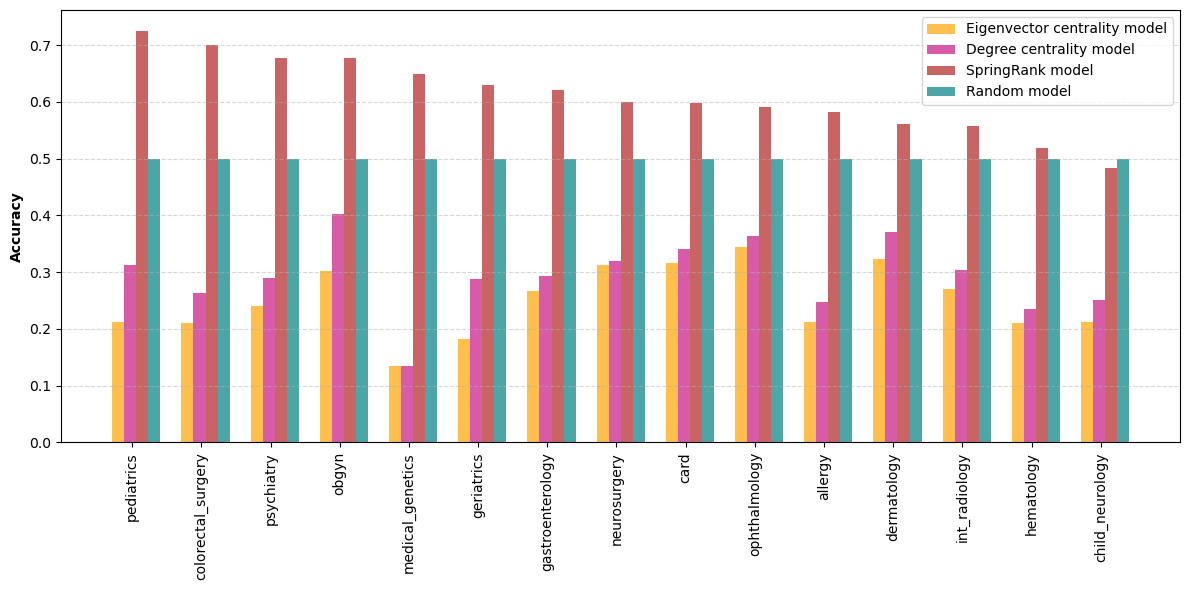

In [117]:
# Create a DataFrame from specialty_accuracy_sr
df = pd.DataFrame(list(specialty_accuracy_sr.items()), columns=['Specialty', 'SpringRank'])
df['eig_cent'] = specialty_accuracy_ec.values()
df['degree_cent'] = specialty_accuracy_dc.values()

# Add a column named 'random' with all entries as 0.5
df['Random'] = 0.5

# Sort the DataFrame by 'SpringRank' column in descending order
df_sorted = df.sort_values(by='SpringRank', ascending=False)

# Set the figure size
plt.figure(figsize=(12, 6))

# Set the bar width
bar_width = 0.2

# Set the positions of the bars on the x-axis with more space between groups
r1 = np.arange(len(df_sorted['Specialty'])) * 1.15
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

cols = ["teal", "orange", 'mediumvioletred', 'firebrick']

# Create the bars

plt.bar(r1, df_sorted['eig_cent'], width=bar_width, color=cols[1], alpha=0.7, label='Eigenvector centrality model')
plt.bar(r2, df_sorted['degree_cent'], width=bar_width, color=cols[2], alpha=0.7, label='Degree centrality model')
plt.bar(r3, df_sorted['SpringRank'], width=bar_width, color=cols[3], alpha=0.7, label='SpringRank model')
plt.bar(r4, df_sorted['Random'], width=bar_width, color=cols[0], alpha=0.7, label='Random model')

# Add labels
plt.ylabel('Accuracy', fontweight='bold')
plt.xticks([r + bar_width * 1.15 for r in r1], df_sorted['Specialty'], rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig('../figs/spring_rank_accuracy.png', dpi=600)
plt.savefig('../figs/spring_rank_accuracy.pdf', dpi=600)
plt.show()


In [ ]:
specialties = np.unique(tdf_all['specialty'])
accuracy = []
for s in specialties:
    tdf = tdf_all[tdf_all['specialty'] == s].copy()
    tdf = tdf[(tdf['timestamp'] >= 1980) & (tdf['timestamp'] <= 2009)]
    g_agg = temporal_network_from_data(
        tdf,
        aggregation='all',
        directed=True
    )
    nodes=list(g_agg.nodes())
    A = nx.to_scipy_sparse_array(g_agg, dtype=float,nodelist=nodes)
    A = scipy.sparse.csr_matrix(A)	
    model = SpringRank_sparse(alpha=2)
    model.fit(A)
    model.predict([100,0])
    rank = model.ranks
    rank = shift_rank(rank)

    # node_ranks = {nodes[i]: rank for i, rank in enumerate(model.ranks)}
    # node_ranks= sorted(node_ranks, key=lambda tup: tup[1],reverse=True)
    # node_ranks
    X=[(nodes[i],rank[i]) for i in range(g_agg.number_of_nodes())]
    # print('SpringRank scores:')
    # X
    X_dict = dict(X)
    X_dict = dict(sorted(X_dict.items(), key=lambda item: item[1], reverse=True))

    tdf = tdf_all[tdf_all['specialty'] == s].copy()
    tdf = tdf[(tdf['timestamp'] >= 2010) & (tdf['timestamp'] <= 2010)]
    g_agg_t = temporal_network_from_data(
        tdf,
        aggregation='all',
        directed=True
    )
    edges_to_predict = list(g_agg_t.edges())

    pij = []
    for e in edges_to_predict:
        node_i = e[0]
        node_j = e[1]
        d = ki*kj
        if node_i in X_dict and node_j in X_dict:
            
            ki = g_agg.degree[node_i]
            kj = g_agg.degree[node_j]
            #d = ki*kj
            diff = ki*X_dict[node_i] - kj*X_dict[node_j]
            pij.append(1 / (1 + np.exp(-2 * beta * diff)))
    accuracy.append(sum(np.array(pij) > 0.5)/len(pij))

specialty_accuracy_sr_d = dict(zip(specialties, accuracy))
specialty_accuracy_sr_d

{'allergy': 0.584070796460177,
 'card': 0.6110283159463488,
 'child_neurology': 0.4934210526315789,
 'colorectal_surgery': 0.7142857142857143,
 'dermatology': 0.5804597701149425,
 'gastroenterology': 0.626027397260274,
 'geriatrics': 0.6289752650176679,
 'hematology': 0.5061728395061729,
 'int_radiology': 0.5517241379310345,
 'medical_genetics': 0.6486486486486487,
 'neurosurgery': 0.6136363636363636,
 'obgyn': 0.6802074330164217,
 'ophthalmology': 0.6090133982947625,
 'pediatrics': 0.7278860569715142,
 'psychiatry': 0.6812865497076024}

In [321]:
node_i = 'A. T. Still University'
ki = sum(data['weight'] for _, _, data in g_agg.in_edges(node_i, data=True)) + sum(data['weight'] for _, _, data in g_agg.out_edges(node_i, data=True))
node_j = 'The University of Arizona'
kj = sum(data['weight'] for _, _, data in g_agg.in_edges(node_j, data=True)) + sum(data['weight'] for _, _, data in g_agg.out_edges(node_j, data=True))
d = ki * kj
if node_i in X_dict and node_j in X_dict:
    diff = X_dict[node_i] - X_dict[node_j]
    print(1 / (1 + 1 * np.exp(-2 * beta * diff/np.log(d))))

0.4918273186472059


Only cardiology, 1980-2015, MD-Residency

In [374]:
tdf_all_card = tdf_all[
    (tdf_all['timestamp'] >= 1980) & 
    (tdf_all['timestamp'] <= 2015) & 
    #(tdf_all['specialty'] == 'card') & 
    ((tdf_all['transition'] == 'md-residency') | (tdf_all['transition'] == 'residency-fellowship'))
]
tdf_all_card

node_u  \
7                   Indiana University School of Medicine   
12      Perelman School of Medicine at the University ...   
14                               New York Medical College   
15      SSM Health Saint Louis University School of Me...   
16            state university of new york at stony brook   
...                                                   ...   
560426  Superior Institute of Medical Sciences of Sant...   
560430    McGaw Medical Center of Northwestern University   
560431                                    Rush University   
560433                         Westchester Medical Center   
560434                            Stanley Medical College   

                                                   node_v  timestamp  \
7           University of Oklahoma Health Sciences Center     2011.0   
12      Vanderbilt Center for Biomedical Ethics and So...     2009.0   
14                                     Hofstra University     2013.0   
15                          Barrow Neurological Institute     1992.0   
16      SSM Health Saint Louis University School of Me...     1986.0   
...                                                   ...        ...   
560426                           Metrowest Medical Center     1986.0   
560430    McGaw Medical Center of Northwestern University     2000.0   
560431    McGaw Medical Center of Northwestern University     1997.0   
560433                         Westchester Medical Center     2015.0   
560434                         Westchester Medical Center     2011.0   

        doctor_id            transition     specialty    weight  time_elapsed  \
7           729.0          md-residency  neurosurgery  0.000061          82.0   
12         3371.0          md-residency  neurosurgery  0.000061          80.0   
14          683.0          md-residency  neurosurgery  0.000061          84.0   
15         2999.0  residency-fellowship  neurosurgery  0.000061          63.0   
16         2999.0          md-residency  neurosurgery  0.000061          57.0   
...           ...                   ...           ...       ...           ...   
560426     2261.0          md-residency    hematology  0.000203          57.0   
560430      182.0  residency-fellowship    hematology  0.000203          71.0   
560431      182.0          md-residency    hematology  0.000203          68.0   
560433      478.0  residency-fellowship    hematology  0.000203          86.0   
560434      478.0          md-residency    hematology  0.000203          82.0   

       time_bin  
7           all  
12          all  
14          all  
15          all  
16          all  
...         ...  
560426      all  
560430      all  
560431      all  
560433      all  
560434      all  

[231414 rows x 9 columns]

In [ ]:
weights = tdf_all_card['weight']

In [450]:
tdf_all_card['weight'] = 1


/var/folders/rg/knmgp2gj4qdc26_lxdljzmd00000gn/T/ipykernel_71270/1010666668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf_all_card['weight'] = 1


In [451]:
g_agg_card = temporal_network_from_data(
    data = tdf_all_card,
    aggregation="all",
    #interval_size=1,
    directed=True
)
g_agg_card

/var/folders/rg/knmgp2gj4qdc26_lxdljzmd00000gn/T/ipykernel_71270/686611906.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["time_bin"] = "all"  # Single graph for all data


In [391]:
def build_graph_from_df(df):
    """
    Takes a pandas DataFrame with columns 'node_u', 'node_v', and 'weight'
    and builds a graph with no multiple edges but weights representing how many of them there are.
    Necessary in case of using algorithms that do not accept MultiGraphs. E.g. eigenvector centrality.
    """
    G = nx.DiGraph()
    for _, row in df.iterrows():
        node_u = row['node_v']
        node_v = row['node_u']
        weight = row['weight']
        if G.has_edge(node_u, node_v):
            G[node_u][node_v]['weight'] += weight
        else:
            G.add_edge(node_u, node_v, weight=weight)
    return G
g_agg_card = build_graph_from_df(tdf_all_card)

In [397]:
list(g_agg_card.edges(data=True))[0:5]

[('University of Oklahoma Health Sciences Center',
  'Indiana University School of Medicine',
  {'weight': 0.00021954601341278644}),
 ('University of Oklahoma Health Sciences Center',
  'university of gottingen',
  {'weight': 6.093845216331505e-05}),
 ('University of Oklahoma Health Sciences Center',
  'University of Nebraska',
  {'weight': 0.0002347875921522585}),
 ('University of Oklahoma Health Sciences Center',
  'Albany Medical Center',
  {'weight': 8.402141232212581e-05}),
 ('University of Oklahoma Health Sciences Center',
  'Texas Tech University',
  {'weight': 0.00037300492602058017})]

In [452]:
qs_rankings = pd.read_csv('../data/qs_rankings.csv', skiprows=11)
qs_rankings = qs_rankings.iloc[:-4]
qs_rankings.columns = qs_rankings.iloc[0]
qs_rankings = qs_rankings.iloc[1:]
qs_rankings

qs_inst = qs_rankings['Institution'].to_list()

all_inst = pd.DataFrame({
    'institution': list(master_map.keys())
})
all_inst['matched_institution'] = all_inst['institution'].apply(lambda x: match_dict.get(x, None))
all_inst

qs_rankings['Rank'] = range(1, len(qs_rankings) + 1)
qs_rankings_combined = qs_rankings.merge(all_inst, left_on='Institution', right_on='institution', how='left')
qs_rankings_combined
qs_rankings_combined = qs_rankings_combined.dropna(subset=['matched_institution'])
qs_rankings_combined = qs_rankings_combined[qs_rankings_combined['Location'] == 'United States']
qs_rankings_combined

qs_rankings_combined['degree'] = qs_rankings_combined['institution'].apply(lambda x: g_agg_card.degree[x] if x in g_agg_card else None)
qs_rankings_combined['degree_rank'] = qs_rankings_combined['degree'].rank(ascending=False, method='min')
qs_rankings_combined['eigenvector_centrality'] = qs_rankings_combined['institution'].apply(lambda x: nx.eigenvector_centrality_numpy(g_agg_card, weight='weight').get(x, None))
qs_rankings_combined['eigenvector_centrality_rank'] = qs_rankings_combined['eigenvector_centrality'].rank(ascending=False, method='min')

In [453]:
list(g_agg_card.edges(data=True))

[('"aieti" highest medical school', 'Drexel University', {'weight': 1}),
 ('"aieti" highest medical school',
  'SUNY Downstate Health Sciences University',
  {'weight': 1}),
 ('"aieti" highest medical school', 'Tower Health', {'weight': 1}),
 ('Drexel University', 'Abington Memorial Hospital', {'weight': 28}),
 ('Drexel University', 'Adventist Health White Memorial', {'weight': 3}),
 ('Drexel University', 'Advocate Health Care', {'weight': 1}),
 ('Drexel University', 'Albany Medical Center', {'weight': 7}),
 ('Drexel University', 'Albert Einstein College of Medicine', {'weight': 20}),
 ('Drexel University', 'Allegheny Health Network', {'weight': 37}),
 ('Drexel University', 'Atlantic Health System', {'weight': 5}),
 ('Drexel University', 'Aurora Health Care', {'weight': 3}),
 ('Drexel University', 'Barrow Neurological Institute', {'weight': 1}),
 ('Drexel University', 'Baylor College of Medicine', {'weight': 6}),
 ('Drexel University', 'Baylor University', {'weight': 1}),
 ('Drexel Uni

Text(0, 0.5, 'EC Centrality')

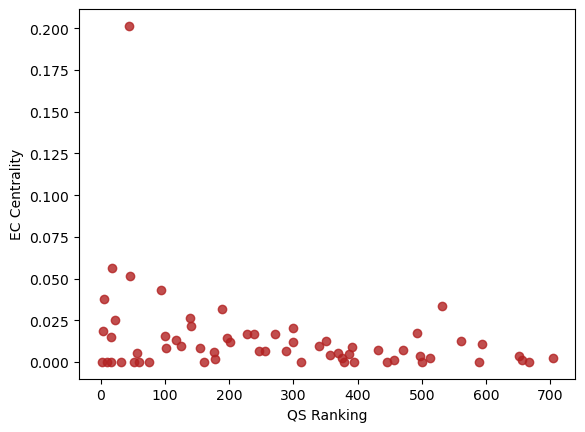

In [454]:
plt.scatter(qs_rankings_combined['Rank'], qs_rankings_combined['eigenvector_centrality'], color = 'firebrick', alpha = 0.8)
plt.xlabel('QS Ranking')
plt.ylabel('EC Centrality')

In [398]:
correlation = qs_rankings_combined[['Rank', 'eigenvector_centrality']].corr().iloc[0, 1]
print(f"Correlation between QS Ranking and Eigenvector Centrality: {correlation}")

Correlation between QS Ranking and Eigenvector Centrality: -0.18674856938906542


In [381]:
institutions = qs_rankings_combined['institution'].tolist()
degrees = qs_rankings_combined['eigenvector_centrality'].tolist()
ec_dict = dict(zip(institutions, degrees))
ec_dict = dict(sorted(ec_dict.items(), key=lambda item: item[1], reverse=False))
ec_dict = dict(sorted(ec_dict.items(), key=lambda item: qs_rankings_combined[qs_rankings_combined['institution'] == item[0]]['Rank'].values[0]))
ec_dict

{'Harvard University': 0.01535260435821317,
 'Stanford University': 0.09888644919245204,
 'Johns Hopkins University': 0.11512290697083792,
 'Yale University': 0.0022445068831798455,
 'Columbia University': 0.009403642028171599,
 'University of Pennsylvania': 0.09024025864525803,
 'Duke University': 0.10956462140863102,
 'University of Washington': 0.10148680949436226,
 'Cornell University': 0.004478089474751054,
 'Baylor College of Medicine': 0.11070160124450935,
 'Washington University in St. Louis': 0.1073609697206767,
 'Northwestern University': 0.005788108547857218,
 'Boston University': 0.09045235784559227,
 'University of Pittsburgh': 0.008204634643459751,
 'Vanderbilt University': 1.2604137618887704e-18,
 'Icahn School of Medicine at Mount Sinai': 0.10192234224184604,
 'Case Western Reserve University': 0.09565058693061498,
 'The Ohio State University': 0.08564290244979195,
 'University of Southern California': 0.09863793650565586,
 'University of California, Davis': 0.095286951

In [399]:
nodes=list(g_agg_card.nodes())
A = nx.to_scipy_sparse_array(g_agg_card, dtype=float,nodelist=nodes)
A = scipy.sparse.csr_matrix(A)	
alpha=0
l0=1
l1=1
rank=SpringRank(A,alpha=alpha,l0=l0,l1=l1)
rank=shift_rank(rank)

X=[(nodes[i],rank[i]) for i in range(g_agg_card.number_of_nodes())]
X= sorted(X, key=lambda tup: tup[1],reverse=True)
print('SpringRank scores:')
X
X_dict = dict(X)
X_dict

SpringRank scores:


{'Section of Restorative Neurology Lund University Olle Lindvall MD PhD Lund Sweden': 4.217958946255499,
 'Greater Los Angeles HCS': 3.886097920523805,
 'Adams House': 3.870295071146497,
 'Ophthalmic Consultants of Boston': 3.841680645838479,
 'phoebe putney memorial hospital southwest georgia': 3.7523015634155428,
 'National Eye Institute': 3.7489296044866993,
 'Johns Hopkins Wilmer Eye Institute': 3.7390282091752485,
 'cs mott childrens hospital': 3.7118242607025254,
 'Massachusetts Institute of Technology': 3.68471245694872,
 'Framingham Heart Study': 3.6663488430261983,
 'The Austen Riggs Center': 3.660246706964866,
 'dr grande boston ma': 3.618561121921726,
 'University of California at Berkeley': 3.603732291612147,
 'SRS Fellowship': 3.602151791281395,
 'Tristar Centennial Medical Center': 3.602151791281395,
 'Alexian Brothers Hospital': 3.59608609127387,
 'Fellowship with Drs Ronald G Michels Bert M Glaser and Robert P Murphy': 3.59608609127387,
 'Gordon Schanzlin New Vision Ins

Text(0, 0.5, 'SpringRank')

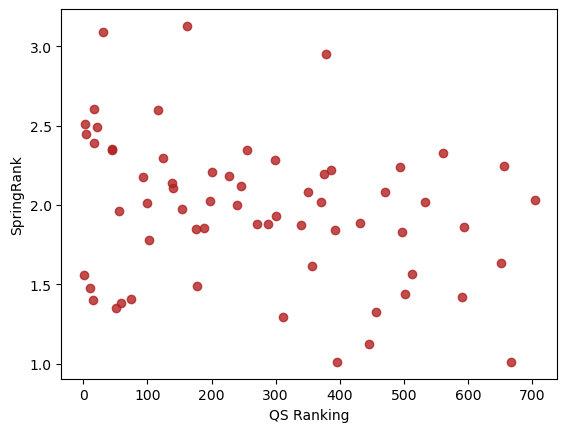

In [400]:
qs_rankings_combined['spring_rank'] = qs_rankings_combined['institution'].map(X_dict)
qs_rankings_combined
plt.scatter(qs_rankings_combined['Rank'], qs_rankings_combined['spring_rank'], color = 'firebrick', alpha = 0.8)
plt.xlabel('QS Ranking')
plt.ylabel('SpringRank')

### spatial

In [1]:
import os
import json
import pandas as pd

base_path = '../../physician_trajectories/data'
folders = [folder for folder in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, folder))]
folders.remove('edgelists')
folders.remove('medical_genetics')

errors = 0
all_data_list = []  # Use a list to collect all the data

for folder in folders:
    folder_path = os.path.join(base_path, folder)
    print(f"Processing folder: {folder}")
    
    # Iterate through files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.json') and 'failed' not in file_name and 'next' not in file_name:
            try:
                file_path = os.path.join(folder_path, file_name)
                with open(file_path, 'r') as f:
                    data = json.load(f)
                
                # Extract data from each JSON file
                for doctor_id, details in data.items():
                    # Extract specialty
                    specialty = details.get('specialty', '')

                    # Extract state and zip code from the office address
                    office = details.get('office', '')
                    state = ''
                    zip_code = ''
                    if office:
                        parts = office.split(',')
                        if len(parts) > 1:
                            state_zip = parts[-1].strip()
                            state_zip_parts = state_zip.split()
                            if len(state_zip_parts) > 1:
                                state = state_zip_parts[0]
                                zip_code = state_zip_parts[-1]

                    # Collect institutions (hospitals and training institutions)
                    institutions = []
                    training = details.get('training', {})
                    for _, institution_data in training.items():
                        institutions.extend(institution_data.keys())

                    # Append extracted data to the list
                    all_data_list.append({
                        'doctor_id': doctor_id,
                        'specialty': specialty,
                        'state': state,
                        'zip_code': zip_code,
                        'institutions': institutions  
                    })
            except Exception as e:
                print(f"[Error] Error processing file {file_name} in folder {folder}: {e}")
                errors += 1
                continue

# Create a single DataFrame from the list
all_data = pd.DataFrame(all_data_list)

# # Save the consolidated DataFrame to a CSV file
# all_data.to_csv('consolidated_doctor_data.csv', index=False)

# # Example: Display the consolidated DataFrame
# print(all_data)


Processing folder: neurosurgery
[Error] Error processing file 4267.json in folder neurosurgery: 'str' object has no attribute 'get'
[Error] Error processing file 791.json in folder neurosurgery: 'str' object has no attribute 'get'
[Error] Error processing file 3609.json in folder neurosurgery: 'str' object has no attribute 'get'
[Error] Error processing file 2761.json in folder neurosurgery: 'str' object has no attribute 'get'
[Error] Error processing file 8442.json in folder neurosurgery: 'str' object has no attribute 'get'
[Error] Error processing file 343.json in folder neurosurgery: 'str' object has no attribute 'get'
[Error] Error processing file 355.json in folder neurosurgery: 'str' object has no attribute 'get'
[Error] Error processing file 617.json in folder neurosurgery: 'str' object has no attribute 'get'
[Error] Error processing file 4070.json in folder neurosurgery: 'str' object has no attribute 'get'
[Error] Error processing file 2632.json in folder neurosurgery: 'str' ob

In [2]:
all_data

doctor_id     specialty state zip_code  \
0           3721  Neurosurgery    CA    93301   
1           2833  Neurosurgery    WA    98101   
2            729  Neurosurgery    OK    73104   
3           6523  Neurosurgery    FL    32611   
4           6489  Neurosurgery    CA    93291   
...          ...           ...   ...      ...   
350295      2631    Hematology    CA    91316   
350296      2261    Hematology    KS    66205   
350297       881    Hematology    OR    97239   
350298       182    Hematology    IL    60611   
350299       478    Hematology    KY    40536   

                                             institutions  
0       [National Capital Consortium, National Capital...  
1       [University of Washington, University of Texas...  
2       [University of California (San Francisco) Scho...  
3             [University of Florida College of Medicine]  
4       [University of Miami/Jackson Health System, UC...  
...                                                   ...  
350295                                            [Other]  
350296  [Vidant Medical Center/East Carolina Universit...  
350297  [Brigham and Women's Hospital/Massachusetts Ge...  
350298  [McGaw Medical Center of Northwestern Universi...  
350299  [Stanford University, Westchester Medical Cent...  

[350300 rows x 5 columns]

In [3]:
import json 
with open('../data/master_map_2.json', 'r') as f:
    master_map = json.load(f)

In [5]:
from collections import Counter
zips = dict(Counter(all_data['zip_code']))


In [ ]:
states(dict(Counter(all_data['state'])))

Counter({'CA': 43629,
         'NY': 32933,
         'TX': 24125,
         'FL': 20918,
         'PA': 16518,
         'IL': 13569,
         'MA': 13035,
         'OH': 12244,
         'NC': 10799,
         'NJ': 10732,
         'MI': 10112,
         'GA': 8920,
         'VA': 8888,
         'MD': 8742,
         'WA': 7335,
         'MO': 6426,
         'TN': 6160,
         'MN': 6132,
         'AZ': 6074,
         'CO': 6056,
         'CT': 5748,
         'WI': 5540,
         'IN': 5447,
         'SC': 4641,
         'OR': 4453,
         'LA': 4449,
         'KY': 3679,
         'AL': 3668,
         'OK': 2783,
         'PR': 2717,
         'UT': 2637,
         'DC': 2516,
         'AR': 2284,
         'IA': 2271,
         'KS': 2184,
         'NV': 1971,
         'MS': 1851,
         'HI': 1827,
         'NM': 1771,
         'RI': 1667,
         'NE': 1573,
         'WV': 1572,
         'NH': 1558,
         'ME': 1495,
         'DE': 1083,
         'ID': 1051,
         'MT': 867,
   

In [7]:
inst_alldata = all_data['institutions']

In [10]:
inst_alldata

0         [National Capital Consortium, National Capital...
1         [University of Washington, University of Texas...
2         [University of California (San Francisco) Scho...
3               [University of Florida College of Medicine]
4         [University of Miami/Jackson Health System, UC...
                                ...                        
350295                                              [Other]
350296    [Vidant Medical Center/East Carolina Universit...
350297    [Brigham and Women's Hospital/Massachusetts Ge...
350298    [McGaw Medical Center of Northwestern Universi...
350299    [Stanford University, Westchester Medical Cent...
Name: institutions, Length: 350300, dtype: object

In [ ]:
# Create a reversed map for faster lookups
reversed_map = {v: k for k, values in master_map.items() for v in values}

# Replace elements in inst_alldata
remapped_alldata = [
    [reversed_map.get(item, item) for item in tqdm(sublist)]
    for sublist in inst_alldata
]

print(remapped_alldata)

In [ ]:
all_data['mapped_inst'] = remapped_alldata

In [164]:
import pandas as pd
tdf_all = pd.read_csv('../data/edgelists/tdf_all_specialties_cleaned.csv')
tdf_all = tdf_all.dropna()
tdf_all['time_elapsed'] = tdf_all['timestamp'] - tdf_all['timestamp'].min()
tdf_all = tdf_all[tdf_all['specialty'] != 'endocrinology']
tdf_all
# s = 'card'
# tdf = tdf_all[tdf_all['specialty'] == s].copy()
# tdf_all = tdf_all[(tdf_all['timestamp'] >= 1980) & (tdf['timestamp'] <= 2010)]
tdf_all

node_u  \
0                           National Capital Consortium   
1                           National Capital Consortium   
2                                 Albany Medical Center   
3                                   University of Texas   
4                                   University of Texas   
...                                                 ...   
560430  McGaw Medical Center of Northwestern University   
560431                                  Rush University   
560432                       Westchester Medical Center   
560433                       Westchester Medical Center   
560434                          Stanley Medical College   

                                                 node_v  timestamp  doctor_id  \
0                           National Capital Consortium     1972.0     3721.0   
1                           National Capital Consortium     1968.0     3721.0   
2                           National Capital Consortium     1967.0     3721.0   
3                              University of Washington     2003.0     2833.0   
4                                   University of Texas     1999.0     2833.0   
...                                                 ...        ...        ...   
560430  McGaw Medical Center of Northwestern University     2000.0      182.0   
560431  McGaw Medical Center of Northwestern University     1997.0      182.0   
560432                              Stanford University     2018.0      478.0   
560433                       Westchester Medical Center     2015.0      478.0   
560434                       Westchester Medical Center     2011.0      478.0   

                   transition     specialty    weight  time_elapsed  
0         residency-residency  neurosurgery  0.000061          43.0  
1        internship-residency  neurosurgery  0.000061          39.0  
2               md-internship  neurosurgery  0.000061          38.0  
3         residency-residency  neurosurgery  0.000061          74.0  
4        internship-residency  neurosurgery  0.000061          70.0  
...                       ...           ...       ...           ...  
560430   residency-fellowship    hematology  0.000203          71.0  
560431           md-residency    hematology  0.000203          68.0  
560432  fellowship-fellowship    hematology  0.000203          89.0  
560433   residency-fellowship    hematology  0.000203          86.0  
560434           md-residency    hematology  0.000203          82.0  

[560368 rows x 8 columns]

in and out degree distributions

In [401]:
import nethelp as nh

In [33]:
import powerlaw

In [35]:
g_agg = temporal_network_from_data(
    tdf,
    aggregation='all',
    directed=True
)

/var/folders/rg/knmgp2gj4qdc26_lxdljzmd00000gn/T/ipykernel_18922/686611906.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["time_bin"] = "all"  # Single graph for all data


In [37]:
g_agg.number_of_nodes()

1741

In [44]:
results.power_law.xmin

89.0

6.865088703535648%
8.504340583957593%


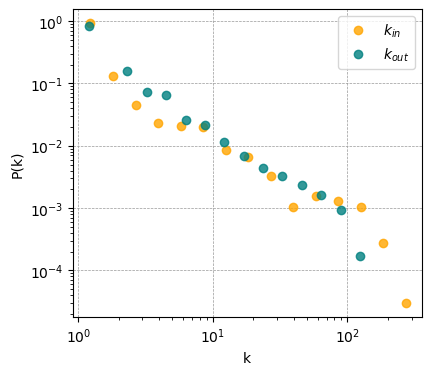

In [45]:
import nethelp as nh
x,y = nh.distributions.degree_distribution(g_agg, directed='in')
fig, ax = plt.subplots(1,1, figsize=(4.5,4))

degree_sequence = np.array(list(dict(g_agg.in_degree()).values()))
results = powerlaw.Fit(degree_sequence,verbose=False);
print(results.power_law.alpha)
ax.loglog(x, y, color='orange', alpha=0.8, marker='o', linestyle='None', label=rf'$k_{{in}}$')

x,y = nh.distributions.degree_distribution(g_agg, directed='out')
degree_sequence = np.array(list(dict(g_agg.out_degree()).values()))
results = powerlaw.Fit(degree_sequence,verbose=False);
print(results.power_law.alpha)

ax.loglog(x, y, color='teal', alpha=0.8, marker='o', linestyle='None', label=rf'$k_{{out}}$')
ax.set_xlabel('k')
ax.set_ylabel('P(k)')
ax.grid(color='#999999', linestyle='--', linewidth=0.5)
ax.legend()

# plt.savefig('../figs/degree_distribution.png', dpi=600)

In [425]:
specialties = tdf_all_card['specialty'].unique()
specialties

array(['neurosurgery', 'medical_genetics', 'card', 'allergy',
       'geriatrics', 'int_radiology', 'obgyn', 'child_neurology',
       'gastroenterology', 'ophthalmology', 'colorectal_surgery',
       'pediatrics', 'dermatology', 'psychiatry', 'hematology'],
      dtype=object)

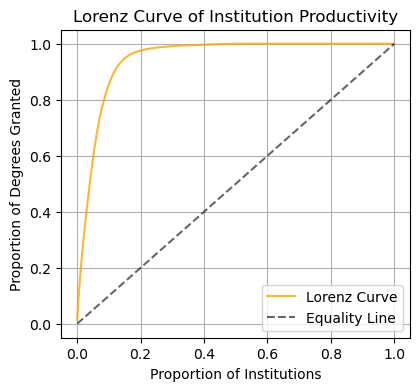

In [427]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from itertools import accumulate

def lorenz_curve(g_agg_card):
    # Assume g_agg_card is your directed graph
    # Calculate the out-degrees for all nodes (outgoing edges represent trained doctors)
    out_degrees = dict(g_agg_card.out_degree(weight=None))

    # Get total number of trained doctors (total outgoing edges)
    total_doctors = sum(out_degrees.values())

    # Calculate the fraction of doctors trained by each institution
    fractions = {node: out_deg / total_doctors for node, out_deg in out_degrees.items()}

    # Sort nodes by fraction of doctors trained
    sorted_fractions = sorted(fractions.values(), reverse=True)

    # Calculate the cumulative sum for the Lorenz curve
    cumulative_fractions = list(accumulate(sorted_fractions))

    # Normalize cumulative fractions to range [0, 1]
    cumulative_fractions = [cf / cumulative_fractions[-1] for cf in cumulative_fractions]

    # Create the x-axis: proportion of institutions
    n = len(sorted_fractions)
    x_axis = np.linspace(0, 1, n)
    return x_axis, cumulative_fractions

x_axis, cumulative_fractions = lorenz_curve(g_agg_card)
# Plot the Lorenz curve
plt.figure(figsize=(4.5, 4))
plt.plot(x_axis, cumulative_fractions, label="Lorenz Curve", color="orange", alpha = 0.8)
plt.plot(x_axis, x_axis, label="Equality Line", linestyle="--", color="black", alpha = 0.6)
plt.title("Lorenz Curve of Institution Productivity")
plt.xlabel("Proportion of Institutions")
plt.ylabel("Proportion of Degrees Granted")
plt.legend()
plt.grid(True)
plt.show()


In [431]:
i

15

In [434]:
specialties

array(['neurosurgery', 'medical_genetics', 'card', 'allergy',
       'geriatrics', 'int_radiology', 'obgyn', 'child_neurology',
       'gastroenterology', 'ophthalmology', 'colorectal_surgery',
       'pediatrics', 'dermatology', 'psychiatry', 'hematology'],
      dtype=object)

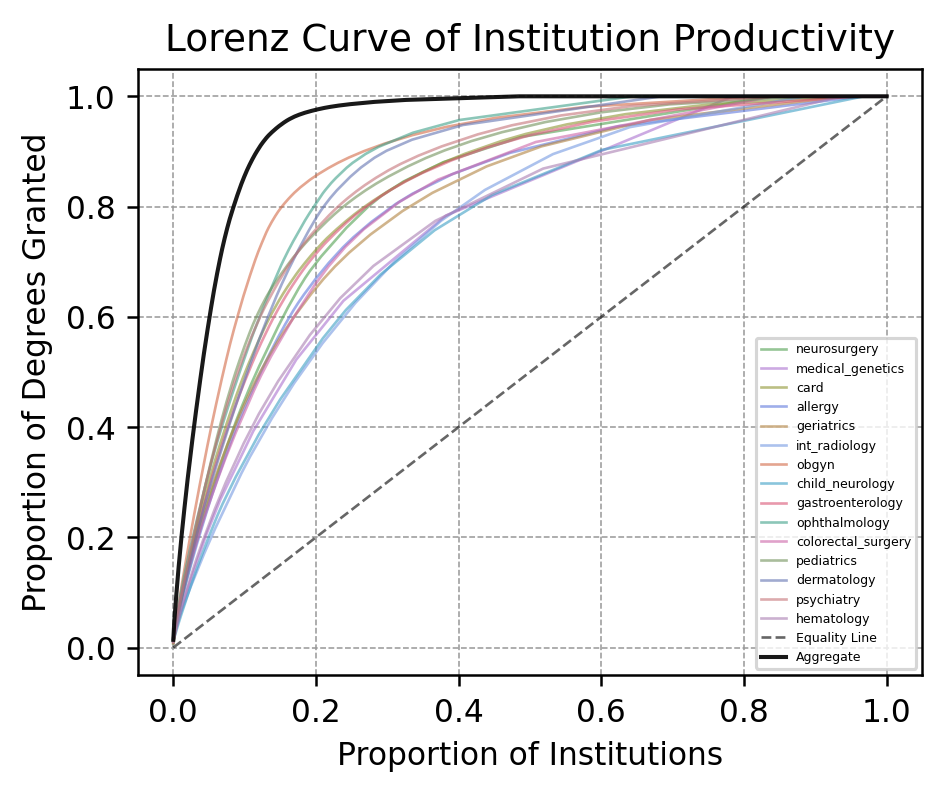

In [445]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3.5), dpi=225)
cols = ["#51a050", "#ab72d0", "#8f9532", "#6079dc", "#b28340", "#769ae1", "#d26a46", "#3d9fc5", "#da5676", "#3fa18a", "#cc64a8", "#72925b", "#6374b2", "#c57378", "#a97db2"]
specialties = tdf_all_card['specialty'].unique()
i=0
for s in specialties:
    g_agg = temporal_network_from_data(
        data = tdf_all_card[tdf_all_card['specialty'] == s].copy(),
        aggregation="all",
        #interval_size=1,
        directed=True
    )

    x_axis, cumulative_fractions = lorenz_curve(g_agg)
    ax.plot(x_axis, cumulative_fractions, label=s, color=cols[i], alpha = 0.6, linewidth=0.85)
    i+=1
ax.plot(x_axis, x_axis, label="Equality Line", linestyle="--", color="black", alpha = 0.6, linewidth=0.85)
ax.set_title("Lorenz Curve of Institution Productivity")
ax.set_xlabel("Proportion of Institutions")
ax.set_ylabel("Proportion of Degrees Granted")

ax.grid(color='#999999', linestyle='--', linewidth=0.5)
x_axis, cumulative_fractions = lorenz_curve(g_agg_card)
ax.plot(x_axis, cumulative_fractions, label='Aggregate', color='black', alpha = 0.9, linewidth=1.3)
ax.legend(fontsize = 4)
plt.savefig('../figs/lorenz_curve.pdf', dpi=600)
plt.savefig('../figs/lorenz_curve.png', dpi=600)
plt.show()
